In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Read in data

In [3]:
data = pd.read_csv('model_data/full_model_data_2122.csv', index_col=0)

In [4]:
data.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  138116            4.065041           15.4                47.3   
2  137899            1.739130            7.7                23.3   
3  146639           11.864407            9.7                31.2   
4  137603            2.586207            8.1                26.7   
5  140865            3.717472           10.9                35.7   

                               urban_rural            denomination   FSM  \
1    (England/Wales) Rural town and fringe  No religious character  29.0   
2  (England/Wales) Urban minor conurbation  No religious character  13.2   
3  (England/Wales) Urban minor conurbation  No religious character  44.1   
4  (England/Wales) Urban minor conurbation  No religious character  15.6   
5  (England/Wales) Urban minor conurbation          Roman Catholic  20.7   

   White_British   EAL  perc_boys               region_name  \
1           94.0   2.3  47.969543  Yorkshire and The Humber   
2           89.7   3.8  49.004975  Yorkshire and The Humber   
3           91.0   4.8  50.931677  Yorkshire and The Humber   
4           91.4   3.6  48.567335  Yorkshire and The Humber   
5           62.2  15.9  48.205823  Yorkshire and The Humber   

                        school_name  headcount  perm_excl_rate  susp_rate  \
1                Campsmount Academy      788.0         0.25381   41.62437   
2                 Hungerhill School     1206.0         0.33167   14.51078   
3                The Laurel Academy      644.0         0.00000   44.56522   
4                  Ridgewood School     1396.0         0.07163   12.32092   
5  The McAuley Catholic High School     1477.0         0.27082   12.11916   

   one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  Progress_8  \
1            14.21320          143.0        102.1          37.5       -0.90   
2             7.21393          249.0        103.0          51.1        0.33   
3            14.13043          121.0        101.0          45.8        0.16   
4             6.37536          238.0        104.6          48.6       -0.27   
5             6.09343          262.0        102.9          45.5       -0.18   

   selective  KS4_pass_rate POSTCODE  post16 school_sex                 type  \
1          0            5.0  DN6 9AS       1      Mixed    Academy converter   
2          0           38.0  DN3 2JY       0      Mixed    Academy converter   
3          0            7.0  S64 9SD       0      Mixed  Academy sponsor led   
4          0           11.0  DN5 7UB       1      Mixed    Academy converter   
5          0           12.0  DN3 3QF       1      Mixed    Academy converter   

          Ofsted_rating  sen_support      ehcp     LSOA11  IMD  \
1  Requires improvement    13.705584  2.157360  E01007493  7.0   
2           Outstanding    11.691542  1.326700  E01007478  4.0   
3                  Good     9.472050  0.931677  E01007583  5.0   
4                  Good    12.607450  1.289398  E01007588  5.0   
5  Requires improvement    10.494245  1.150982  E01007603  9.0   

   pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  
1                 13.7                      0.4              14.964096  
2                 17.3                      0.2               7.599267  
3                 19.9                      0.3               9.303709  
4                 16.3                      0.2               7.938303  
5                 15.7                      0.1              10.667389

In [5]:
data['not_sustained_rate'].describe()

count    3140.000000
mean        5.020069
std         3.633375
min         0.000000
25%         2.500000
50%         4.293162
75%         6.714440
max        42.372881
Name: not_sustained_rate, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 1 to 3140
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3140 non-null   int64  
 1   not_sustained_rate       3140 non-null   float64
 2   total_absence            3112 non-null   float64
 3   persistent_absence       3112 non-null   float64
 4   urban_rural              3113 non-null   object 
 5   denomination             3113 non-null   object 
 6   FSM                      3113 non-null   float64
 7   White_British            3113 non-null   float64
 8   EAL                      3113 non-null   float64
 9   perc_boys                3113 non-null   float64
 10  region_name              3094 non-null   object 
 11  school_name              3094 non-null   object 
 12  headcount                3094 non-null   float64
 13  perm_excl_rate           3094 non-null   float64
 14  susp_rate                3094

### Drop school types that are specialist or only KS4 & 5

In [7]:
data['type'] = data['type'].astype(str)
np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [8]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data = data.loc[data['type'].isin(types)]

np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3058 entries, 1 to 3140
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URN                      3058 non-null   int64  
 1   not_sustained_rate       3058 non-null   float64
 2   total_absence            3044 non-null   float64
 3   persistent_absence       3044 non-null   float64
 4   urban_rural              3045 non-null   object 
 5   denomination             3045 non-null   object 
 6   FSM                      3045 non-null   float64
 7   White_British            3045 non-null   float64
 8   EAL                      3045 non-null   float64
 9   perc_boys                3045 non-null   float64
 10  region_name              3026 non-null   object 
 11  school_name              3026 non-null   object 
 12  headcount                3026 non-null   float64
 13  perm_excl_rate           3026 non-null   float64
 14  susp_rate                3026

In [10]:
data = data.dropna(subset=['total_absence'])

In [11]:
data = data.dropna(subset=['Ofsted_rating'])

In [12]:
data = data.dropna(subset=['susp_rate'])

In [13]:
data = data.dropna(subset=['IMD'])

In [14]:
data = data.dropna(subset=['pupil_teacher_ratio'])

In [15]:
data = data.dropna(subset=['Progress_8'])

### Edit categorical vars

#### School sex

In [16]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [17]:
data['single_sex_binary'] = data['school_sex']

In [18]:
data['single_sex_binary'].replace('Girls', 1, inplace=True)
data['single_sex_binary'].replace('Boys', 1, inplace=True)
data['single_sex_binary'].replace('Mixed', 0, inplace=True)

In [19]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2844.000000         2844.000000    2844.000000         2844.000000   
mean   133385.890647            4.948119       9.073101           27.990436   
std     12031.150864            3.396624       2.222155            8.600415   
min    100049.000000            0.000000       2.100000            1.500000   
25%    135594.500000            2.515284       7.600000           22.500000   
50%    137239.500000            4.306220       9.000000           28.100000   
75%    139792.250000            6.630539      10.300000           33.500000   
max    148702.000000           24.675325      20.300000           61.300000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2844.000000    2844.000000  2844.000000  2844.000000  2844.000000   
mean     22.802180      65.034529    17.134459    50.393302  1100.951828   
std      12.524634      29.219730    18.854479    16.588844   386.888170   
min       0.600000       0.000000     0.000000     0.000000    86.000000   
25%      13.100000      46.300000     3.700000    49.084560   835.000000   
50%      20.700000      76.800000     8.900000    50.930263  1067.000000   
75%      30.400000      88.425000    24.025000    52.989243  1347.250000   
max      74.700000      98.800000    93.300000   100.000000  2795.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2844.000000  2844.000000         2844.000000    2844.000000   
mean         0.179476    15.248957            6.477211     180.996132   
std          0.256673    18.057175            4.508471      61.640713   
min          0.000000     0.000000            0.000000      14.000000   
25%          0.000000     5.330600            3.425613     139.000000   
50%          0.091660     9.993600            5.408115     177.000000   
75%          0.258483    18.575187            8.560778     220.250000   
max          2.222220   255.033560           33.154360     450.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2844.000000   2844.000000  2844.000000  2844.000000    2844.000000   
mean    103.779993     49.623453    -0.002057     0.051688      27.080520   
std       2.930594      9.044674     0.490100     0.221435      19.421248   
min      93.100000      9.000000    -4.090000     0.000000       0.000000   
25%     102.000000     43.800000    -0.310000     0.000000      12.000000   
50%     103.500000     48.600000    -0.010000     0.000000      23.000000   
75%     105.000000     54.100000     0.330000     0.000000      37.000000   
max     117.400000     88.200000     2.270000     1.000000      99.000000   

            post16  sen_support         ehcp          IMD  \
count  2844.000000  2844.000000  2844.000000  2844.000000   
mean      0.629395    12.408393     2.294037     5.651195   
std       0.483052     5.423849     1.570291     2.821454   
min       0.000000     0.167084     0.000000     1.000000   
25%       0.000000     8.811344     1.269372     3.000000   
50%       1.000000    12.122955     2.000000     6.000000   
75%       1.000000    15.680605     2.953790     8.000000   
max       1.000000    40.191388    17.114094    10.000000   

       pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
count          2844.000000              2844.000000            2844.000000   
mean             16.770499                 0.229219               8.869487   
std               2.232390                 0.117366               2.123392   
min               5.200000                 0.000000               2.058017   
25%              15.600000                 0.200000               7.521318   
50%              16.700000                 0.200000               8.796445   
75%              17.900000                 0.300000              10.093273   
max              40.300000                 0.900000              19.744106   

       single_s

#### Ofsted rating

In [20]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [21]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [22]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

# Shape of the Data

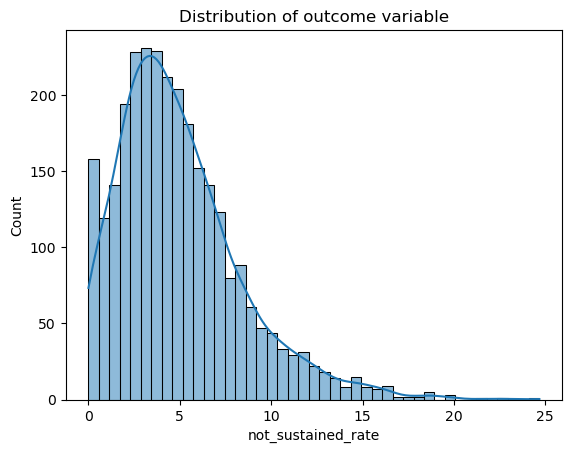

In [23]:
# distribution of outcomes
sns.histplot(data['not_sustained_rate'], kde=True )
plt.title('Distribution of outcome variable');

In [24]:
performance_indicators = data[['not_sustained_rate', 'total_absence', 'absence_rate_non_excl', 'persistent_absence', 
                               'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                               'KS2_history', 'Attainment_8', 'Progress_8', 'KS4_pass_rate',
                              'selective', 'Ofsted_rating']]

In [25]:
#sns.pairplot(performance_indicators);

In [26]:
#sns.pairplot(performance_indicators, hue='Ofsted_rating', palette='RdYlGn_r');

In [27]:
#sns.pairplot(performance_indicators, hue='selective');

### School size

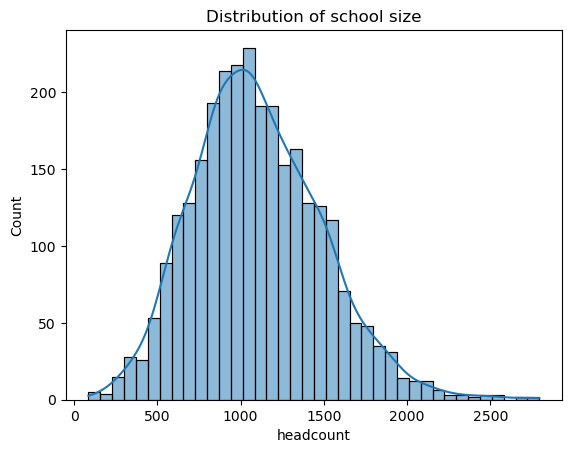

In [125]:
sns.histplot(data['headcount'], kde=True )
plt.title('Distribution of school size');

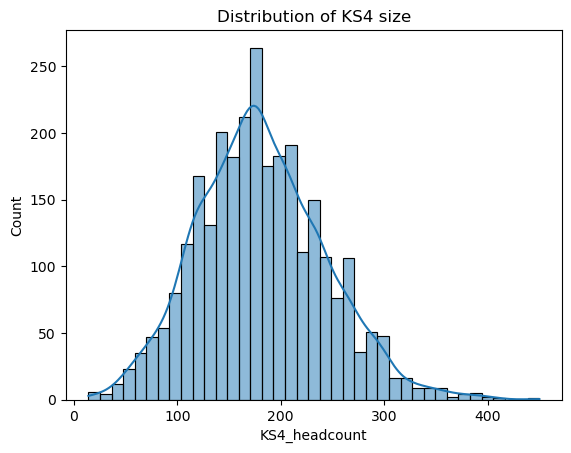

In [126]:
sns.histplot(data['KS4_headcount'], kde=True )
plt.title('Distribution of KS4 size');

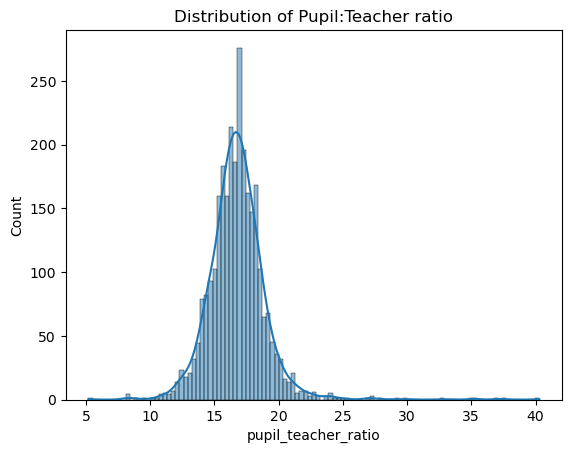

In [127]:
sns.histplot(data['pupil_teacher_ratio'], kde=True )
plt.title('Distribution of Pupil:Teacher ratio');

### Performance indicators

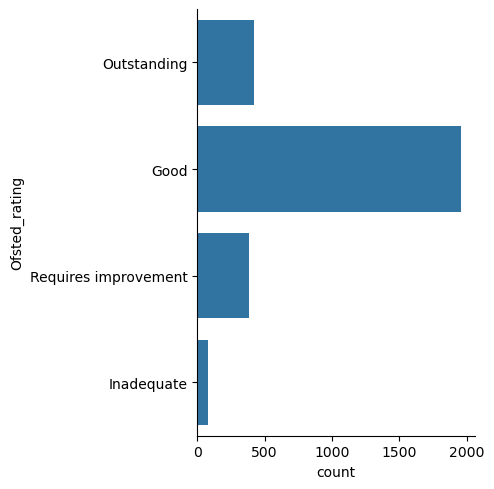

In [128]:
sns.catplot(data['Ofsted_rating'], kind='count');

In [129]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              423
Good                    1962
Requires improvement     383
Inadequate                76
dtype: int64

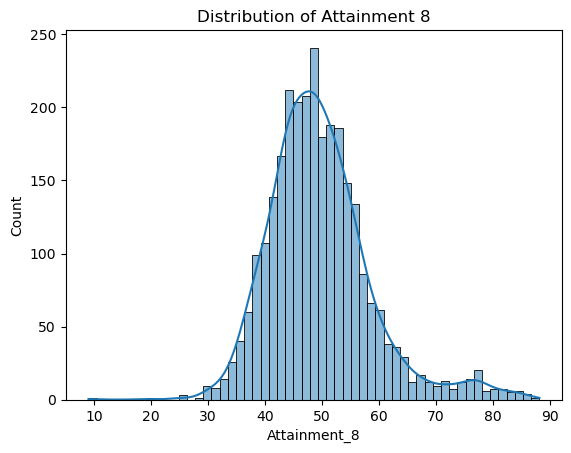

In [130]:
sns.histplot(data['Attainment_8'], kde=True )
plt.title('Distribution of Attainment 8');

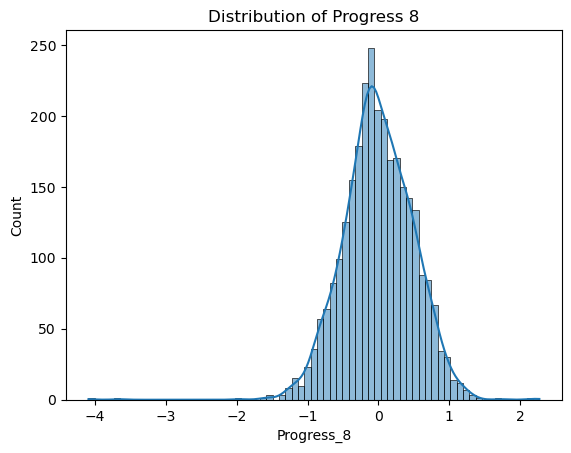

In [131]:
sns.histplot(data['Progress_8'], kde=True )
plt.title('Distribution of Progress 8');

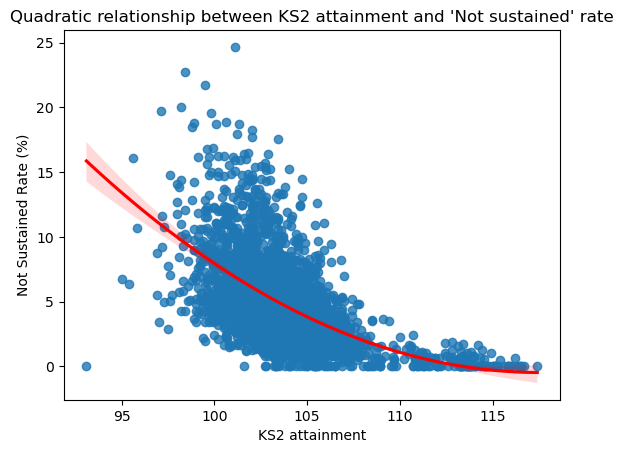

In [132]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

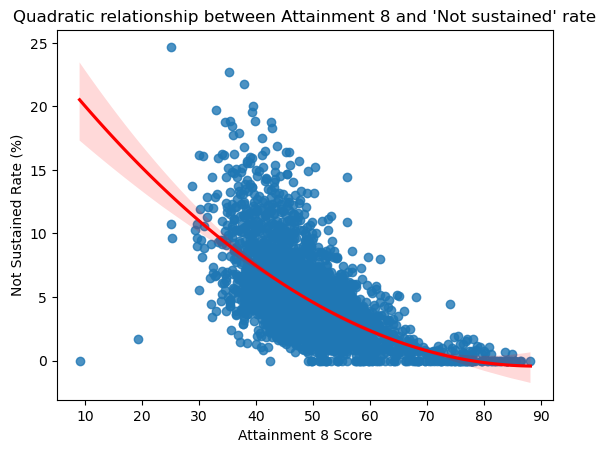

In [133]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 3139
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2844 non-null   int64   
 1   not_sustained_rate       2844 non-null   float64 
 2   total_absence            2844 non-null   float64 
 3   persistent_absence       2844 non-null   float64 
 4   urban_rural              2844 non-null   object  
 5   denomination             2844 non-null   object  
 6   FSM                      2844 non-null   float64 
 7   White_British            2844 non-null   float64 
 8   EAL                      2844 non-null   float64 
 9   perc_boys                2844 non-null   float64 
 10  region_name              2844 non-null   object  
 11  school_name              2844 non-null   object  
 12  headcount                2844 non-null   float64 
 13  perm_excl_rate           2844 non-null   float64 
 14  susp_rate    

### Other school characteristics

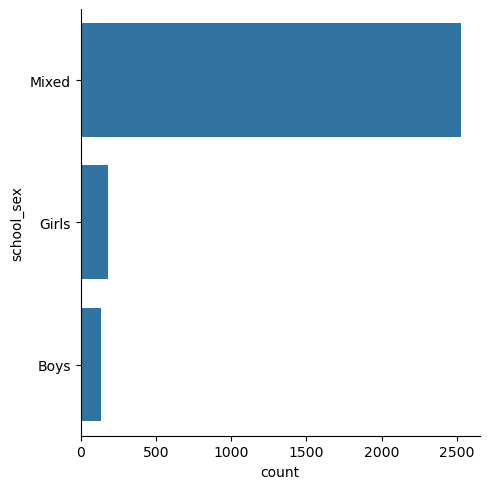

In [135]:
sns.catplot(data['school_sex'], kind='count');

In [136]:
data.groupby('single_sex_binary').size()

single_sex_binary
0    2526
1     318
dtype: int64

In [137]:
data.groupby('post16').size()

post16
0    1054
1    1790
dtype: int64

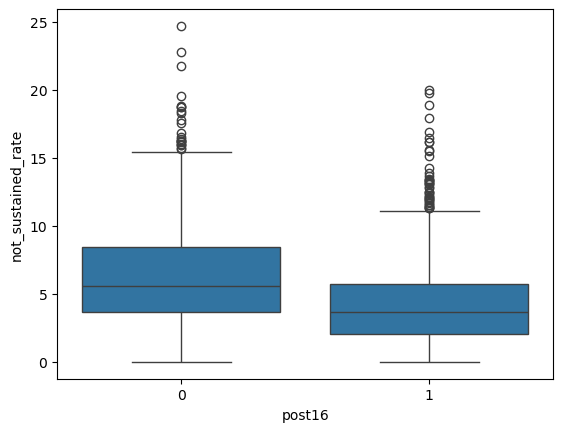

In [138]:
sns.boxplot(data=data, x='post16', y='not_sustained_rate');

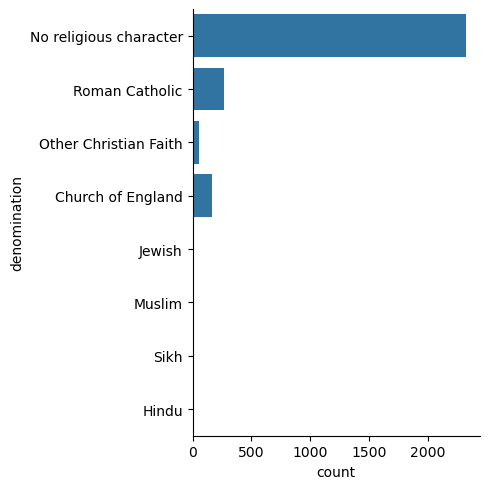

In [139]:
sns.catplot(data['denomination'], kind='count');

In [140]:
denomination_mean_neet = data.groupby('denomination')['not_sustained_rate'].mean().sort_values().index

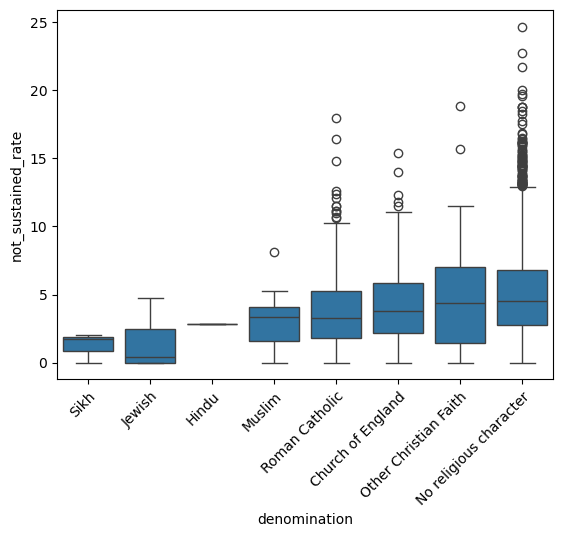

In [141]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate', order=denomination_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [142]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [143]:
data.groupby('denomination').size()

denomination
Christian       488
No faith       2327
Other faith      29
dtype: int64

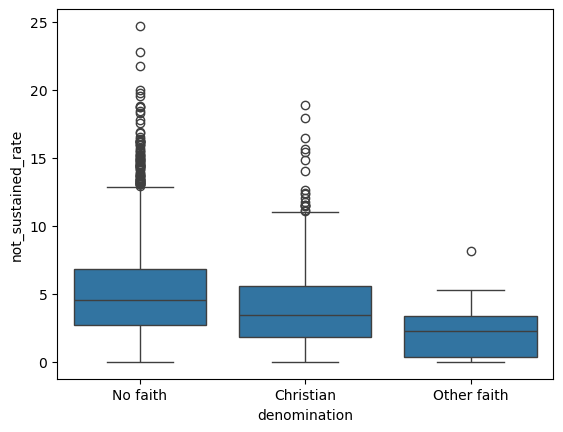

In [144]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate');

In [145]:
data['faith_binary'] = data['denomination']

In [146]:
data['faith_binary'].replace('No faith', 0, inplace=True)
data['faith_binary'].replace('Christian', 1, inplace=True)
data['faith_binary'].replace('Other faith', 1, inplace=True)

In [147]:
data.groupby('faith_binary').size()

faith_binary
0    2327
1     517
dtype: int64

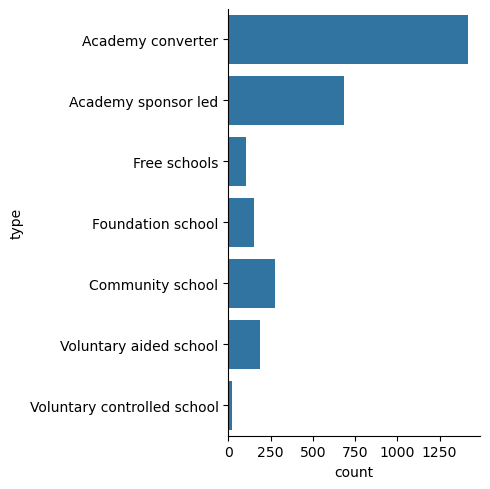

In [148]:
sns.catplot(data['type'], kind='count');

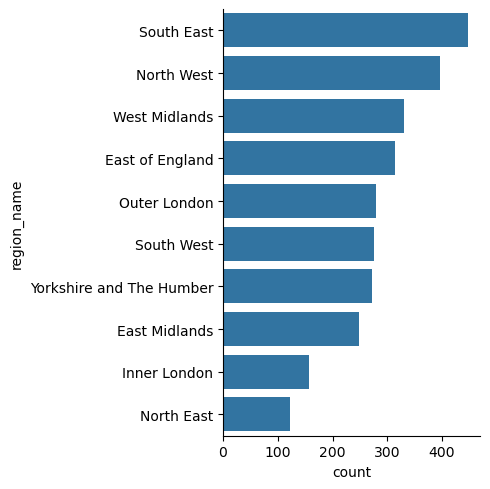

In [149]:
sns.catplot(data['region_name'], 
            kind = 'count', 
            order = data['region_name'].value_counts().index);

In [150]:
region_mean_neet = data.groupby('region_name')['not_sustained_rate'].mean().sort_values().index

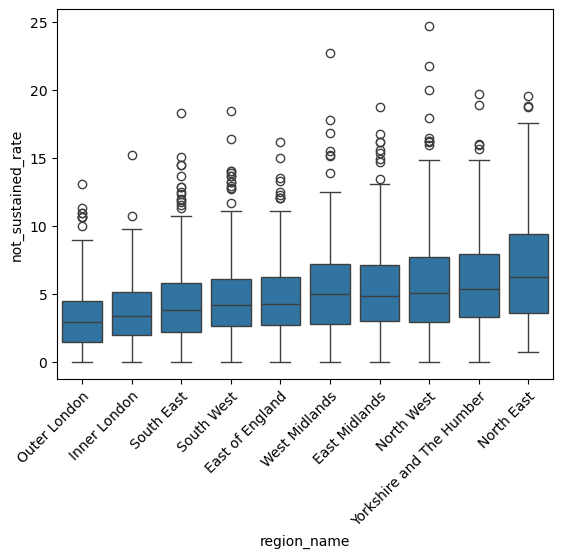

In [151]:
sns.boxplot(data=data, x='region_name', y='not_sustained_rate', order=region_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [152]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [153]:
data.groupby('region_new').size()

region_new
London       437
Midlands     579
North        792
South       1036
dtype: int64

In [154]:
ordered_regions = data.groupby('region_new')['not_sustained_rate'].median().sort_values().index

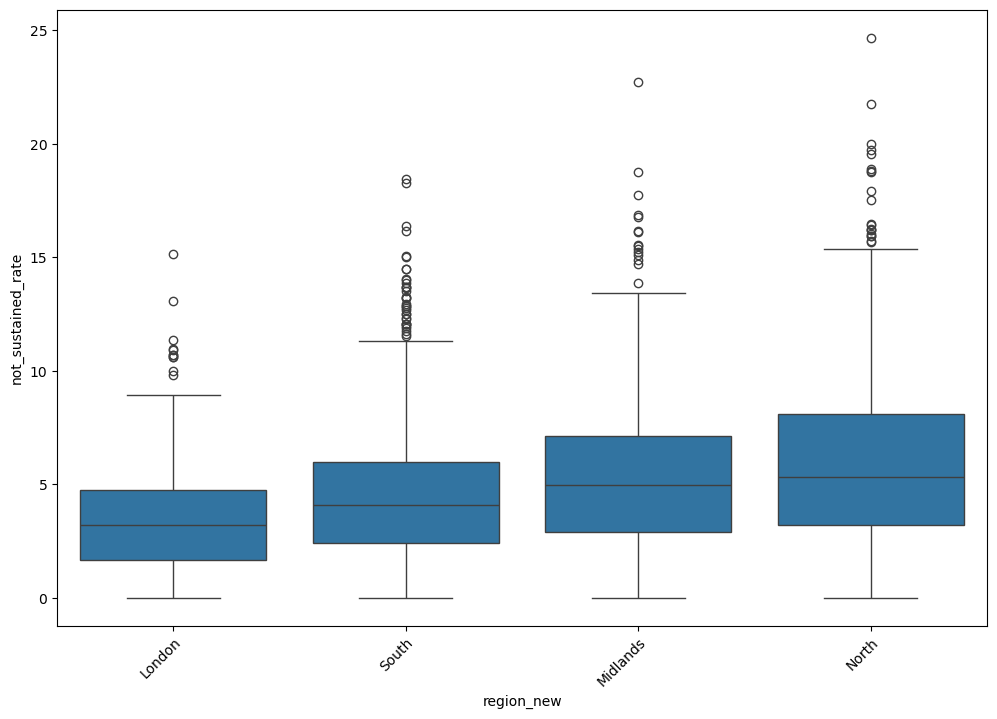

In [155]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region_new', y='not_sustained_rate', order=ordered_regions)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Reduced collinearity with IMD - variation in IMD across regions reduced. 

In [156]:
data.groupby('IMD').size()

IMD
1.0     223
2.0     270
3.0     299
4.0     306
5.0     270
6.0     282
7.0     294
8.0     294
9.0     324
10.0    282
dtype: int64

In [157]:
region_means = data.groupby('region_name')['IMD'].mean()
print(region_means)

region_name
East Midlands               5.883065
East of England             6.455414
Inner London                4.025478
North East                  4.934959
North West                  5.060453
Outer London                5.753571
South East                  6.749441
South West                  6.061818
West Midlands               4.960725
Yorkshire and The Humber    5.150735
Name: IMD, dtype: float64


In [158]:
new_region_means = data.groupby('region_new')['IMD'].mean()
print(new_region_means)

region_new
London      5.132723
Midlands    5.355786
North       5.071970
South       6.477799
Name: IMD, dtype: float64


In [159]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [160]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [161]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

In [162]:
data.groupby('urban_rural').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/1274345496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_rural').size()


urban_rural
Urban major conurbation                                    1017
Urban minor conurbation                                     100
Urban city and town                                        1313
Urban city and town in a sparse setting                       8
Rural town and fringe                                       279
Rural town and fringe in a sparse setting                    29
Rural village                                                52
Rural village in a sparse setting                             4
Rural hamlet and isolated dwellings                          40
Rural hamlet and isolated dwellings in a sparse setting       2
dtype: int64

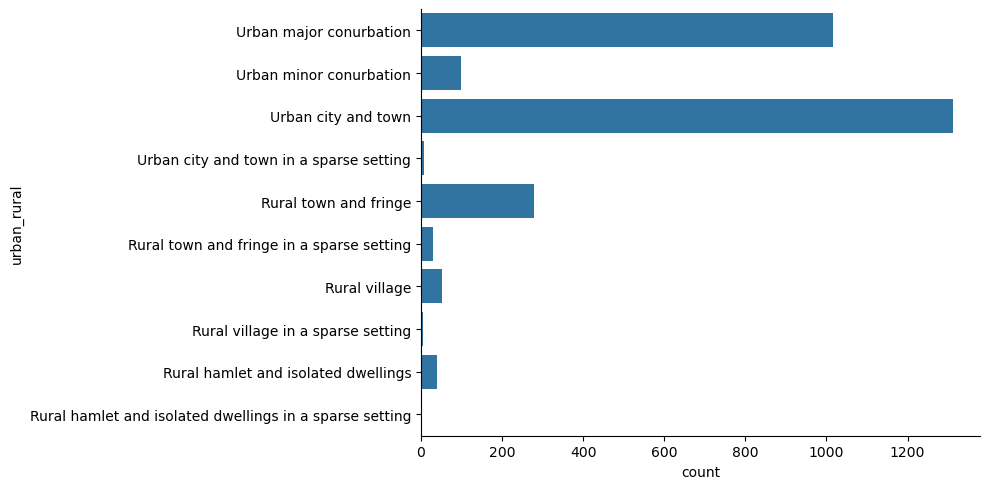

In [163]:
g = sns.catplot(data['urban_rural'], kind='count', height=5, aspect=2);

In [164]:
urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/3792850642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index


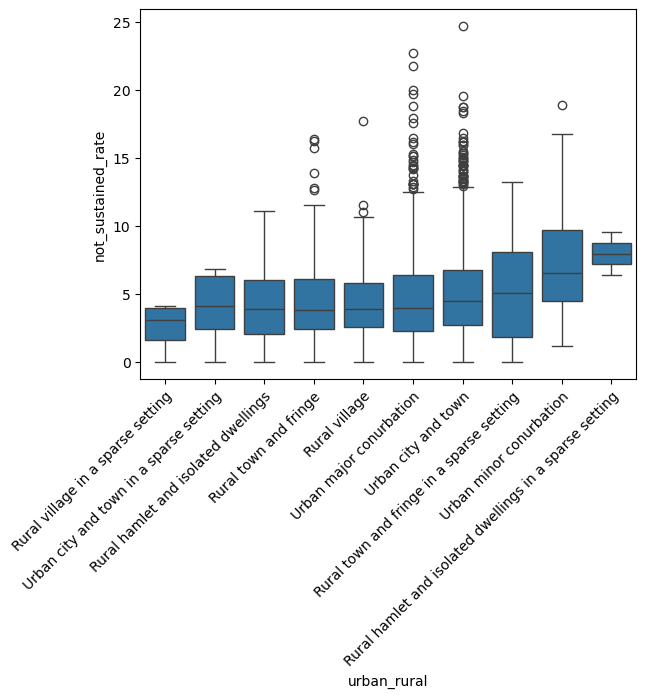

In [165]:
sns.boxplot(data=data, x='urban_rural', y='not_sustained_rate', order=urban_rural_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [166]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [167]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban city and town', 1, inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural village', 0, inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [168]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
1    2438
0     406
dtype: int64

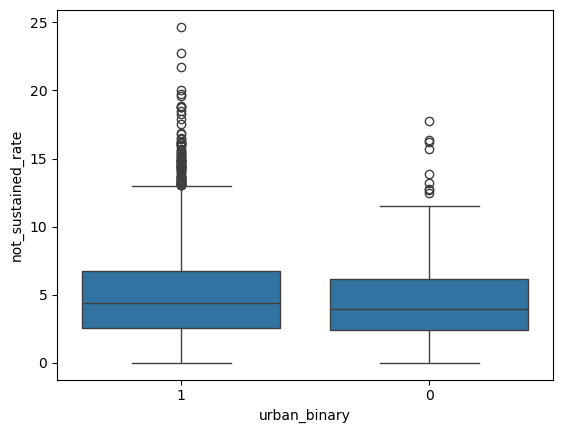

In [169]:
sns.boxplot(data=data, x='urban_binary', y='not_sustained_rate');

### Pupil characteristics

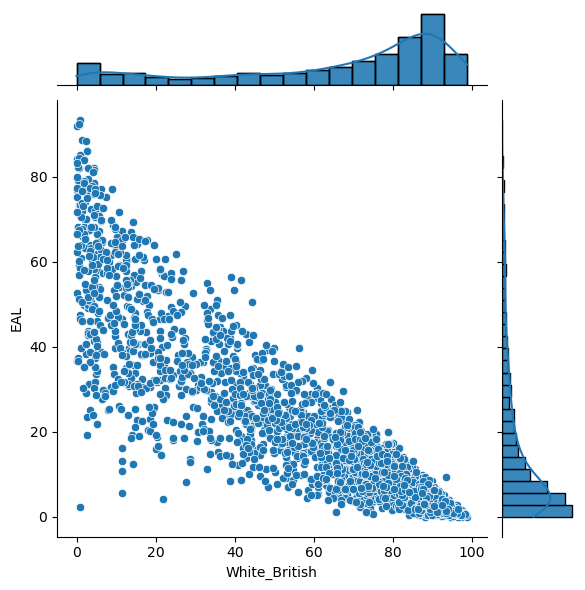

In [170]:
g = sns.jointplot(data=data, x='White_British', y='EAL')
g.plot_marginals(sns.histplot, kde=True);

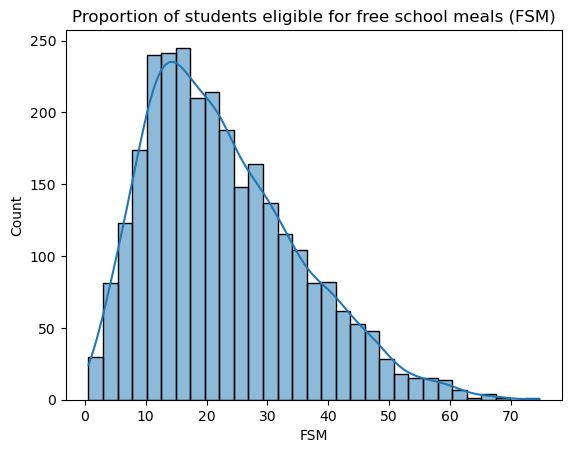

In [171]:
sns.histplot(data['FSM'], kde=True )
plt.title('Proportion of students eligible for free school meals (FSM)');

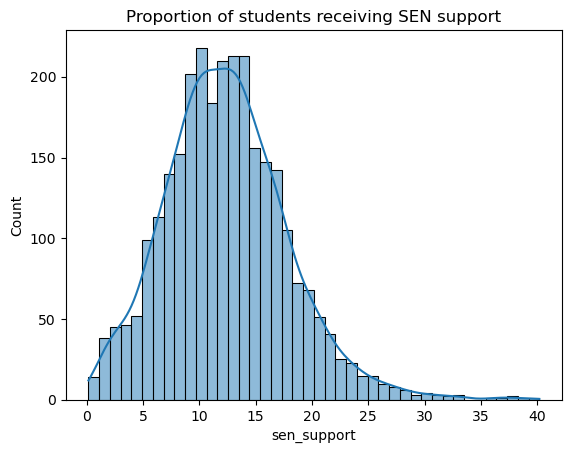

In [172]:
sns.histplot(data['sen_support'], kde=True )
plt.title('Proportion of students receiving SEN support');

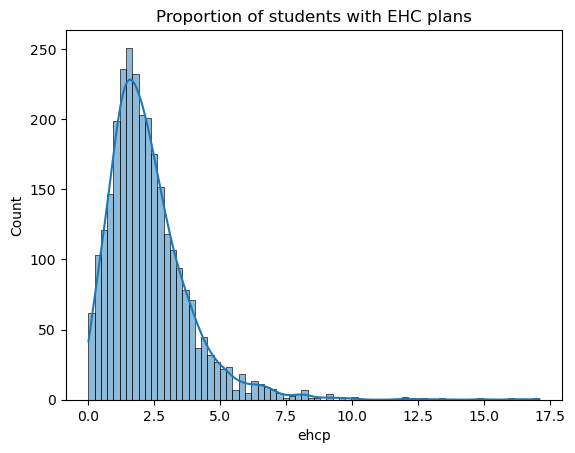

In [173]:
sns.histplot(data['ehcp'], kde=True )
plt.title('Proportion of students with EHC plans');

# Correlations

In [174]:
from copy import copy
from scipy.stats import kendalltau

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 3139
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2844 non-null   int64   
 1   not_sustained_rate       2844 non-null   float64 
 2   total_absence            2844 non-null   float64 
 3   persistent_absence       2844 non-null   float64 
 4   urban_rural              2844 non-null   category
 5   denomination             2844 non-null   object  
 6   FSM                      2844 non-null   float64 
 7   White_British            2844 non-null   float64 
 8   EAL                      2844 non-null   float64 
 9   perc_boys                2844 non-null   float64 
 10  region_name              2844 non-null   object  
 11  school_name              2844 non-null   object  
 12  headcount                2844 non-null   float64 
 13  perm_excl_rate           2844 non-null   float64 
 14  susp_rate    

In [176]:
data['Ofsted_num'] = data['Ofsted_rating']
data['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data['Ofsted_num'].replace('Good', 3, inplace=True)
data['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [177]:
vars_for_corr = data[['not_sustained_rate', 
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'Ofsted_num',
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [178]:
vars_for_corr.columns

Index(['not_sustained_rate', 'absence_rate_non_excl', 'persistent_absence',
       'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 'FSM',
       'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 'headcount',
       'KS4_headcount', 'pupil_teacher_ratio', 'assistant_teacher_ratio',
       'Ofsted_num', 'KS2_history', 'KS4_pass_rate', 'Attainment_8',
       'Progress_8', 'selective', 'post16', 'IMD', 'urban_binary',
       'single_sex_binary', 'faith_binary'],
      dtype='object')

In [179]:
corr_names = {
    'not_sustained_rate': 'Not sustained %', 
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'Ofsted_num': 'Ofsted rating',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [180]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [181]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

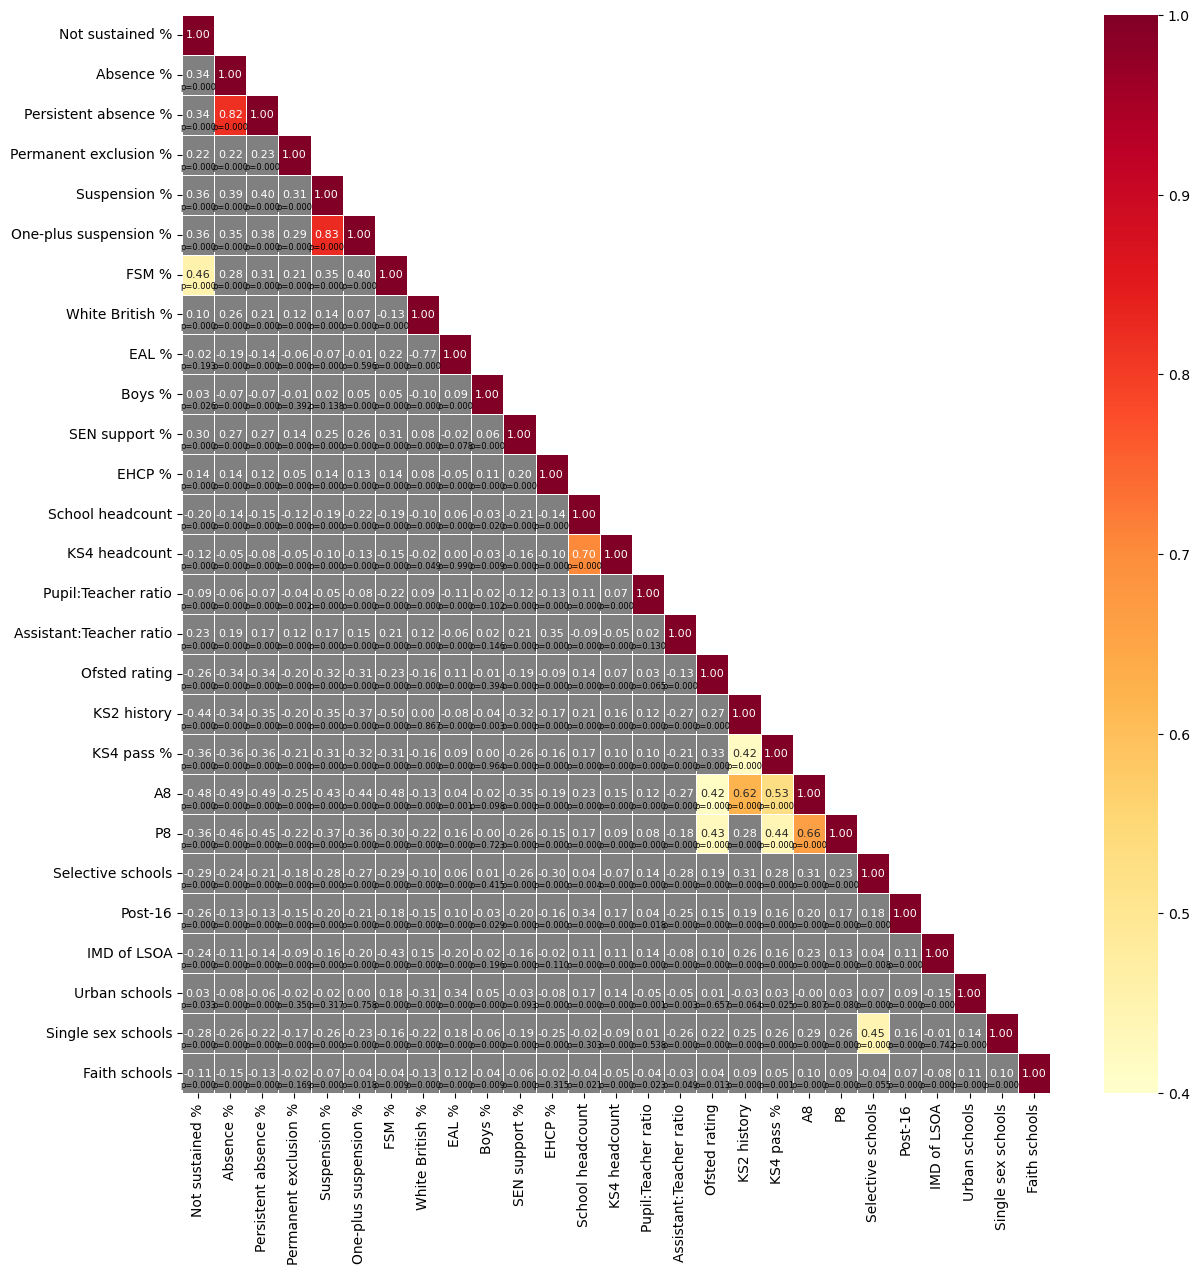

In [182]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

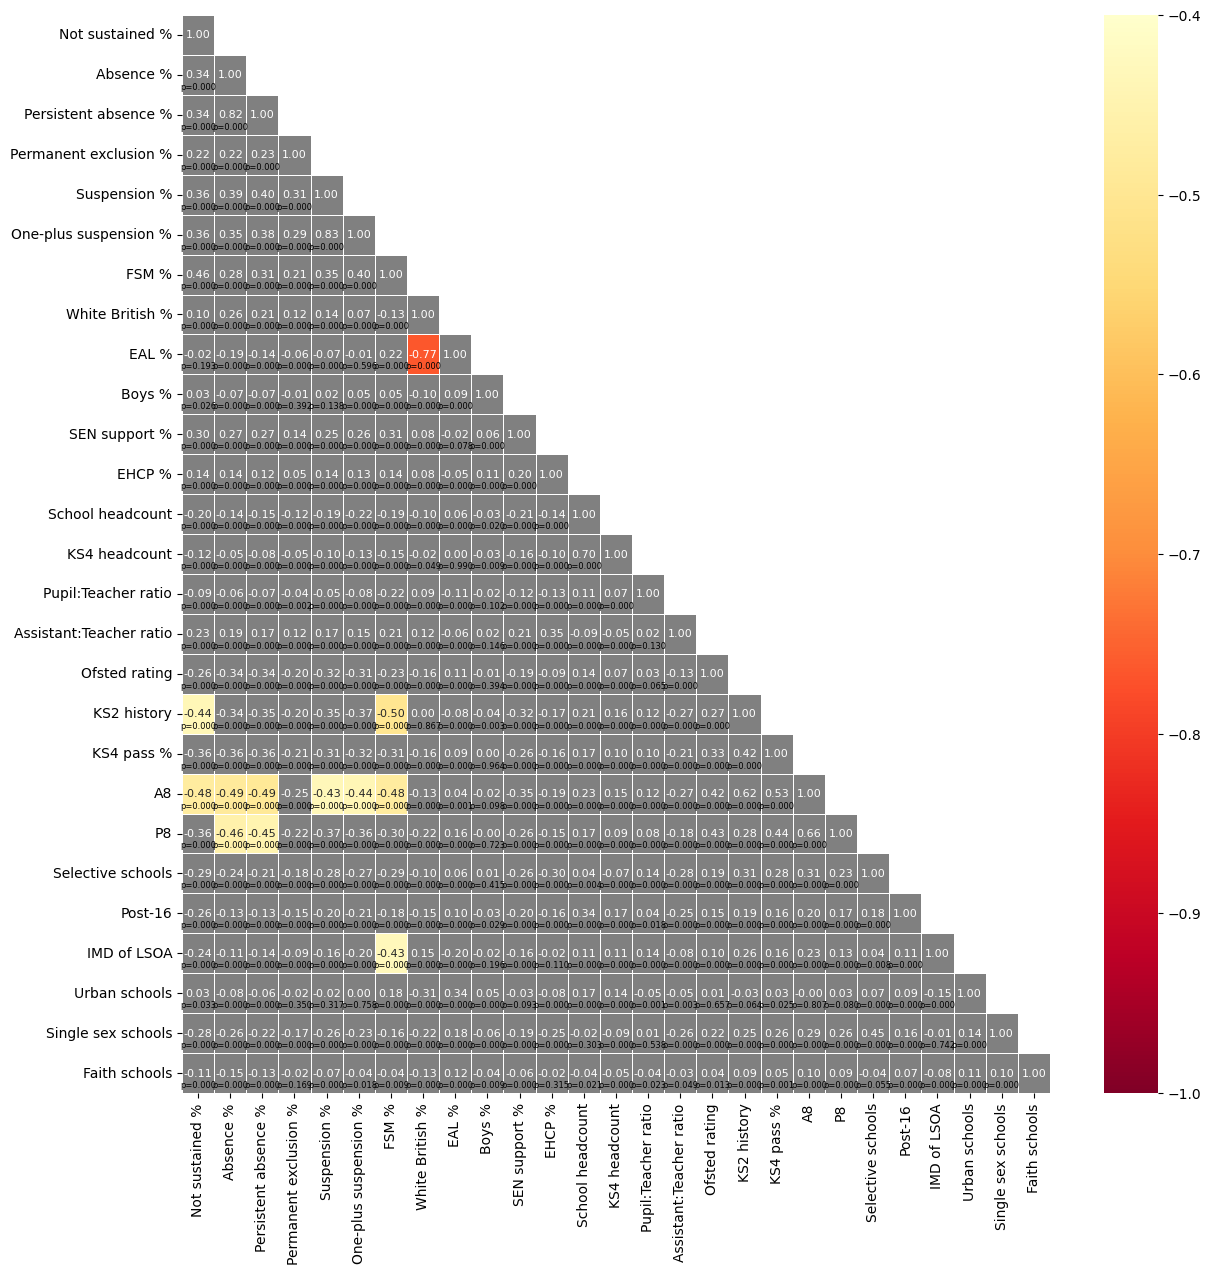

In [183]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

# Data Transformation

In [184]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [185]:
# transformer to convert quadratic variables
# include bias=false as using linear regression which automatically includes an intercept
poly = Pipeline(steps=[
    ('encoder', PolynomialFeatures(include_bias=False))])

# transformer to convert categorical variables 
cat_transformer_onehot = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None))])

# set order of values for ordinal variable
cat_transformer_ordinal = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories='auto'))])

# transformer to move towards normal distribution of numerical variables
num = Pipeline(steps=[
    ('encoder', PowerTransformer())])      

In [186]:
# classify columns for transformation
preprocessor  = ColumnTransformer(transformers = [
    ('cat_onehot', cat_transformer_onehot, 
     ['post16', 'faith_binary', 'single_sex_binary', 'urban_binary', 'selective'
     ]), 
    
    ('poly', poly, 
     ['KS2_history', 'Attainment_8', 'Progress_8', 'headcount'
     ]),
    
    ('cat_ordinal', cat_transformer_ordinal,
     ['Ofsted_rating', 'IMD'
     ]),
    
    ('num', num,
     ['pupil_teacher_ratio', 'assistant_teacher_ratio', 'susp_rate', 'FSM', 'sen_support', 'perc_boys', 'White_British', 'total_absence'
    ])
])

In [187]:
# transform the data
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
pipe_fit = pipeline.fit(data)

data_transformed = pd.DataFrame(
    pipe_fit.transform(data), 
    columns = pipe_fit.get_feature_names_out().tolist())

data_transformed.head()

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0                   0.0                   1.0                         1.0   
1                   1.0                   0.0                         1.0   
2                   1.0                   0.0                         1.0   
3                   0.0                   1.0                         1.0   
4                   0.0                   1.0                         0.0   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                         0.0                              1.0   
1                         0.0                              1.0   
2                         0.0                              1.0   
3                         0.0                              1.0   
4                         1.0                              1.0   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                              0.0                         1.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                         0.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                      0.0              102.1                37.5   
1                      0.0              103.0                51.1   
2                      0.0              101.0                45.8   
3                      0.0              104.6                48.6   
4                      0.0              102.9                45.5   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0             -0.90            788.0             10424.41   
1              0.33           1206.0             10609.00   
2              0.16            644.0             10201.00   
3             -0.27           1396.0             10941.16   
4             -0.18           1477.0             10588.41   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                         3828.75                       -91.890   
1                         5263.30                        33.990   
2                         4625.80                        16.160   
3                         5083.56                       -28.242   
4                         4681.95                       -18.522   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                      80454.8               1406.25   
1                     124218.0               2611.21   
2                      65044.0               2097.64   
3                     146021.6               2361.96   
4                     151983.3               2070.25   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                        -33.750                       29550.0   
1                         16.863                       61626.6   
2                          7.328                       29495.2   
3                        -13.122                       67845.6   
4                         -8.190                       67203.5   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0              0.8100                     -709.20           620944.0   
1              0.1089                      397.98          1454436.0   
2              0.0256                      103.04           414736.0   
3              0.0729                     -376.92          1948816.0   
4              0.0324                     -265.86          2181529.0   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [188]:
y_transformer = PowerTransformer()
Not_Sustained_transformed = y_transformer.fit_transform(data[['not_sustained_rate']])

In [189]:
Not_Sustained_transformed

array([[-0.07999734],
       [-1.01184184],
       [ 1.72625954],
       ...,
       [-0.62548047],
       [ 1.09865624],
       [-0.27774371]])

In [190]:
data_transformed['Not_Sustained_transformed'] = Not_Sustained_transformed

In [191]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2844 non-null   float64
 1   cat_onehot__post16_1             2844 non-null   float64
 2   cat_onehot__faith_binary_0       2844 non-null   float64
 3   cat_onehot__faith_binary_1       2844 non-null   float64
 4   cat_onehot__single_sex_binary_0  2844 non-null   float64
 5   cat_onehot__single_sex_binary_1  2844 non-null   float64
 6   cat_onehot__urban_binary_0       2844 non-null   float64
 7   cat_onehot__urban_binary_1       2844 non-null   float64
 8   cat_onehot__selective_0          2844 non-null   float64
 9   cat_onehot__selective_1          2844 non-null   float64
 10  poly__KS2_history                2844 non-null   float64
 11  poly__Attainment_8               2844 non-null   float64
 12  poly__Progress_8    

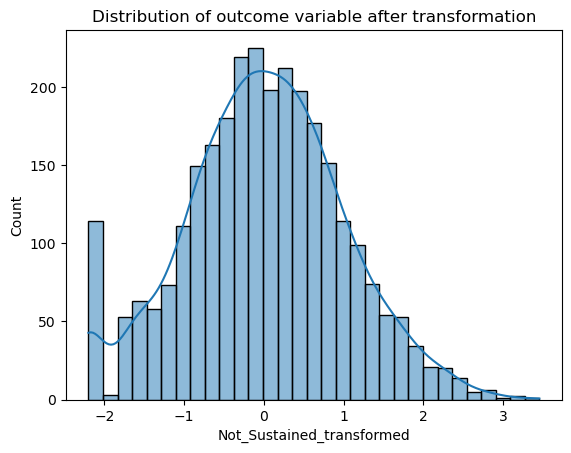

In [192]:
# distribution of outcomes
sns.histplot(data_transformed['Not_Sustained_transformed'], kde=True )
plt.title('Distribution of outcome variable after transformation');

# Regression

In [193]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2844 non-null   float64
 1   cat_onehot__post16_1             2844 non-null   float64
 2   cat_onehot__faith_binary_0       2844 non-null   float64
 3   cat_onehot__faith_binary_1       2844 non-null   float64
 4   cat_onehot__single_sex_binary_0  2844 non-null   float64
 5   cat_onehot__single_sex_binary_1  2844 non-null   float64
 6   cat_onehot__urban_binary_0       2844 non-null   float64
 7   cat_onehot__urban_binary_1       2844 non-null   float64
 8   cat_onehot__selective_0          2844 non-null   float64
 9   cat_onehot__selective_1          2844 non-null   float64
 10  poly__KS2_history                2844 non-null   float64
 11  poly__Attainment_8               2844 non-null   float64
 12  poly__Progress_8    

In [194]:
data_transformed.head()

cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0                   0.0                   1.0                         1.0   
1                   1.0                   0.0                         1.0   
2                   1.0                   0.0                         1.0   
3                   0.0                   1.0                         1.0   
4                   0.0                   1.0                         0.0   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                         0.0                              1.0   
1                         0.0                              1.0   
2                         0.0                              1.0   
3                         0.0                              1.0   
4                         1.0                              1.0   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                              0.0                         1.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                         0.0                      1.0   
1                         1.0                      1.0   
2                         1.0                      1.0   
3                         1.0                      1.0   
4                         1.0                      1.0   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                      0.0              102.1                37.5   
1                      0.0              103.0                51.1   
2                      0.0              101.0                45.8   
3                      0.0              104.6                48.6   
4                      0.0              102.9                45.5   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0             -0.90            788.0             10424.41   
1              0.33           1206.0             10609.00   
2              0.16            644.0             10201.00   
3             -0.27           1396.0             10941.16   
4             -0.18           1477.0             10588.41   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                         3828.75                       -91.890   
1                         5263.30                        33.990   
2                         4625.80                        16.160   
3                         5083.56                       -28.242   
4                         4681.95                       -18.522   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                      80454.8               1406.25   
1                     124218.0               2611.21   
2                      65044.0               2097.64   
3                     146021.6               2361.96   
4                     151983.3               2070.25   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                        -33.750                       29550.0   
1                         16.863                       61626.6   
2                          7.328                       29495.2   
3                        -13.122                       67845.6   
4                         -8.190                       67203.5   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0              0.8100                     -709.20           620944.0   
1              0.1089                      397.98          1454436.0   
2              0.0256                      103.04           414736.0   
3              0.0729                     -376.92          1948816.0   
4              0.0324                     -265.86          2181529.0   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [195]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## IGNORE

In [133]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [134]:
data_transformed = pd.get_dummies(data, 
                                  columns=['type', 
                                           'denomination', 
                                           #'school_sex', 
                                           'region_new', 
                                           #'Ofsted_rating'
                                          ], 
                                 drop_first=False)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [135]:
ord_transformer = OrdinalEncoder()

In [136]:
data_transformed[['Ofsted_rating']] = ord_transformer.fit_transform(data_transformed[['Ofsted_rating']])

In [137]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   URN                               2972 non-null   int64   
 1   not_sustained_rate                2972 non-null   float64 
 2   total_absence                     2972 non-null   float64 
 3   persistent_absence                2972 non-null   float64 
 4   urban_rural                       2972 non-null   category
 5   FSM                               2972 non-null   float64 
 6   White_British                     2972 non-null   float64 
 7   EAL                               2972 non-null   float64 
 8   perc_boys                         2972 non-null   float64 
 9   region_name                       2972 non-null   object  
 10  school_name                       2972 non-null   object  
 11  headcount                         2972 non-null   float64 
 1

In [138]:
data_transformed = data_transformed.astype({col: 'int' for col in data_transformed.select_dtypes(include='bool').columns})

## Specify variables

In [ ]:
predictors = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school'
]]

In [140]:
controls = data_transformed[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [141]:
predictors_controls = data_transformed[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
#'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

### Run model - Predictors only

#### predictors - individual effects

In [142]:
predictors_results = {}

for p in predictors:
    x = data_transformed[p]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    predictors_results[p] = model.summary()
    

In [143]:
predictors_results

{'headcount': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.528
 Model:                            OLS   Adj. R-squared (uncentered):              0.528
 Method:                 Least Squares   F-statistic:                              3321.
 Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
 Time:                        15:55:54   Log-Likelihood:                         -8661.3
 No. Observations:                2972   AIC:                                  1.732e+04
 Df Residuals:                    2971   BIC:                                  1.733e+04
 Df Model:                           1                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t   

In [144]:
# extract t stat for each predictor 
t_statistics = {}

for predictor, result in predictors_results.items():
    t_statistics[predictor] = result.tables[1].data[1][3] 

t_statistics

{'headcount': '   57.625',
 'pupil_teacher_ratio': '   76.058',
 'assistant_teacher_ratio': '   73.178',
 'susp_rate': '   58.408',
 'Progress_8': '  -17.018',
 'post16': '   35.063',
 'Ofsted_rating': '   26.236',
 'faith_binary': '   16.758',
 'single_sex_binary': '    6.366',
 'type_Academy sponsor led': '   41.872',
 'type_Community school': '   13.483',
 'type_Foundation school': '   11.451',
 'type_Free schools': '    8.698',
 'type_Voluntary aided school': '    8.956',
 'type_Voluntary controlled school': '    2.915'}

#### all predictors

In [145]:
x = predictors

In [146]:
y = data_transformed['not_sustained_rate']

In [147]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              825.6
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7329.8
No. Observations:                2972   AIC:                                  1.469e+04
Df Residuals:                    2957   BIC:                                  1.478e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
headcount                        -2.702e-05      0.000     -0.174      0.862      -0.000       0.000
pupil_teacher_ratio                  0.2080      0.012     16.650      0.000       0.184       0.232
assistant_teacher_ratio              3.6672      0.464      7.896      0.000       2.757       4.578
susp_rate                            0.0332      0.003     13.127      0.000       0.028       0.038
Progress_8                          -2.0172      0.127    -15.833      0.000      -2.267      -1.767
post16                              -0.7340      0.125     -5.867      0.000      -0.979      -0.489
Ofsted_rating                        0.0047      0.047      0.099      0.921      -0.088       0.097
faith_binary                        -0.0062      0.160     -0.039      0.969      -0.320       0.307
single_sex_binary                   -0.6330      0.185     -3.419      0.001      -0.996      -0.270
type_Academy sponsor led             2.4293      0.138     17.555      0.000       2.158       2.701
type_Community school                0.5893      0.191      3.092      0.002       0.216       0.963
type_Foundation school               1.2039      0.246      4.891      0.000       0.721       1.687
type_Free schools                    1.1026      0.284      3.889      0.000       0.547       1.659
type_Voluntary aided school          0.5095      0.252      2.020      0.043       0.015       1.004
type_Voluntary controlled school    -0.4183      0.632     -0.662      0.508      -1.658       0.821
==============================================================================
Omnibus:                      360.013   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.407
Skew:                           0.767   Prob(JB):                    2.98e-153
Kurtosis:                       4.822   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### forward selection: corr coef

In [148]:
x = predictors[['susp_rate',
'Progress_8']]

In [149]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              1720.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -8633.2
No. Observations:                2972   AIC:                                  1.727e+04
Df Residuals:                    2970   BIC:                                  1.728e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
susp_rate      0.1459      0.003     53.574      0.000       0.141       0.151
Progress_8    -0.6306      0.171     -3.685      0.000      -0.966      -0.295
==============================================================================
Omnibus:                      908.024   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15351.209
Skew:                          -0.997   Prob(JB):                         0.00
Kurtosis:                      13.954   Cond. No.                         67.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary']]

In [151]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              1182.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -8608.2
No. Observations:                2972   AIC:                                  1.722e+04
Df Residuals:                    2969   BIC:                                  1.724e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
susp_rate             0.1416      0.003     51.187      0.000       0.136       0.147
Progress_8           -1.1431      0.184     -6.198      0.000      -1.505      -0.781
single_sex_binary     1.8485      0.260      7.105      0.000       1.338       2.359
==============================================================================
Omnibus:                      784.601   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11010.012
Skew:                          -0.857   Prob(JB):                         0.00
Kurtosis:                      12.272   Cond. No.                         109.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
x = predictors[['susp_rate',
'Progress_8', 'single_sex_binary', 'post16']]

In [153]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              1239.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -8316.7
No. Observations:                2972   AIC:                                  1.664e+04
Df Residuals:                    2968   BIC:                                  1.667e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
susp_rate             0.1093      0.003     38.816      0.000       0.104       0.115
Progress_8           -2.0718      0.171    -12.103      0.000      -2.407      -1.736
single_sex_binary     0.1288      0.245      0.525      0.600      -0.353       0.610
post16                2.8175      0.111     25.361      0.000       2.600       3.035
==============================================================================
Omnibus:                      253.561   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.316
Skew:                           0.173   Prob(JB):                    6.30e-309
Kurtosis:                       6.368   Cond. No.                         112.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio']]

In [155]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              2158.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7750.4
No. Observations:                2972   AIC:                                  1.551e+04
Df Residuals:                    2968   BIC:                                  1.553e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0630      0.003     23.895      0.000       0.058       0.068
Progress_8                 -1.8039      0.135    -13.386      0.000      -2.068      -1.540
post16                      0.8785      0.103      8.547      0.000       0.677       1.080
assistant_teacher_ratio    13.0312      0.351     37.109      0.000      12.343      13.720
==============================================================================
Omnibus:                      287.830   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.226
Skew:                           0.561   Prob(JB):                    1.80e-156
Kurtosis:                       5.129   Cond. No.                         187.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [157]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              1882.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7653.8
No. Observations:                2972   AIC:                                  1.532e+04
Df Residuals:                    2967   BIC:                                  1.535e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0573      0.003     22.179      0.000       0.052       0.062
Progress_8                 -2.1930      0.133    -16.445      0.000      -2.454      -1.932
post16                     -0.3992      0.135     -2.968      0.003      -0.663      -0.135
assistant_teacher_ratio     9.2467      0.433     21.357      0.000       8.398      10.096
headcount                   0.0018      0.000     14.117      0.000       0.002       0.002
==============================================================================
Omnibus:                      368.794   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.227
Skew:                           0.756   Prob(JB):                    3.77e-170
Kurtosis:                       5.004   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount']]

In [159]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              1882.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7653.8
No. Observations:                2972   AIC:                                  1.532e+04
Df Residuals:                    2967   BIC:                                  1.535e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0573      0.003     22.179      0.000       0.052       0.062
Progress_8                 -2.1930      0.133    -16.445      0.000      -2.454      -1.932
post16                     -0.3992      0.135     -2.968      0.003      -0.663      -0.135
assistant_teacher_ratio     9.2467      0.433     21.357      0.000       8.398      10.096
headcount                   0.0018      0.000     14.117      0.000       0.002       0.002
==============================================================================
Omnibus:                      368.794   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              780.227
Skew:                           0.756   Prob(JB):                    3.77e-170
Kurtosis:                       5.004   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'headcount', 'pupil_teacher_ratio']]

In [161]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              1806.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7491.3
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2966   BIC:                                  1.503e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0427      0.003     16.611      0.000       0.038       0.048
Progress_8                 -2.3652      0.127    -18.679      0.000      -2.613      -2.117
post16                     -0.7510      0.129     -5.832      0.000      -1.004      -0.499
assistant_teacher_ratio     4.8527      0.474     10.243      0.000       3.924       5.782
headcount                  -0.0001      0.000     -0.820      0.412      -0.000       0.000
pupil_teacher_ratio         0.2285      0.012     18.512      0.000       0.204       0.253
==============================================================================
Omnibus:                      400.294   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.862
Skew:                           0.830   Prob(JB):                    4.58e-175
Kurtosis:                       4.931   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio']]

In [163]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              2167.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7491.7
No. Observations:                2972   AIC:                                  1.499e+04
Df Residuals:                    2967   BIC:                                  1.502e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
susp_rate                   0.0429      0.003     16.750      0.000       0.038       0.048
Progress_8                 -2.3764      0.126    -18.879      0.000      -2.623      -2.130
post16                     -0.7940      0.118     -6.751      0.000      -1.025      -0.563
assistant_teacher_ratio     4.8224      0.472     10.211      0.000       3.896       5.748
pupil_teacher_ratio         0.2219      0.009     23.755      0.000       0.204       0.240
==============================================================================
Omnibus:                      406.016   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              815.625
Skew:                           0.839   Prob(JB):                    7.75e-178
Kurtosis:                       4.941   Cond. No.                         290.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
x = predictors[['susp_rate',
'Progress_8', 'post16', 'assistant_teacher_ratio', 'pupil_teacher_ratio',
               #'type_Academy converter',
'type_Academy sponsor led',
'type_Community school',
'type_Foundation school',
'type_Free schools',
'type_Voluntary aided school',
'type_Voluntary controlled school']]

In [165]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     not_sustained_rate   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              1122.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        15:55:54   Log-Likelihood:                         -7335.8
No. Observations:                2972   AIC:                                  1.469e+04
Df Residuals:                    2961   BIC:                                  1.476e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
susp_rate                            0.0332      0.003     13.224      0.000       0.028       0.038
Progress_8                          -2.1382      0.121    -17.696      0.000      -2.375      -1.901
post16                              -0.7757      0.112     -6.923      0.000      -0.995      -0.556
assistant_teacher_ratio              3.8815      0.460      8.443      0.000       2.980       4.783
pupil_teacher_ratio                  0.2008      0.009     22.170      0.000       0.183       0.219
type_Academy sponsor led             2.4547      0.138     17.779      0.000       2.184       2.725
type_Community school                0.5704      0.189      3.018      0.003       0.200       0.941
type_Foundation school               1.1943      0.246      4.861      0.000       0.713       1.676
type_Free schools                    1.1334      0.278      4.076      0.000       0.588       1.679
type_Voluntary aided school          0.4471      0.219      2.042      0.041       0.018       0.876
type_Voluntary controlled school    -0.4616      0.631     -0.731      0.465      -1.700       0.776
==============================================================================
Omnibus:                      350.299   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.924
Skew:                           0.752   Prob(JB):                    6.18e-148
Kurtosis:                       4.792   Cond. No.                         410.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [167]:
vif_values

predictor       VIF
10  type_Voluntary controlled school  1.022831
8                  type_Free schools  1.076771
9        type_Voluntary aided school  1.112678
7             type_Foundation school  1.120807
6              type_Community school  1.199982
1                         Progress_8  1.354455
5           type_Academy sponsor led  1.657943
0                          susp_rate  2.314476
2                             post16  2.853182
3            assistant_teacher_ratio  5.197548
4                pupil_teacher_ratio  8.656963

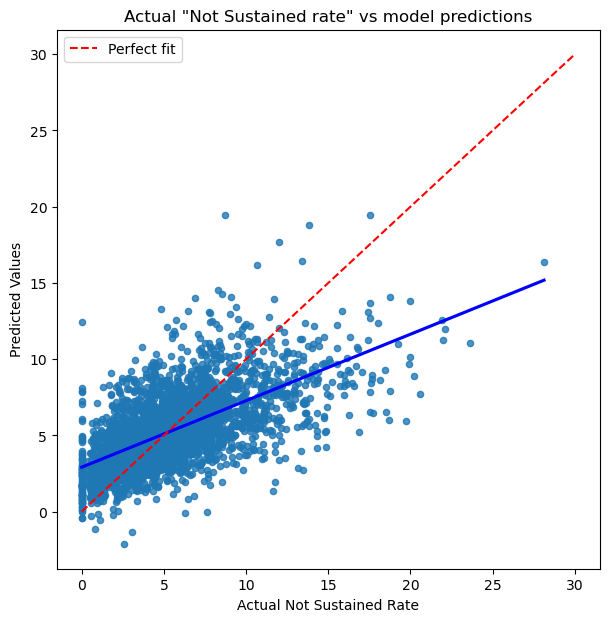

In [168]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

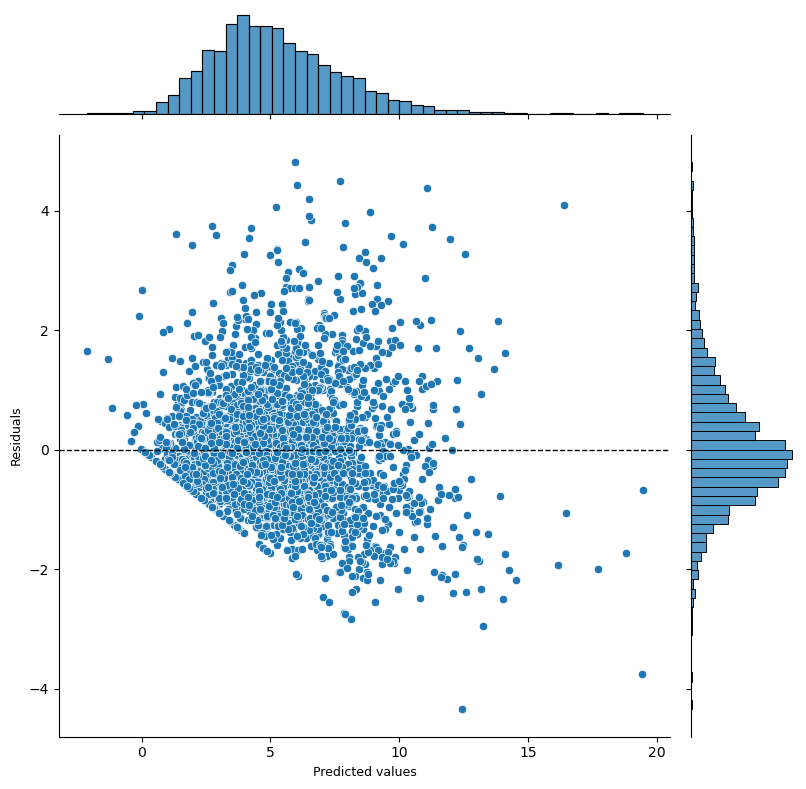

In [169]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

In [170]:
best_predictors = predictors[[
    'susp_rate',
    'Progress_8', 
    'post16', 
    'assistant_teacher_ratio', 
    'pupil_teacher_ratio'
]]

## forward selection: adj. R-squared

In [197]:
x = data_transformed[[
    'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio'
]]

In [198]:
y = data_transformed['Not_Sustained_transformed']

In [199]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.126
Model:                                   OLS   Adj. R-squared (uncentered):              0.126
Method:                        Least Squares   F-statistic:                              205.2
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                    5.63e-84
Time:                               13:55:38   Log-Likelihood:                         -3843.6
No. Observations:                       2844   AIC:                                      7691.
Df Residuals:                           2842   BIC:                                      7703.
Df Model:                                  2                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.3372      0.018     19.210      0.000       0.303       0.372
num__pupil_teacher_ratio        -0.1286      0.018     -7.328      0.000      -0.163      -0.094
==============================================================================
Omnibus:                        4.390   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.341
Skew:                           0.095   Prob(JB):                        0.114
Kurtosis:                       3.029   Cond. No.                         1.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
model.aic

7691.273909971326

In [201]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate'
]]

In [202]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.335
Model:                                   OLS   Adj. R-squared (uncentered):              0.334
Method:                        Least Squares   F-statistic:                              476.8
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   6.49e-251
Time:                               13:55:46   Log-Likelihood:                         -3455.6
No. Observations:                       2844   AIC:                                      6917.
Df Residuals:                           2841   BIC:                                      6935.
Df Model:                                  3                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.2211      0.016     13.987      0.000       0.190       0.252
num__pupil_teacher_ratio        -0.1049      0.015     -6.840      0.000      -0.135      -0.075
num__susp_rate                   0.4717      0.016     29.857      0.000       0.441       0.503
==============================================================================
Omnibus:                       34.535   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.781
Skew:                           0.211   Prob(JB):                     2.30e-09
Kurtosis:                       3.397   Cond. No.                         1.29
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
model.aic

6917.134347422413

In [204]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'poly__headcount',
    'poly__headcount^2'
]]

In [205]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.342
Model:                                   OLS   Adj. R-squared (uncentered):              0.341
Method:                        Least Squares   F-statistic:                              295.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   3.78e-255
Time:                               13:55:51   Log-Likelihood:                         -3439.6
No. Observations:                       2844   AIC:                                      6889.
Df Residuals:                           2839   BIC:                                      6919.
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.2195      0.016     13.958      0.000       0.189       0.250
num__pupil_teacher_ratio        -0.0958      0.015     -6.244      0.000      -0.126      -0.066
num__susp_rate                   0.4540      0.016     28.329      0.000       0.423       0.485
poly__headcount                  0.0002   4.63e-05      4.353      0.000       0.000       0.000
poly__headcount^2            -1.706e-07   3.28e-08     -5.201      0.000   -2.35e-07   -1.06e-07
==============================================================================
Omnibus:                       23.738   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.045
Skew:                           0.153   Prob(JB):                     8.13e-07
Kurtosis:                       3.378   Cond. No.                     1.94e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
model.aic

6889.1741615377705

In [207]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
     'poly__headcount',
    'poly__headcount^2',
    'cat_onehot__post16_0'
]]

In [208]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.360
Model:                                   OLS   Adj. R-squared (uncentered):              0.359
Method:                        Least Squares   F-statistic:                              266.3
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   7.49e-271
Time:                               13:55:55   Log-Likelihood:                         -3400.3
No. Observations:                       2844   AIC:                                      6813.
Df Residuals:                           2838   BIC:                                      6848.
Df Model:                                  6                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1853      0.016     11.595      0.000       0.154       0.217
num__pupil_teacher_ratio        -0.0910      0.015     -6.007      0.000      -0.121      -0.061
num__susp_rate                   0.4333      0.016     27.122      0.000       0.402       0.465
poly__headcount              -7.339e-05   5.52e-05     -1.331      0.183      -0.000    3.48e-05
poly__headcount^2             -2.39e-08   3.63e-08     -0.658      0.511   -9.51e-08    4.73e-08
cat_onehot__post16_0             0.2970      0.033      8.911      0.000       0.232       0.362
==============================================================================
Omnibus:                       17.109   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.497
Skew:                           0.112   Prob(JB):                     3.54e-05
Kurtosis:                       3.351   Cond. No.                     3.72e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [209]:
model.aic

6812.697908207523

In [210]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0'
]]

In [211]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.348
Model:                                   OLS   Adj. R-squared (uncentered):              0.347
Method:                        Least Squares   F-statistic:                              379.6
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   3.58e-262
Time:                               13:56:05   Log-Likelihood:                         -3426.4
No. Observations:                       2844   AIC:                                      6861.
Df Residuals:                           2840   BIC:                                      6885.
Df Model:                                  4                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1989      0.016     12.502      0.000       0.168       0.230
num__pupil_teacher_ratio        -0.1005      0.015     -6.614      0.000      -0.130      -0.071
num__susp_rate                   0.4538      0.016     28.701      0.000       0.423       0.485
cat_onehot__post16_0             0.1980      0.026      7.672      0.000       0.147       0.249
==============================================================================
Omnibus:                       26.998   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.302
Skew:                           0.175   Prob(JB):                     1.60e-07
Kurtosis:                       3.375   Cond. No.                         1.95
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
model.aic

6860.791496590664

In [213]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating'
]]

In [214]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.354
Model:                                   OLS   Adj. R-squared (uncentered):              0.352
Method:                        Least Squares   F-statistic:                              310.6
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   8.29e-266
Time:                               13:56:09   Log-Likelihood:                         -3415.0
No. Observations:                       2844   AIC:                                      6840.
Df Residuals:                           2839   BIC:                                      6870.
Df Model:                                  5                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1904      0.016     11.941      0.000       0.159       0.222
num__pupil_teacher_ratio        -0.1015      0.015     -6.706      0.000      -0.131      -0.072
num__susp_rate                   0.4530      0.016     28.761      0.000       0.422       0.484
cat_onehot__post16_0             0.2411      0.027      8.853      0.000       0.188       0.295
cat_ordinal__Ofsted_rating      -0.0567      0.012     -4.790      0.000      -0.080      -0.033
==============================================================================
Omnibus:                       29.870   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.043
Skew:                           0.185   Prob(JB):                     2.46e-08
Kurtosis:                       3.399   Cond. No.                         2.54
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
model.aic

6839.901578898429

In [216]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2'
]]

In [217]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.414
Model:                                   OLS   Adj. R-squared (uncentered):              0.413
Method:                        Least Squares   F-statistic:                              286.4
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                   1.48e-323
Time:                               13:56:14   Log-Likelihood:                         -3275.4
No. Observations:                       2844   AIC:                                      6565.
Df Residuals:                           2837   BIC:                                      6606.
Df Model:                                  7                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1505      0.015      9.794      0.000       0.120       0.181
num__pupil_teacher_ratio        -0.0862      0.014     -5.960      0.000      -0.115      -0.058
num__susp_rate                   0.3147      0.017     18.464      0.000       0.281       0.348
cat_onehot__post16_0             0.2439      0.026      9.260      0.000       0.192       0.296
cat_ordinal__Ofsted_rating      -0.0399      0.012     -3.374      0.001      -0.063      -0.017
poly__Progress_8                -0.5957      0.035    -17.041      0.000      -0.664      -0.527
poly__Progress_8^2              -0.1261      0.028     -4.555      0.000      -0.180      -0.072
==============================================================================
Omnibus:                       13.364   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.562
Skew:                           0.121   Prob(JB):                     0.000688
Kurtosis:                       3.253   Cond. No.                         3.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model.aic

6774.172647279976

In [219]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1'
]]

In [220]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.420
Model:                                   OLS   Adj. R-squared (uncentered):              0.419
Method:                        Least Squares   F-statistic:                              257.0
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               13:57:24   Log-Likelihood:                         -3260.1
No. Observations:                       2844   AIC:                                      6536.
Df Residuals:                           2836   BIC:                                      6584.
Df Model:                                  8                                                  
Covariance Type:                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio     0.1485      0.015      9.709      0.000       0.118       0.178
num__pupil_teacher_ratio        -0.0892      0.014     -6.191      0.000      -0.117      -0.061
num__susp_rate                   0.3120      0.017     18.392      0.000       0.279       0.345
cat_onehot__post16_0             0.2659      0.027     10.034      0.000       0.214       0.318
cat_ordinal__Ofsted_rating      -0.0299      0.012     -2.518      0.012      -0.053      -0.007
poly__Progress_8                -0.5737      0.035    -16.390      0.000      -0.642      -0.505
poly__Progress_8^2              -0.1077      0.028     -3.884      0.000      -0.162      -0.053
cat_onehot__faith_binary_1      -0.1976      0.036     -5.534      0.000      -0.268      -0.128
==============================================================================
Omnibus:                       12.460   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.582
Skew:                           0.115   Prob(JB):                      0.00112
Kurtosis:                       3.249   Cond. No.                         3.79
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
model.aic

6794.10523024639

In [221]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1'
]]

In [222]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.432
Model:                                   OLS   Adj. R-squared (uncentered):              0.431
Method:                        Least Squares   F-statistic:                              240.0
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               13:58:10   Log-Likelihood:                         -3230.1
No. Observations:                       2844   AIC:                                      6478.
Df Residuals:                           2835   BIC:                                      6532.
Df Model:                                  9                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.1249      0.015      8.093      0.000       0.095       0.155
num__pupil_teacher_ratio           -0.0897      0.014     -6.290      0.000      -0.118      -0.062
num__susp_rate                      0.2886      0.017     16.923      0.000       0.255       0.322
cat_onehot__post16_0                0.2823      0.026     10.728      0.000       0.231       0.334
cat_ordinal__Ofsted_rating         -0.0175      0.012     -1.474      0.141      -0.041       0.006
poly__Progress_8                   -0.5237      0.035    -14.863      0.000      -0.593      -0.455
poly__Progress_8^2                 -0.0684      0.028     -2.452      0.014      -0.123      -0.014
cat_onehot__faith_binary_1         -0.1653      0.036     -4.647      0.000      -0.235      -0.096
cat_onehot__single_sex_binary_1    -0.3850      0.049     -7.780      0.000      -0.482      -0.288
==============================================================================
Omnibus:                       13.386   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.499
Skew:                           0.100   Prob(JB):                     0.000431
Kurtosis:                       3.302   Cond. No.                         5.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
    #'cat_ordinal__Ofsted_rating',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1'
]]

In [224]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.432
Model:                                   OLS   Adj. R-squared (uncentered):              0.430
Method:                        Least Squares   F-statistic:                              269.6
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               13:58:31   Log-Likelihood:                         -3231.2
No. Observations:                       2844   AIC:                                      6478.
Df Residuals:                           2836   BIC:                                      6526.
Df Model:                                  8                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.1261      0.015      8.182      0.000       0.096       0.156
num__pupil_teacher_ratio           -0.0897      0.014     -6.294      0.000      -0.118      -0.062
num__susp_rate                      0.2871      0.017     16.861      0.000       0.254       0.320
cat_onehot__post16_0                0.2738      0.026     10.662      0.000       0.223       0.324
poly__Progress_8                   -0.5245      0.035    -14.883      0.000      -0.594      -0.455
poly__Progress_8^2                 -0.0785      0.027     -2.900      0.004      -0.132      -0.025
cat_onehot__faith_binary_1         -0.1723      0.035     -4.886      0.000      -0.241      -0.103
cat_onehot__single_sex_binary_1    -0.3948      0.049     -8.050      0.000      -0.491      -0.299
==============================================================================
Omnibus:                       12.844   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.647
Skew:                           0.102   Prob(JB):                     0.000660
Kurtosis:                       3.287   Cond. No.                         4.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
model.aic

6765.760987302327

In [225]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1'
]]

In [226]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.432
Model:                                   OLS   Adj. R-squared (uncentered):              0.430
Method:                        Least Squares   F-statistic:                              269.6
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               13:59:09   Log-Likelihood:                         -3231.2
No. Observations:                       2844   AIC:                                      6478.
Df Residuals:                           2836   BIC:                                      6526.
Df Model:                                  8                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.1261      0.015      8.182      0.000       0.096       0.156
num__pupil_teacher_ratio           -0.0897      0.014     -6.294      0.000      -0.118      -0.062
num__susp_rate                      0.2871      0.017     16.861      0.000       0.254       0.320
cat_onehot__post16_0                0.2738      0.026     10.662      0.000       0.223       0.324
poly__Progress_8                   -0.5245      0.035    -14.883      0.000      -0.594      -0.455
poly__Progress_8^2                 -0.0785      0.027     -2.900      0.004      -0.132      -0.025
cat_onehot__faith_binary_1         -0.1723      0.035     -4.886      0.000      -0.241      -0.103
cat_onehot__single_sex_binary_1    -0.3948      0.049     -8.050      0.000      -0.491      -0.299
==============================================================================
Omnibus:                       12.844   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.647
Skew:                           0.102   Prob(JB):                     0.000660
Kurtosis:                       3.287   Cond. No.                         4.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
model.aic

6478.374308603041

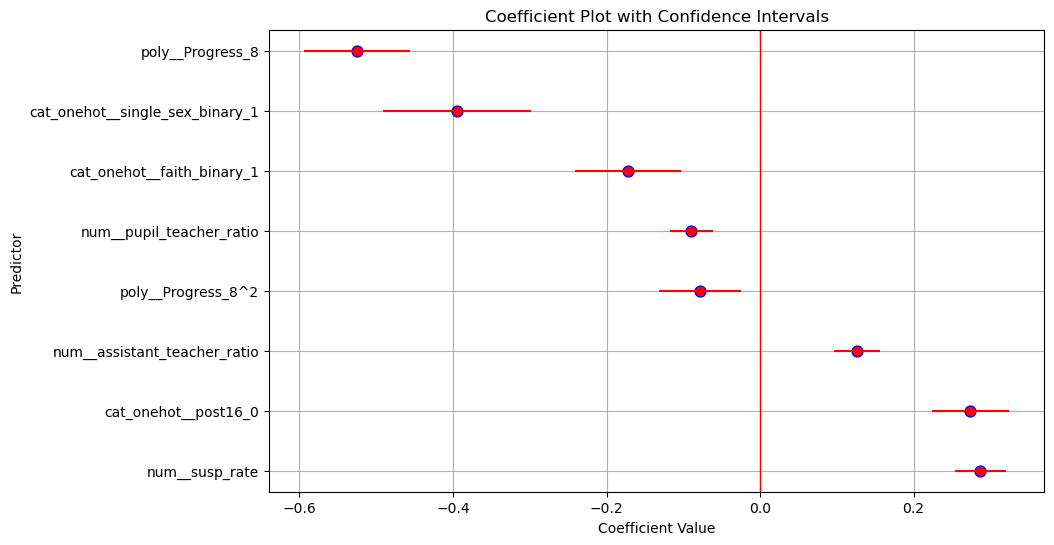

In [228]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

#coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

In [229]:
coef_df

Predictor  Coefficient  Lower CI  Upper CI
4                 poly__Progress_8    -0.524454 -0.593549 -0.455359
7  cat_onehot__single_sex_binary_1    -0.394848 -0.491028 -0.298669
6       cat_onehot__faith_binary_1    -0.172300 -0.241452 -0.103149
1         num__pupil_teacher_ratio    -0.089744 -0.117702 -0.061787
5               poly__Progress_8^2    -0.078511 -0.131594 -0.025428
0     num__assistant_teacher_ratio     0.126142  0.095911  0.156372
3             cat_onehot__post16_0     0.273833  0.223472  0.324194
2                   num__susp_rate     0.287086  0.253699  0.320473

### Add in control variables

#### individual controls

In [ ]:
controls.info()

In [ ]:
control_results = {}

for c in controls:
    x = data_transformed[c]
    y = data_transformed['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    control_results[c] = model.summary()
    

In [ ]:
control_results

#### all predictors and all controls

In [ ]:
x = predictors_controls

In [ ]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

In [ ]:
controls.info()

#### forward selection controls

In [231]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM'
]]

In [232]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.556
Model:                                   OLS   Adj. R-squared (uncentered):              0.554
Method:                        Least Squares   F-statistic:                              394.1
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:00:08   Log-Likelihood:                         -2881.5
No. Observations:                       2844   AIC:                                      5781.
Df Residuals:                           2835   BIC:                                      5835.
Df Model:                                  9                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0550      0.014      3.964      0.000       0.028       0.082
num__pupil_teacher_ratio            0.0135      0.013      1.029      0.303      -0.012       0.039
num__susp_rate                      0.1269      0.016      7.881      0.000       0.095       0.158
cat_onehot__post16_0                0.2388      0.023     10.495      0.000       0.194       0.283
poly__Progress_8                   -0.3694      0.032    -11.669      0.000      -0.431      -0.307
poly__Progress_8^2                 -0.0624      0.024     -2.607      0.009      -0.109      -0.015
cat_onehot__faith_binary_1         -0.1548      0.031     -4.962      0.000      -0.216      -0.094
cat_onehot__single_sex_binary_1    -0.3924      0.043     -9.045      0.000      -0.477      -0.307
num__FSM                            0.4433      0.016     28.113      0.000       0.412       0.474
==============================================================================
Omnibus:                       10.166   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.660
Skew:                          -0.079   Prob(JB):                      0.00294
Kurtosis:                       3.271   Cond. No.                         4.91
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    #'num__pupil_teacher_ratio',
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM'
]]

In [234]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.556
Model:                                   OLS   Adj. R-squared (uncentered):              0.554
Method:                        Least Squares   F-statistic:                              443.3
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:00:44   Log-Likelihood:                         -2882.0
No. Observations:                       2844   AIC:                                      5780.
Df Residuals:                           2836   BIC:                                      5828.
Df Model:                                  8                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0566      0.014      4.107      0.000       0.030       0.084
num__susp_rate                      0.1283      0.016      8.001      0.000       0.097       0.160
cat_onehot__post16_0                0.2388      0.023     10.496      0.000       0.194       0.283
poly__Progress_8                   -0.3688      0.032    -11.653      0.000      -0.431      -0.307
poly__Progress_8^2                 -0.0634      0.024     -2.647      0.008      -0.110      -0.016
cat_onehot__faith_binary_1         -0.1561      0.031     -5.007      0.000      -0.217      -0.095
cat_onehot__single_sex_binary_1    -0.3926      0.043     -9.049      0.000      -0.478      -0.308
num__FSM                            0.4387      0.015     28.981      0.000       0.409       0.468
==============================================================================
Omnibus:                       10.502   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.071
Skew:                          -0.081   Prob(JB):                      0.00239
Kurtosis:                       3.275   Cond. No.                         4.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence'
]]

In [236]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.562
Model:                                   OLS   Adj. R-squared (uncentered):              0.560
Method:                        Least Squares   F-statistic:                              403.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:01:08   Log-Likelihood:                         -2863.0
No. Observations:                       2844   AIC:                                      5744.
Df Residuals:                           2835   BIC:                                      5797.
Df Model:                                  9                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0526      0.014      3.834      0.000       0.026       0.079
num__susp_rate                      0.0925      0.017      5.453      0.000       0.059       0.126
cat_onehot__post16_0                0.2351      0.023     10.396      0.000       0.191       0.279
poly__Progress_8                   -0.2716      0.035     -7.729      0.000      -0.341      -0.203
poly__Progress_8^2                 -0.0551      0.024     -2.313      0.021      -0.102      -0.008
cat_onehot__faith_binary_1         -0.1332      0.031     -4.270      0.000      -0.194      -0.072
cat_onehot__single_sex_binary_1    -0.3813      0.043     -8.839      0.000      -0.466      -0.297
num__FSM                            0.4311      0.015     28.569      0.000       0.402       0.461
num__total_absence                  0.1122      0.018      6.191      0.000       0.077       0.148
==============================================================================
Omnibus:                        8.460   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.688
Skew:                          -0.064   Prob(JB):                      0.00788
Kurtosis:                       3.256   Cond. No.                         5.53
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
model.aic

5941.113179732021

In [237]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support'
]]

In [238]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.564
Model:                                   OLS   Adj. R-squared (uncentered):              0.563
Method:                        Least Squares   F-statistic:                              366.7
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:01:28   Log-Likelihood:                         -2854.7
No. Observations:                       2844   AIC:                                      5729.
Df Residuals:                           2834   BIC:                                      5789.
Df Model:                                 10                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0456      0.014      3.314      0.001       0.019       0.073
num__susp_rate                      0.0916      0.017      5.416      0.000       0.058       0.125
cat_onehot__post16_0                0.2274      0.023     10.050      0.000       0.183       0.272
poly__Progress_8                   -0.2601      0.035     -7.399      0.000      -0.329      -0.191
poly__Progress_8^2                 -0.0573      0.024     -2.412      0.016      -0.104      -0.011
cat_onehot__faith_binary_1         -0.1312      0.031     -4.217      0.000      -0.192      -0.070
cat_onehot__single_sex_binary_1    -0.3690      0.043     -8.555      0.000      -0.454      -0.284
num__FSM                            0.4122      0.016     26.161      0.000       0.381       0.443
num__total_absence                  0.1025      0.018      5.624      0.000       0.067       0.138
num__sen_support                    0.0612      0.015      4.054      0.000       0.032       0.091
==============================================================================
Omnibus:                       10.776   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.457
Skew:                          -0.081   Prob(JB):                      0.00197
Kurtosis:                       3.281   Cond. No.                         5.99
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
model.aic

5909.422772678795

In [239]:
x = data_transformed[[
   'num__assistant_teacher_ratio', 
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2'
]]

In [240]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.578
Model:                                   OLS   Adj. R-squared (uncentered):              0.576
Method:                        Least Squares   F-statistic:                              323.4
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:01:39   Log-Likelihood:                         -2808.2
No. Observations:                       2844   AIC:                                      5640.
Df Residuals:                           2832   BIC:                                      5712.
Df Model:                                 12                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__assistant_teacher_ratio        0.0186      0.014      1.345      0.179      -0.009       0.046
num__susp_rate                      0.0706      0.017      4.207      0.000       0.038       0.104
cat_onehot__post16_0                0.2369      0.027      8.753      0.000       0.184       0.290
poly__Progress_8                   -0.2848      0.035     -8.193      0.000      -0.353      -0.217
poly__Progress_8^2                 -0.0472      0.024     -1.945      0.052      -0.095       0.000
cat_onehot__faith_binary_1         -0.1328      0.032     -4.104      0.000      -0.196      -0.069
cat_onehot__single_sex_binary_1    -0.2490      0.045     -5.529      0.000      -0.337      -0.161
num__FSM                            0.3286      0.018     18.529      0.000       0.294       0.363
num__total_absence                  0.0786      0.018      4.309      0.000       0.043       0.114
num__sen_support                    0.0324      0.015      2.135      0.033       0.003       0.062
poly__KS2_history                   0.0618      0.006      9.623      0.000       0.049       0.074
poly__KS2_history^2                -0.0006   6.19e-05     -9.654      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.266
Skew:                          -0.126   Prob(JB):                     0.000108
Kurtosis:                       3.300   Cond. No.                     4.08e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [241]:
x = data_transformed[[
   #'num__assistant_teacher_ratio', 
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    #'poly__Progress_8^2',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2'
]]

In [242]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.577
Model:                                   OLS   Adj. R-squared (uncentered):              0.576
Method:                        Least Squares   F-statistic:                              387.0
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:02:15   Log-Likelihood:                         -2811.0
No. Observations:                       2844   AIC:                                      5642.
Df Residuals:                           2834   BIC:                                      5702.
Df Model:                                 10                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0711      0.017      4.241      0.000       0.038       0.104
cat_onehot__post16_0                0.2434      0.027      9.133      0.000       0.191       0.296
poly__Progress_8                   -0.2712      0.034     -8.016      0.000      -0.338      -0.205
cat_onehot__faith_binary_1         -0.1343      0.032     -4.148      0.000      -0.198      -0.071
cat_onehot__single_sex_binary_1    -0.2682      0.044     -6.051      0.000      -0.355      -0.181
num__FSM                            0.3283      0.018     18.501      0.000       0.294       0.363
num__total_absence                  0.0818      0.018      4.495      0.000       0.046       0.117
num__sen_support                    0.0328      0.015      2.173      0.030       0.003       0.062
poly__KS2_history                   0.0636      0.006     10.092      0.000       0.051       0.076
poly__KS2_history^2                -0.0006   6.07e-05    -10.145      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       19.229   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.209
Skew:                          -0.137   Prob(JB):                     1.50e-05
Kurtosis:                       3.335   Cond. No.                     3.98e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__perc_boys'
]]

In [244]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.578
Model:                                   OLS   Adj. R-squared (uncentered):              0.576
Method:                        Least Squares   F-statistic:                              352.1
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:02:56   Log-Likelihood:                         -2810.1
No. Observations:                       2844   AIC:                                      5642.
Df Residuals:                           2833   BIC:                                      5708.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0678      0.017      4.003      0.000       0.035       0.101
cat_onehot__post16_0                0.2445      0.027      9.172      0.000       0.192       0.297
poly__Progress_8                   -0.2637      0.034     -7.699      0.000      -0.331      -0.197
cat_onehot__faith_binary_1         -0.1333      0.032     -4.118      0.000      -0.197      -0.070
cat_onehot__single_sex_binary_1    -0.2645      0.044     -5.958      0.000      -0.352      -0.177
num__FSM                            0.3299      0.018     18.556      0.000       0.295       0.365
num__total_absence                  0.0877      0.019      4.696      0.000       0.051       0.124
num__sen_support                    0.0308      0.015      2.034      0.042       0.001       0.061
poly__KS2_history                   0.0638      0.006     10.114      0.000       0.051       0.076
poly__KS2_history^2                -0.0006   6.07e-05    -10.169      0.000      -0.001      -0.000
num__perc_boys                      0.0178      0.013      1.401      0.161      -0.007       0.043
==============================================================================
Omnibus:                       18.927   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.955
Skew:                          -0.134   Prob(JB):                     1.71e-05
Kurtosis:                       3.337   Cond. No.                     3.98e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
model.aic

5819.320968853215

In [245]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'num__total_absence',
    'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    #'num__perc_boys',
    'num__White_British'
]]

In [246]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.588
Model:                                   OLS   Adj. R-squared (uncentered):              0.586
Method:                        Least Squares   F-statistic:                              367.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:03:27   Log-Likelihood:                         -2774.6
No. Observations:                       2844   AIC:                                      5571.
Df Residuals:                           2833   BIC:                                      5637.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0608      0.017      3.661      0.000       0.028       0.093
cat_onehot__post16_0                0.2052      0.027      7.687      0.000       0.153       0.258
poly__Progress_8                   -0.2062      0.034     -6.017      0.000      -0.273      -0.139
cat_onehot__faith_binary_1         -0.1161      0.032     -3.624      0.000      -0.179      -0.053
cat_onehot__single_sex_binary_1    -0.2103      0.044     -4.748      0.000      -0.297      -0.123
num__FSM                            0.4237      0.021     20.417      0.000       0.383       0.464
num__total_absence                  0.0299      0.019      1.579      0.114      -0.007       0.067
num__sen_support                    0.0206      0.015      1.373      0.170      -0.009       0.050
poly__KS2_history                   0.0613      0.006      9.835      0.000       0.049       0.074
poly__KS2_history^2                -0.0006      6e-05     -9.882      0.000      -0.001      -0.000
num__White_British                  0.1425      0.017      8.580      0.000       0.110       0.175
==============================================================================
Omnibus:                       20.184   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.949
Skew:                          -0.133   Prob(JB):                     6.30e-06
Kurtosis:                       3.362   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
model.aic

5816.5488015509745

In [247]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    #'num__total_absence',
    #'num__sen_support',
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British'
]]

In [248]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.587
Model:                                   OLS   Adj. R-squared (uncentered):              0.586
Method:                        Least Squares   F-statistic:                              448.3
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:04:17   Log-Likelihood:                         -2776.9
No. Observations:                       2844   AIC:                                      5572.
Df Residuals:                           2835   BIC:                                      5625.
Df Model:                                  9                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0679      0.016      4.256      0.000       0.037       0.099
cat_onehot__post16_0                0.2041      0.026      7.714      0.000       0.152       0.256
poly__Progress_8                   -0.2293      0.032     -7.130      0.000      -0.292      -0.166
cat_onehot__faith_binary_1         -0.1225      0.032     -3.853      0.000      -0.185      -0.060
cat_onehot__single_sex_binary_1    -0.2084      0.044     -4.705      0.000      -0.295      -0.122
num__FSM                            0.4344      0.020     21.565      0.000       0.395       0.474
poly__KS2_history                   0.0646      0.006     10.703      0.000       0.053       0.076
poly__KS2_history^2                -0.0006   5.81e-05    -10.748      0.000      -0.001      -0.001
num__White_British                  0.1538      0.016      9.835      0.000       0.123       0.184
==============================================================================
Omnibus:                       19.443   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.974
Skew:                          -0.130   Prob(JB):                     1.03e-05
Kurtosis:                       3.355   Cond. No.                     3.99e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
model.aic

5571.823973949564

In [250]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0'
]]

In [251]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.588
Model:                                   OLS   Adj. R-squared (uncentered):              0.587
Method:                        Least Squares   F-statistic:                              405.2
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:04:50   Log-Likelihood:                         -2773.0
No. Observations:                       2844   AIC:                                      5566.
Df Residuals:                           2834   BIC:                                      5626.
Df Model:                                 10                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0675      0.016      4.237      0.000       0.036       0.099
cat_onehot__post16_0                0.2094      0.026      7.901      0.000       0.157       0.261
poly__Progress_8                   -0.2272      0.032     -7.072      0.000      -0.290      -0.164
cat_onehot__faith_binary_1         -0.1294      0.032     -4.060      0.000      -0.192      -0.067
cat_onehot__single_sex_binary_1    -0.2164      0.044     -4.881      0.000      -0.303      -0.129
num__FSM                            0.4250      0.020     20.841      0.000       0.385       0.465
poly__KS2_history                   0.0666      0.006     10.975      0.000       0.055       0.079
poly__KS2_history^2                -0.0006   5.84e-05    -11.006      0.000      -0.001      -0.001
num__White_British                  0.1622      0.016     10.199      0.000       0.131       0.193
cat_onehot__urban_binary_0         -0.1045      0.037     -2.795      0.005      -0.178      -0.031
==============================================================================
Omnibus:                       17.107   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.613
Skew:                          -0.110   Prob(JB):                     3.34e-05
Kurtosis:                       3.355   Cond. No.                     4.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [252]:
model.aic

5565.997766435869

In [253]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'poly__Attainment_8',
    'poly__Attainment_8^2'
]]

In [254]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.592
Model:                                   OLS   Adj. R-squared (uncentered):              0.590
Method:                        Least Squares   F-statistic:                              342.7
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:05:14   Log-Likelihood:                         -2759.9
No. Observations:                       2844   AIC:                                      5544.
Df Residuals:                           2832   BIC:                                      5615.
Df Model:                                 12                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0659      0.016      4.148      0.000       0.035       0.097
cat_onehot__post16_0                0.2060      0.026      7.806      0.000       0.154       0.258
poly__Progress_8                   -0.7136      0.205     -3.485      0.000      -1.115      -0.312
cat_onehot__faith_binary_1         -0.1185      0.032     -3.726      0.000      -0.181      -0.056
cat_onehot__single_sex_binary_1    -0.2494      0.045     -5.559      0.000      -0.337      -0.161
num__FSM                            0.4189      0.020     20.579      0.000       0.379       0.459
poly__KS2_history                   0.1485      0.020      7.270      0.000       0.108       0.189
poly__KS2_history^2                -0.0016      0.000     -5.646      0.000      -0.002      -0.001
num__White_British                  0.1703      0.016     10.606      0.000       0.139       0.202
cat_onehot__urban_binary_0         -0.1050      0.037     -2.818      0.005      -0.178      -0.032
poly__Attainment_8                  0.0136      0.025      0.550      0.583      -0.035       0.062
poly__Attainment_8^2                0.0004      0.000      3.639      0.000       0.000       0.001
==============================================================================
Omnibus:                       21.178   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.988
Skew:                          -0.127   Prob(JB):                     2.27e-06
Kurtosis:                       3.394   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [255]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0'
    #'poly__Attainment_8',
    #'poly__Attainment_8^2'
]]

In [256]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.588
Model:                                   OLS   Adj. R-squared (uncentered):              0.587
Method:                        Least Squares   F-statistic:                              405.2
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:05:56   Log-Likelihood:                         -2773.0
No. Observations:                       2844   AIC:                                      5566.
Df Residuals:                           2834   BIC:                                      5626.
Df Model:                                 10                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0675      0.016      4.237      0.000       0.036       0.099
cat_onehot__post16_0                0.2094      0.026      7.901      0.000       0.157       0.261
poly__Progress_8                   -0.2272      0.032     -7.072      0.000      -0.290      -0.164
cat_onehot__faith_binary_1         -0.1294      0.032     -4.060      0.000      -0.192      -0.067
cat_onehot__single_sex_binary_1    -0.2164      0.044     -4.881      0.000      -0.303      -0.129
num__FSM                            0.4250      0.020     20.841      0.000       0.385       0.465
poly__KS2_history                   0.0666      0.006     10.975      0.000       0.055       0.079
poly__KS2_history^2                -0.0006   5.84e-05    -11.006      0.000      -0.001      -0.001
num__White_British                  0.1622      0.016     10.199      0.000       0.131       0.193
cat_onehot__urban_binary_0         -0.1045      0.037     -2.795      0.005      -0.178      -0.031
==============================================================================
Omnibus:                       17.107   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.613
Skew:                          -0.110   Prob(JB):                     3.34e-05
Kurtosis:                       3.355   Cond. No.                     4.01e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
model.aic

5565.997766435869

In [258]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2844 non-null   float64
 1   cat_onehot__post16_1             2844 non-null   float64
 2   cat_onehot__faith_binary_0       2844 non-null   float64
 3   cat_onehot__faith_binary_1       2844 non-null   float64
 4   cat_onehot__single_sex_binary_0  2844 non-null   float64
 5   cat_onehot__single_sex_binary_1  2844 non-null   float64
 6   cat_onehot__urban_binary_0       2844 non-null   float64
 7   cat_onehot__urban_binary_1       2844 non-null   float64
 8   cat_onehot__selective_0          2844 non-null   float64
 9   cat_onehot__selective_1          2844 non-null   float64
 10  poly__KS2_history                2844 non-null   float64
 11  poly__Attainment_8               2844 non-null   float64
 12  poly__Progress_8    

In [259]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'cat_onehot__selective_1'
]]

In [260]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.589
Model:                                   OLS   Adj. R-squared (uncentered):              0.587
Method:                        Least Squares   F-statistic:                              368.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:06:46   Log-Likelihood:                         -2772.3
No. Observations:                       2844   AIC:                                      5567.
Df Residuals:                           2833   BIC:                                      5632.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0676      0.016      4.238      0.000       0.036       0.099
cat_onehot__post16_0                0.2095      0.026      7.905      0.000       0.157       0.261
poly__Progress_8                   -0.2257      0.032     -7.017      0.000      -0.289      -0.163
cat_onehot__faith_binary_1         -0.1238      0.032     -3.844      0.000      -0.187      -0.061
cat_onehot__single_sex_binary_1    -0.2278      0.045     -5.019      0.000      -0.317      -0.139
num__FSM                            0.4224      0.021     20.591      0.000       0.382       0.463
poly__KS2_history                   0.0720      0.008      9.482      0.000       0.057       0.087
poly__KS2_history^2                -0.0007   7.33e-05     -9.481      0.000      -0.001      -0.001
num__White_British                  0.1625      0.016     10.217      0.000       0.131       0.194
cat_onehot__urban_binary_0         -0.1033      0.037     -2.761      0.006      -0.177      -0.030
cat_onehot__selective_1             0.0984      0.084      1.175      0.240      -0.066       0.263
==============================================================================
Omnibus:                       17.234   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.699
Skew:                          -0.112   Prob(JB):                     3.20e-05
Kurtosis:                       3.353   Cond. No.                     7.60e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [261]:
model.aic

5566.61284674803

In [273]:
x = data_transformed[[
    
    
    'num__susp_rate',
    'cat_onehot__post16_0',
   
    'poly__Progress_8',
    
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    
    
    'poly__KS2_history',
    'poly__KS2_history^2',
    
    'num__White_British',
    'cat_onehot__urban_binary_0',
    #'cat_onehot__selective_1',
    'cat_ordinal__IMD'
]]

In [274]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.589
Model:                                   OLS   Adj. R-squared (uncentered):              0.588
Method:                        Least Squares   F-statistic:                              369.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:09:13   Log-Likelihood:                         -2770.1
No. Observations:                       2844   AIC:                                      5562.
Df Residuals:                           2833   BIC:                                      5628.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0681      0.016      4.277      0.000       0.037       0.099
cat_onehot__post16_0                0.2062      0.027      7.778      0.000       0.154       0.258
poly__Progress_8                   -0.2252      0.032     -7.012      0.000      -0.288      -0.162
cat_onehot__faith_binary_1         -0.1390      0.032     -4.331      0.000      -0.202      -0.076
cat_onehot__single_sex_binary_1    -0.2258      0.044     -5.079      0.000      -0.313      -0.139
num__FSM                            0.4021      0.022     17.882      0.000       0.358       0.446
poly__KS2_history                   0.0691      0.006     11.231      0.000       0.057       0.081
poly__KS2_history^2                -0.0007   5.88e-05    -11.230      0.000      -0.001      -0.001
num__White_British                  0.1649      0.016     10.349      0.000       0.134       0.196
cat_onehot__urban_binary_0         -0.1033      0.037     -2.765      0.006      -0.177      -0.030
cat_ordinal__IMD                   -0.0129      0.005     -2.407      0.016      -0.023      -0.002
==============================================================================
Omnibus:                       18.952   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.985
Skew:                          -0.118   Prob(JB):                     1.02e-05
Kurtosis:                       3.371   Cond. No.                     4.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [275]:
model.aic

5562.185737999705

In [276]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [277]:
vif_values

predictor          VIF
3        cat_onehot__faith_binary_1     1.290711
9        cat_onehot__urban_binary_0     1.374948
4   cat_onehot__single_sex_binary_1     1.524967
2                  poly__Progress_8     1.708187
0                    num__susp_rate     1.750167
8                num__White_British     1.750713
1              cat_onehot__post16_0     1.796264
5                          num__FSM     3.488397
10                 cat_ordinal__IMD     5.855187
7               poly__KS2_history^2  2783.369503
6                 poly__KS2_history  2813.852554

In [278]:
x

num__susp_rate  cat_onehot__post16_0  poly__Progress_8  \
0           1.540345                   0.0             -0.90   
1           0.382384                   1.0              0.33   
2           1.617766                   1.0              0.16   
3           0.210470                   0.0             -0.27   
4           0.193266                   0.0             -0.18   
...              ...                   ...               ...   
2839       -0.443996                   0.0             -0.01   
2840       -1.356827                   0.0              0.56   
2841       -0.032000                   1.0              0.19   
2842        0.434639                   0.0              0.38   
2843        0.906688                   1.0              0.69   

      cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_1  num__FSM  \
0                            0.0                              0.0  0.618541   
1                            0.0                              0.0 -0.707733   
2                            0.0                              0.0  1.514732   
3                            0.0                              0.0 -0.460754   
4                            1.0                              0.0 -0.001757   
...                          ...                              ...       ...   
2839                         1.0                              0.0  1.236530   
2840                         1.0                              1.0 -0.664851   
2841                         1.0                              0.0  0.522197   
2842                         0.0                              0.0  1.709479   
2843                         1.0                              0.0  1.281579   

      poly__KS2_history  poly__KS2_history^2  num__White_British  \
0                 102.1             10424.41            1.078486   
1                 103.0             10609.00            0.894102   
2                 101.0             10201.00            0.949530   
3                 104.6             10941.16            0.966641   
4                 102.9             10588.41           -0.208774   
...                 ...                  ...                 ...   
2839              105.7             11172.49           -1.773108   
2840              108.1             11685.61           -1.221691   
2841              104.7             10962.09           -1.738625   
2842              105.6             11151.36           -1.718593   
2843              105.5             11130.25           -1.541347   

      cat_onehot__urban_binary_0  cat_ordinal__IMD  
0                            1.0               6.0  
1                            0.0               3.0  
2                            0.0               4.0  
3                            0.0               4.0  
4                            0.0               8.0  
...                          ...               ...  
2839                         0.0               3.0  
2840                         0.0               4.0  
2841                         0.0               5.0  
2842                         0.0               0.0  
2843                         0.0               0.0  

[2844 rows x 11 columns]

In [279]:
x = x.drop(columns=['poly__KS2_history^2'])

vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [280]:
vif_values

predictor       VIF
3       cat_onehot__faith_binary_1  1.287378
8       cat_onehot__urban_binary_0  1.358367
4  cat_onehot__single_sex_binary_1  1.422353
0                   num__susp_rate  1.704429
2                 poly__Progress_8  1.707724
7               num__White_British  1.737076
1             cat_onehot__post16_0  1.790866
5                         num__FSM  2.476911
9                 cat_ordinal__IMD  5.763665
6                poly__KS2_history  7.039220

## Final Model

In [281]:
x = data_transformed[[
    'num__susp_rate',
    'cat_onehot__post16_0',
    'poly__Progress_8',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    # controls
    'num__FSM',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__White_British',
    'cat_onehot__urban_binary_0',
    'cat_ordinal__IMD'
]]

In [282]:
y = data_transformed['Not_Sustained_transformed']

In [283]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared (uncentered):                   0.589
Model:                                   OLS   Adj. R-squared (uncentered):              0.588
Method:                        Least Squares   F-statistic:                              369.5
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):                        0.00
Time:                               14:10:07   Log-Likelihood:                         -2770.1
No. Observations:                       2844   AIC:                                      5562.
Df Residuals:                           2833   BIC:                                      5628.
Df Model:                                 11                                                  
Covariance Type:                   nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
num__susp_rate                      0.0681      0.016      4.277      0.000       0.037       0.099
cat_onehot__post16_0                0.2062      0.027      7.778      0.000       0.154       0.258
poly__Progress_8                   -0.2252      0.032     -7.012      0.000      -0.288      -0.162
cat_onehot__faith_binary_1         -0.1390      0.032     -4.331      0.000      -0.202      -0.076
cat_onehot__single_sex_binary_1    -0.2258      0.044     -5.079      0.000      -0.313      -0.139
num__FSM                            0.4021      0.022     17.882      0.000       0.358       0.446
poly__KS2_history                   0.0691      0.006     11.231      0.000       0.057       0.081
poly__KS2_history^2                -0.0007   5.88e-05    -11.230      0.000      -0.001      -0.001
num__White_British                  0.1649      0.016     10.349      0.000       0.134       0.196
cat_onehot__urban_binary_0         -0.1033      0.037     -2.765      0.006      -0.177      -0.030
cat_ordinal__IMD                   -0.0129      0.005     -2.407      0.016      -0.023      -0.002
==============================================================================
Omnibus:                       18.952   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.985
Skew:                          -0.118   Prob(JB):                     1.02e-05
Kurtosis:                       3.371   Cond. No.                     4.02e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [284]:
model.aic

5562.185737999705

### VIF scores and corr matrix

In [285]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')

In [286]:
vif_values

predictor          VIF
3        cat_onehot__faith_binary_1     1.290711
9        cat_onehot__urban_binary_0     1.374948
4   cat_onehot__single_sex_binary_1     1.524967
2                  poly__Progress_8     1.708187
0                    num__susp_rate     1.750167
8                num__White_British     1.750713
1              cat_onehot__post16_0     1.796264
5                          num__FSM     3.488397
10                 cat_ordinal__IMD     5.855187
7               poly__KS2_history^2  2783.369503
6                 poly__KS2_history  2813.852554

In [287]:
x.describe()

num__susp_rate  cat_onehot__post16_0  poly__Progress_8  \
count    2.844000e+03           2844.000000       2844.000000   
mean    -2.835675e-16              0.370605         -0.002057   
std      1.000176e+00              0.483052          0.490100   
min     -2.619763e+00              0.000000         -4.090000   
25%     -6.208276e-01              0.000000         -0.310000   
50%     -5.528832e-03              0.000000         -0.010000   
75%      6.464778e-01              1.000000          0.330000   
max      3.664686e+00              1.000000          2.270000   

       cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_1  \
count                 2844.000000                      2844.000000   
mean                     0.181786                         0.111814   
std                      0.385736                         0.315193   
min                      0.000000                         0.000000   
25%                      0.000000                         0.000000   
50%                      0.000000                         0.000000   
75%                      0.000000                         0.000000   
max                      1.000000                         1.000000   

           num__FSM  poly__KS2_history  poly__KS2_history^2  \
count  2.844000e+03        2844.000000          2844.000000   
mean  -1.898778e-16         103.779993         10778.872303   
std    1.000176e+00           2.930594           620.143934   
min   -2.994931e+00          93.100000          8667.610000   
25%   -7.185715e-01         102.000000         10404.000000   
50%   -1.756892e-03         103.500000         10712.250000   
75%    7.121176e-01         105.000000         11025.000000   
max    2.870313e+00         117.400000         13782.760000   

       num__White_British  cat_onehot__urban_binary_0  cat_ordinal__IMD  
count        2.844000e+03                 2844.000000       2844.000000  
mean         3.797556e-16                    0.142757          4.651195  
std          1.000176e+00                    0.349886          2.821454  
min         -1.957128e+00                    0.000000          0.000000  
25%         -7.768968e-01                    0.000000          2.000000  
50%          3.595531e-01                    0.000000          5.000000  
75%          8.400095e-01                    0.000000          7.000000  
max          1.287783e+00                    1.000000          9.000000

In [288]:
vars = x.columns.tolist()
vars

['num__susp_rate',
 'cat_onehot__post16_0',
 'poly__Progress_8',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'num__FSM',
 'poly__KS2_history',
 'poly__KS2_history^2',
 'num__White_British',
 'cat_onehot__urban_binary_0',
 'cat_ordinal__IMD']

In [289]:
vars_for_corr = data_transformed[['num__susp_rate',
 'cat_onehot__post16_0',
 'poly__Progress_8',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'num__FSM',
 'poly__KS2_history',
 'poly__KS2_history^2',
 'num__White_British',
 'cat_onehot__urban_binary_0',
 'cat_ordinal__IMD']
]


In [290]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

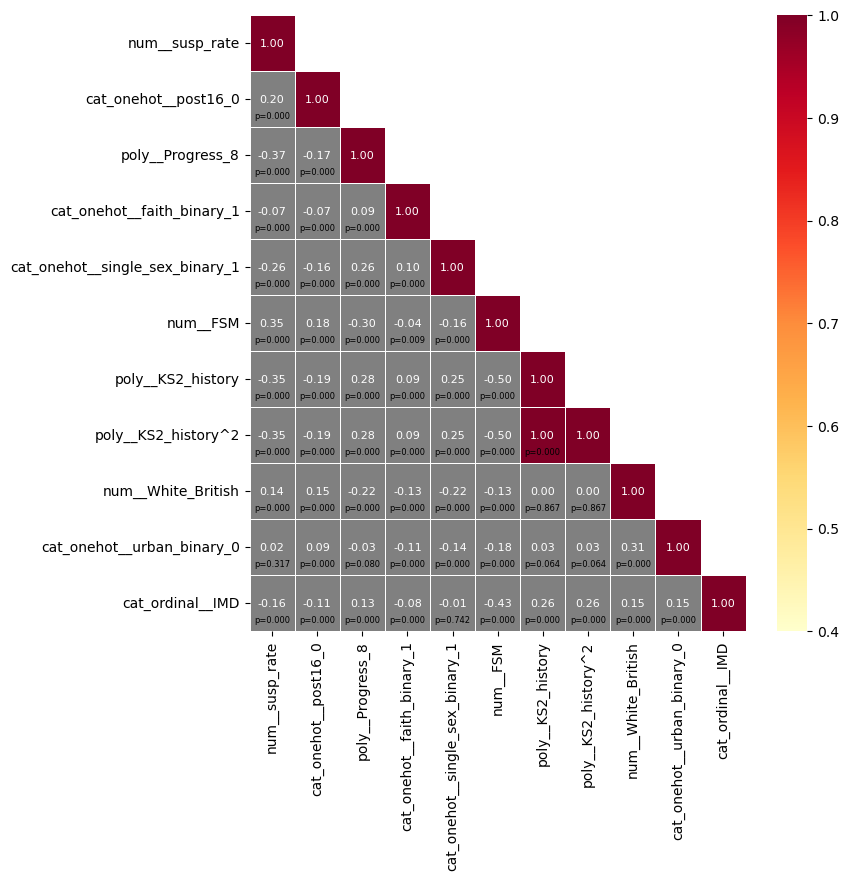

In [291]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


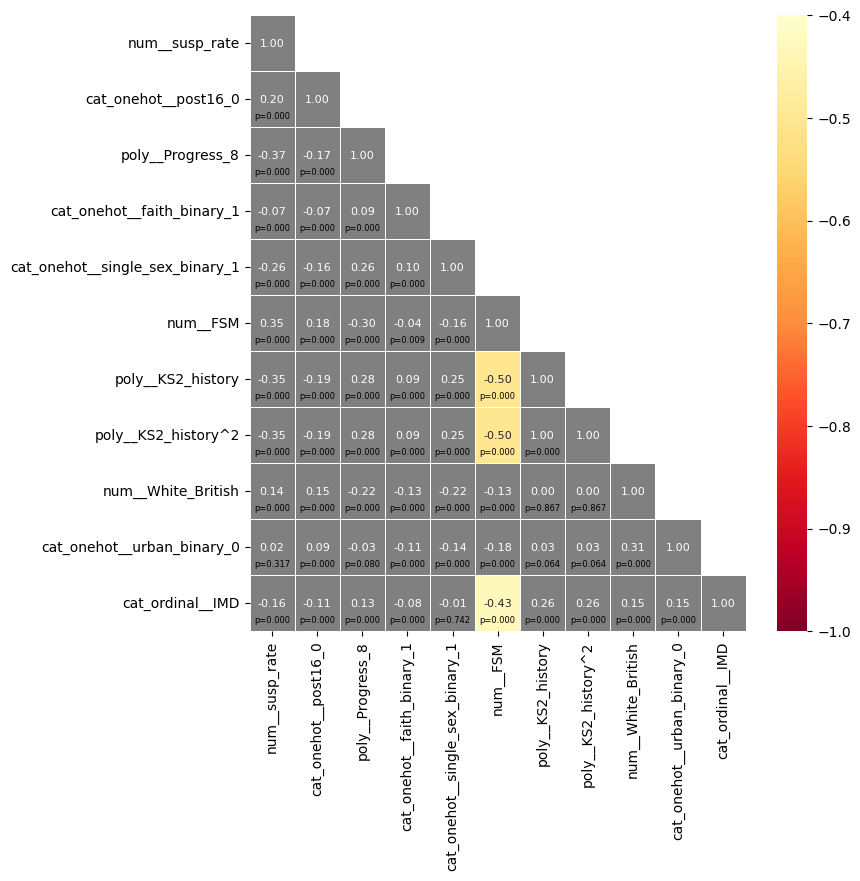

In [292]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

### Visualise

In [293]:
reg_names = {
    'Not_Sustained_transformed': 'Not sustained %', 
    'num__total_absence': 'Absence %', 
    #'persistent_absence': 'Persistent absence %',
    #'perm_excl_rate': 'Permanent exclusion %', 
    'num__susp_rate': 'Suspension %', 
    #'one_plus_susp_rate': 'One-plus suspension %', 
    'num__FSM': 'FSM %',
    'num__White_British': 'White British %', 
    #'EAL': 'EAL %', 
    'num__perc_boys': 'Boys %', 
    'num__sen_support': 'SEN support %', 
    #'ehcp': 'EHCP %', 
    'poly__headcount': 'School headcount',
    #'KS4_headcount': 'KS4 headcount', 
    #'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    #'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    #'Ofsted_num': 'Ofsted rating',
    'poly__KS2_history': 'KS2 score', 
    'poly__KS2_history^2': 'KS2 score ^2', 
    #'Attainment_8': 'A8', 
    'poly__Progress_8': 'P8',
    'cat_onehot__selective_1': 'Selective schools', 
    'cat_onehot__post16_0': 'No Post-16', 
    'cat_ordinal__IMD': 'IMD of LSOA', 
    'cat_onehot__urban_binary_0': 'Rural schools', 
    'cat_onehot__single_sex_binary_1': 'Single sex schools',
    'cat_onehot__faith_binary_1': 'Faith schools'
}

In [294]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cat_onehot__post16_0             2844 non-null   float64
 1   cat_onehot__post16_1             2844 non-null   float64
 2   cat_onehot__faith_binary_0       2844 non-null   float64
 3   cat_onehot__faith_binary_1       2844 non-null   float64
 4   cat_onehot__single_sex_binary_0  2844 non-null   float64
 5   cat_onehot__single_sex_binary_1  2844 non-null   float64
 6   cat_onehot__urban_binary_0       2844 non-null   float64
 7   cat_onehot__urban_binary_1       2844 non-null   float64
 8   cat_onehot__selective_0          2844 non-null   float64
 9   cat_onehot__selective_1          2844 non-null   float64
 10  poly__KS2_history                2844 non-null   float64
 11  poly__Attainment_8               2844 non-null   float64
 12  poly__Progress_8    

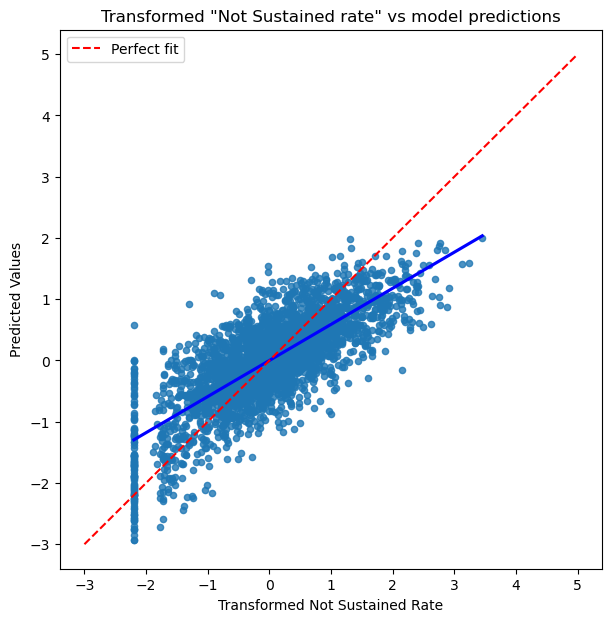

In [295]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['Not_Sustained_transformed'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([-3, 5], 
         [-3, 5], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Transformed "Not Sustained rate" vs model predictions')
plt.xlabel('Transformed Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

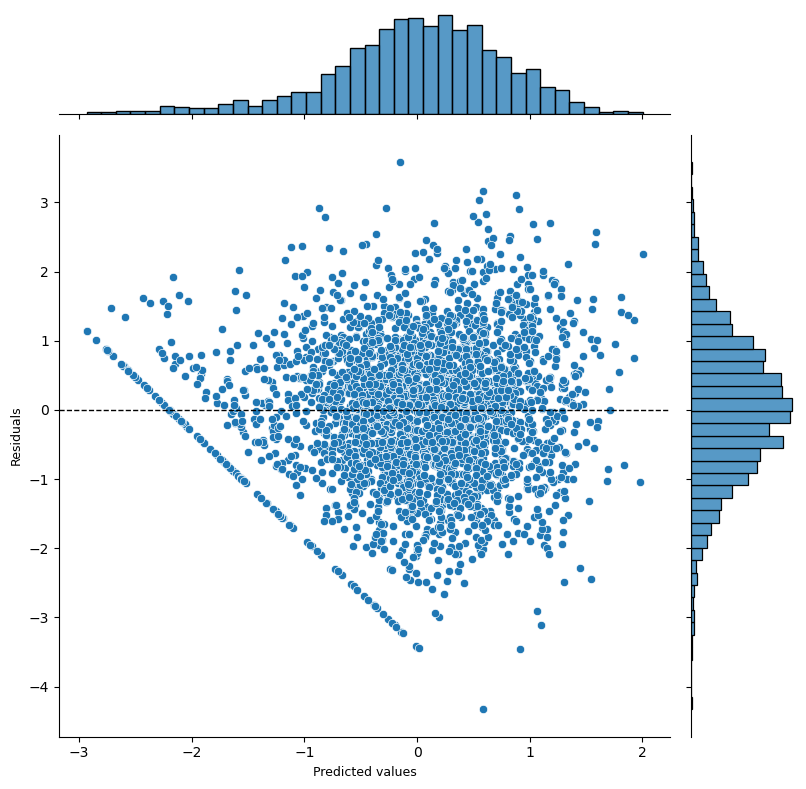

In [296]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

### Partial Residuals Plots

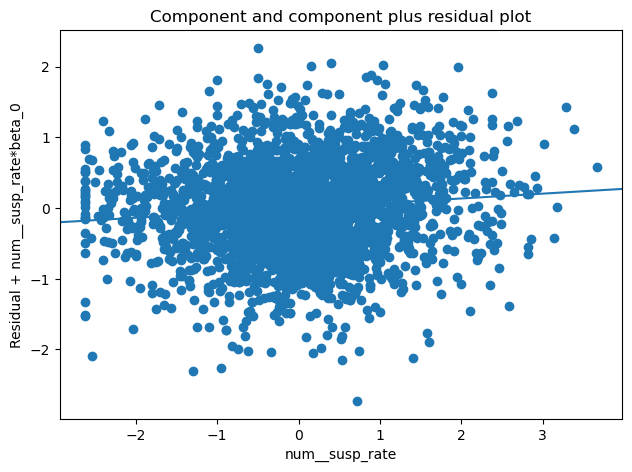

In [298]:
fig = sm.graphics.plot_ccpr(model, 'num__susp_rate')
fig.tight_layout(pad=1.0)

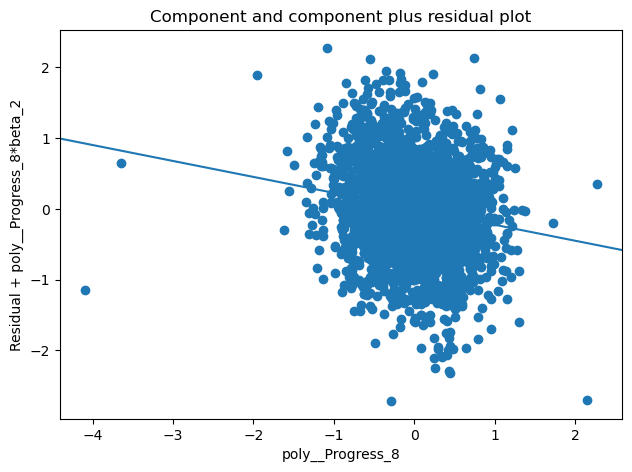

In [299]:
fig = sm.graphics.plot_ccpr(model, 'poly__Progress_8')
fig.tight_layout(pad=1.0)

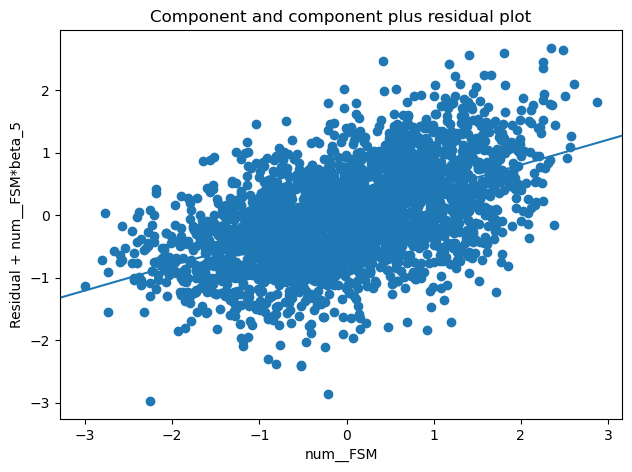

In [300]:
fig = sm.graphics.plot_ccpr(model, 'num__FSM')
fig.tight_layout(pad=1.0)

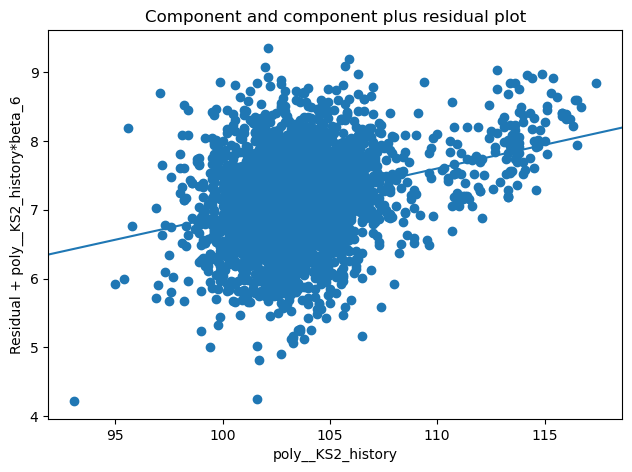

In [302]:
fig = sm.graphics.plot_ccpr(model, 'poly__KS2_history')
fig.tight_layout(pad=1.0)

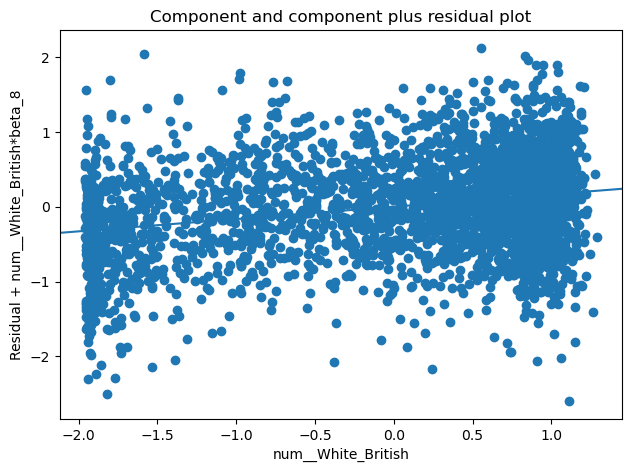

In [303]:
fig = sm.graphics.plot_ccpr(model, 'num__White_British')
fig.tight_layout(pad=1.0)

### Other model diagnostic plots

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


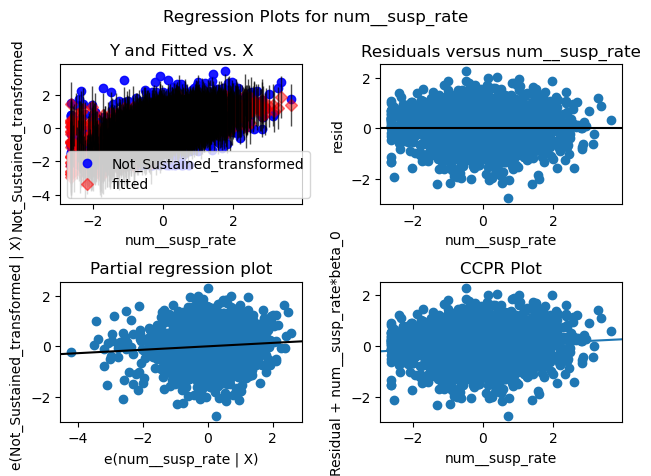

In [304]:
fig = sm.graphics.plot_regress_exog(model, "num__susp_rate")
fig.tight_layout(pad=1.0)

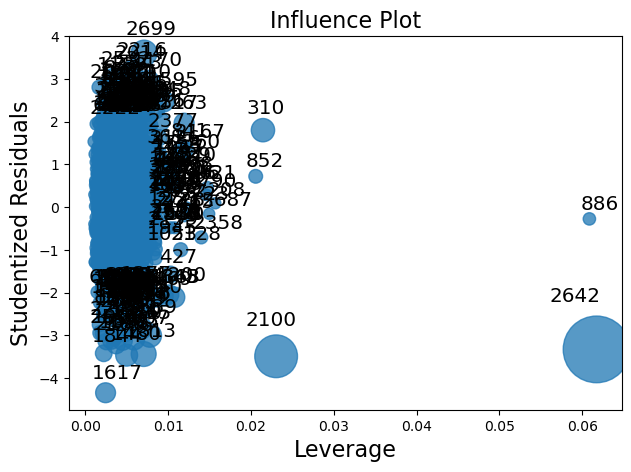

In [305]:
fig = sm.graphics.influence_plot(model)
fig.tight_layout(pad=1.0)

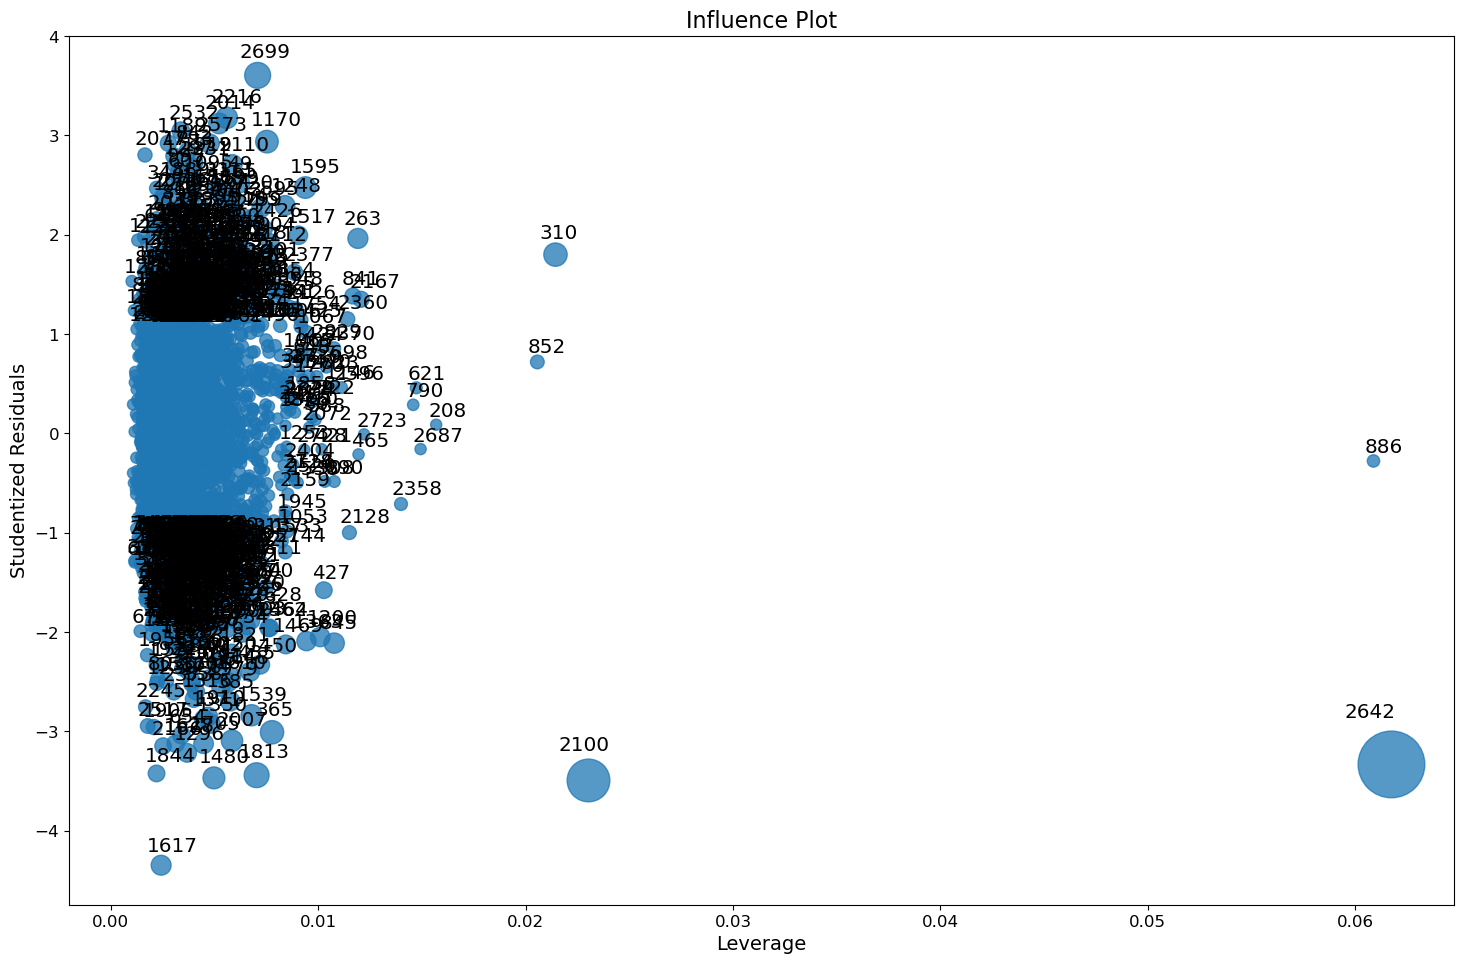

In [306]:
fig, ax = plt.subplots(figsize=(15, 10))  
sm.graphics.influence_plot(
    model, 
    ax=ax, 
    criterion="cooks", 
    #size=8,  
    alpha=0.3, 
    labels=5  
)

# plot labels 
ax.set_title("Influence Plot", fontsize=16)
ax.set_xlabel("Leverage", fontsize=14)
ax.set_ylabel("Studentized Residuals", fontsize=14)
ax.tick_params(axis="both", labelsize=12)

# Adjust layout for better spacing
fig.tight_layout(pad=2.0)

plt.show()

In [307]:
data_transformed.loc[2642]

cat_onehot__post16_0                   0.000000
cat_onehot__post16_1                   1.000000
cat_onehot__faith_binary_0             0.000000
cat_onehot__faith_binary_1             1.000000
cat_onehot__single_sex_binary_0        0.000000
cat_onehot__single_sex_binary_1        1.000000
cat_onehot__urban_binary_0             0.000000
cat_onehot__urban_binary_1             1.000000
cat_onehot__selective_0                1.000000
cat_onehot__selective_1                0.000000
poly__KS2_history                    103.300000
poly__Attainment_8                     9.000000
poly__Progress_8                      -4.090000
poly__headcount                      232.000000
poly__KS2_history^2                10670.890000
poly__KS2_history Attainment_8       929.700000
poly__KS2_history Progress_8        -422.497000
poly__KS2_history headcount        23965.600000
poly__Attainment_8^2                  81.000000
poly__Attainment_8 Progress_8        -36.810000
poly__Attainment_8 headcount        2088

In [308]:
data.loc[data['headcount'] == 232]

URN  not_sustained_rate  total_absence  persistent_absence  \
2921  134195                 0.0            9.8                36.1   

                  urban_rural denomination  FSM  White_British  EAL  \
2921  Urban major conurbation  Other faith  3.0           86.2  5.6   

      perc_boys region_name                school_name  headcount  \
2921      100.0  North West  Manchester Mesivta School      232.0   

      perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
2921             0.0   20.25862            10.34483           35.0   

      KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate  \
2921        103.3           9.0       -4.09          0            0.0   

     POSTCODE  post16 school_sex                    type  \
2921  M25 0PH       1       Boys  Voluntary aided school   

             Ofsted_rating  sen_support      ehcp     LSOA11  IMD  \
2921  Requires improvement    16.810345  6.896552  E01005045  4.0   

      pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
2921                 14.6                      0.2               9.643597   

      single_sex_binary  faith_binary region_new urban_binary Ofsted_num  
2921                  1             1      North            1          2

In [309]:
data.loc[2921]

URN                                           134195
not_sustained_rate                               0.0
total_absence                                    9.8
persistent_absence                              36.1
urban_rural                  Urban major conurbation
denomination                             Other faith
FSM                                              3.0
White_British                                   86.2
EAL                                              5.6
perc_boys                                      100.0
region_name                               North West
school_name                Manchester Mesivta School
headcount                                      232.0
perm_excl_rate                                   0.0
susp_rate                                   20.25862
one_plus_susp_rate                          10.34483
KS4_headcount                                   35.0
KS2_history                                    103.3
Attainment_8                                  

In [310]:
data_transformed.loc[2100]

cat_onehot__post16_0                    1.000000
cat_onehot__post16_1                    0.000000
cat_onehot__faith_binary_0              1.000000
cat_onehot__faith_binary_1              0.000000
cat_onehot__single_sex_binary_0         1.000000
cat_onehot__single_sex_binary_1         0.000000
cat_onehot__urban_binary_0              1.000000
cat_onehot__urban_binary_1              0.000000
cat_onehot__selective_0                 1.000000
cat_onehot__selective_1                 0.000000
poly__KS2_history                      93.100000
poly__Attainment_8                     54.300000
poly__Progress_8                        2.150000
poly__headcount                       333.000000
poly__KS2_history^2                  8667.610000
poly__KS2_history Attainment_8       5055.330000
poly__KS2_history Progress_8          200.165000
poly__KS2_history headcount         31002.300000
poly__Attainment_8^2                 2948.490000
poly__Attainment_8 Progress_8         116.745000
poly__Attainment_8 h

In [311]:
data.loc[data['headcount'] == 333]

URN  not_sustained_rate  total_absence  persistent_absence  \
2315  135672                 0.0            9.5                30.3   

                              urban_rural denomination   FSM  White_British  \
2315  Rural hamlet and isolated dwellings     No faith  15.0           73.9   

      EAL  perc_boys    region_name                   school_name  headcount  \
2315  1.2   49.84985  West Midlands  The Steiner Academy Hereford      333.0   

      perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
2315             0.0     2.4024              2.1021           26.0   

      KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate  \
2315         93.1          54.3        2.15          0           31.0   

     POSTCODE  post16 school_sex                 type Ofsted_rating  \
2315  HR2 8DL       0      Mixed  Academy sponsor led          Good   

      sen_support      ehcp     LSOA11  IMD  pupil_teacher_ratio  \
2315    20.720721  3.603604  E01014099  5.0                 11.5   

      assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
2315                      0.5               9.490636                  0   

      faith_binary region_new urban_binary Ofsted_num  
2315             0   Midlands            0          3

In [312]:
data.loc[2315]

URN                                                     135672
not_sustained_rate                                         0.0
total_absence                                              9.5
persistent_absence                                        30.3
urban_rural                Rural hamlet and isolated dwellings
denomination                                          No faith
FSM                                                       15.0
White_British                                             73.9
EAL                                                        1.2
perc_boys                                             49.84985
region_name                                      West Midlands
school_name                       The Steiner Academy Hereford
headcount                                                333.0
perm_excl_rate                                             0.0
susp_rate                                               2.4024
one_plus_susp_rate                                     

### Coefficient plot

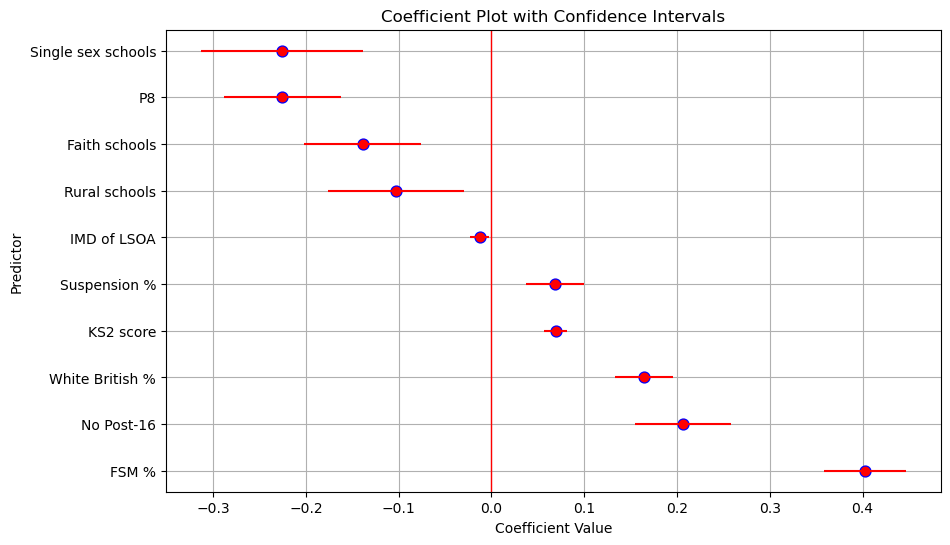

In [315]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

coef_df = coef_df[coef_df['Predictor'] != 'poly__KS2_history^2']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

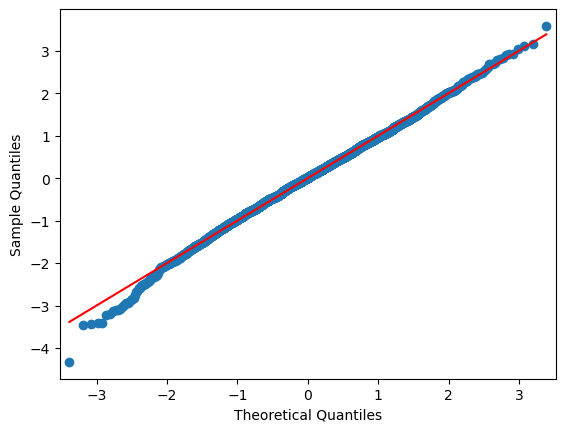

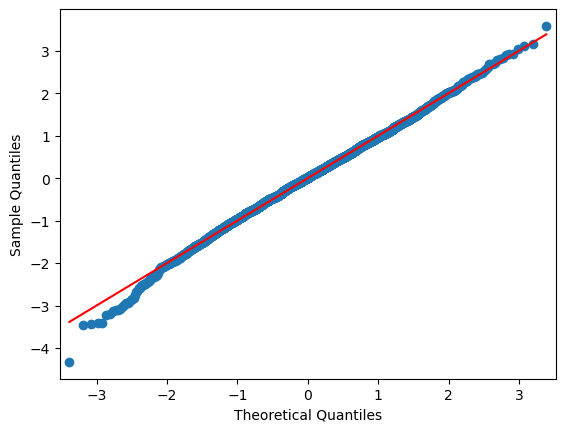

In [316]:
qqplot(model.resid_pearson, line='r')

# Add predictions and residuals to dataframe

In [317]:
data['predictions'] = model.fittedvalues

In [318]:
data['residuals'] = model.resid_pearson

Residuals: positive values indicate true value is higher than the model predicts. Negative values that the true value is lower. 

In [319]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2844.000000         2844.000000    2844.000000         2844.000000   
mean   133385.890647            4.948119       9.073101           27.990436   
std     12031.150864            3.396624       2.222155            8.600415   
min    100049.000000            0.000000       2.100000            1.500000   
25%    135594.500000            2.515284       7.600000           22.500000   
50%    137239.500000            4.306220       9.000000           28.100000   
75%    139792.250000            6.630539      10.300000           33.500000   
max    148702.000000           24.675325      20.300000           61.300000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2844.000000    2844.000000  2844.000000  2844.000000  2844.000000   
mean     22.802180      65.034529    17.134459    50.393302  1100.951828   
std      12.524634      29.219730    18.854479    16.588844   386.888170   
min       0.600000       0.000000     0.000000     0.000000    86.000000   
25%      13.100000      46.300000     3.700000    49.084560   835.000000   
50%      20.700000      76.800000     8.900000    50.930263  1067.000000   
75%      30.400000      88.425000    24.025000    52.989243  1347.250000   
max      74.700000      98.800000    93.300000   100.000000  2795.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2844.000000  2844.000000         2844.000000    2844.000000   
mean         0.179476    15.248957            6.477211     180.996132   
std          0.256673    18.057175            4.508471      61.640713   
min          0.000000     0.000000            0.000000      14.000000   
25%          0.000000     5.330600            3.425613     139.000000   
50%          0.091660     9.993600            5.408115     177.000000   
75%          0.258483    18.575187            8.560778     220.250000   
max          2.222220   255.033560           33.154360     450.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2844.000000   2844.000000  2844.000000  2844.000000    2844.000000   
mean    103.779993     49.623453    -0.002057     0.051688      27.080520   
std       2.930594      9.044674     0.490100     0.221435      19.421248   
min      93.100000      9.000000    -4.090000     0.000000       0.000000   
25%     102.000000     43.800000    -0.310000     0.000000      12.000000   
50%     103.500000     48.600000    -0.010000     0.000000      23.000000   
75%     105.000000     54.100000     0.330000     0.000000      37.000000   
max     117.400000     88.200000     2.270000     1.000000      99.000000   

            post16  sen_support         ehcp          IMD  \
count  2844.000000  2844.000000  2844.000000  2844.000000   
mean      0.629395    12.408393     2.294037     5.651195   
std       0.483052     5.423849     1.570291     2.821454   
min       0.000000     0.167084     0.000000     1.000000   
25%       0.000000     8.811344     1.269372     3.000000   
50%       1.000000    12.122955     2.000000     6.000000   
75%       1.000000    15.680605     2.953790     8.000000   
max       1.000000    40.191388    17.114094    10.000000   

       pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
count          2844.000000              2844.000000            2844.000000   
mean             16.770499                 0.229219               8.869487   
std               2.232390                 0.117366               2.123392   
min               5.200000                 0.000000               2.058017   
25%              15.600000                 0.200000               7.521318   
50%              16.700000                 0.200000               8.796445   
75%              17.900000                 0.300000              10.093273   
max              40.300000                 0.900000              19.744106   

       single_s

In [320]:
data.head()

URN  not_sustained_rate  total_absence  persistent_absence  \
1  138116            4.065041           15.4                47.3   
2  137899            1.739130            7.7                23.3   
3  146639           11.864407            9.7                31.2   
4  137603            2.586207            8.1                26.7   
5  140865            3.717472           10.9                35.7   

               urban_rural denomination   FSM  White_British   EAL  perc_boys  \
1    Rural town and fringe     No faith  29.0           94.0   2.3  47.969543   
2  Urban minor conurbation     No faith  13.2           89.7   3.8  49.004975   
3  Urban minor conurbation     No faith  44.1           91.0   4.8  50.931677   
4  Urban minor conurbation     No faith  15.6           91.4   3.6  48.567335   
5  Urban minor conurbation    Christian  20.7           62.2  15.9  48.205823   

                region_name                       school_name  headcount  \
1  Yorkshire and The Humber                Campsmount Academy      788.0   
2  Yorkshire and The Humber                 Hungerhill School     1206.0   
3  Yorkshire and The Humber                The Laurel Academy      644.0   
4  Yorkshire and The Humber                  Ridgewood School     1396.0   
5  Yorkshire and The Humber  The McAuley Catholic High School     1477.0   

   perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  KS2_history  \
1         0.25381   41.62437            14.21320          143.0        102.1   
2         0.33167   14.51078             7.21393          249.0        103.0   
3         0.00000   44.56522            14.13043          121.0        101.0   
4         0.07163   12.32092             6.37536          238.0        104.6   
5         0.27082   12.11916             6.09343          262.0        102.9   

   Attainment_8  Progress_8  selective  KS4_pass_rate POSTCODE  post16  \
1          37.5       -0.90          0            5.0  DN6 9AS       1   
2          51.1        0.33          0           38.0  DN3 2JY       0   
3          45.8        0.16          0            7.0  S64 9SD       0   
4          48.6       -0.27          0           11.0  DN5 7UB       1   
5          45.5       -0.18          0           12.0  DN3 3QF       1   

  school_sex                 type         Ofsted_rating  sen_support  \
1      Mixed    Academy converter  Requires improvement    13.705584   
2      Mixed    Academy converter           Outstanding    11.691542   
3      Mixed  Academy sponsor led                  Good     9.472050   
4      Mixed    Academy converter                  Good    12.607450   
5      Mixed    Academy converter  Requires improvement    10.494245   

       ehcp     LSOA11  IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
1  2.157360  E01007493  7.0                 13.7                      0.4   
2  1.326700  E01007478  4.0                 17.3                      0.2   
3  0.931677  E01007583  5.0                 19.9                      0.3   
4  1.289398  E01007588  5.0                 16.3                      0.2   
5  1.150982  E01007603  9.0                 15.7                      0.1   

   absence_rate_non_excl  single_sex_binary  faith_binary region_new  \
1              14.964096                  0             0      North   
2               7.599267                  0             0      North   
3               9.303709                  0             0      North   
4               7.938303                  0             0      North   
5              10.667389                  0             1      North   

  urban_binary Ofsted_num  predictions  residuals  
1            0          2     0.088689  -1.245761  
2            1          4     1.232538  -1.713915  
3            1          3    -0.004636   0.768898  
4            1          3    -0.110198  -0.966875  
5            1          2     0.873736  -0.135508

In [321]:
data.to_csv('predictions_residuals.csv', index=False)

### Visualise residuals

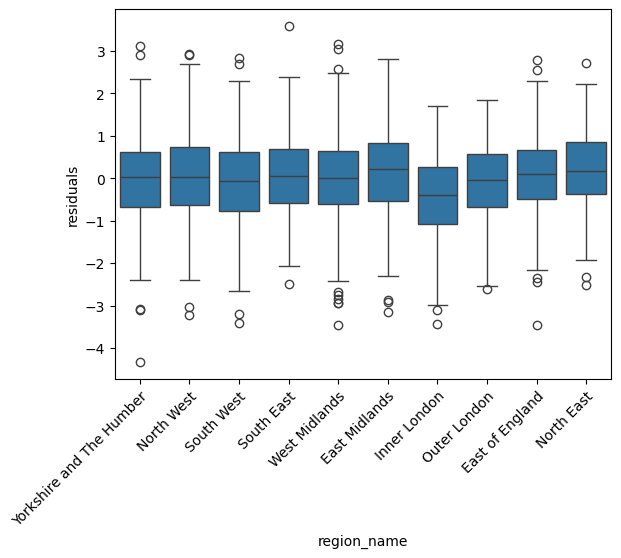

In [322]:
sns.boxplot(data=data, x='region_name', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

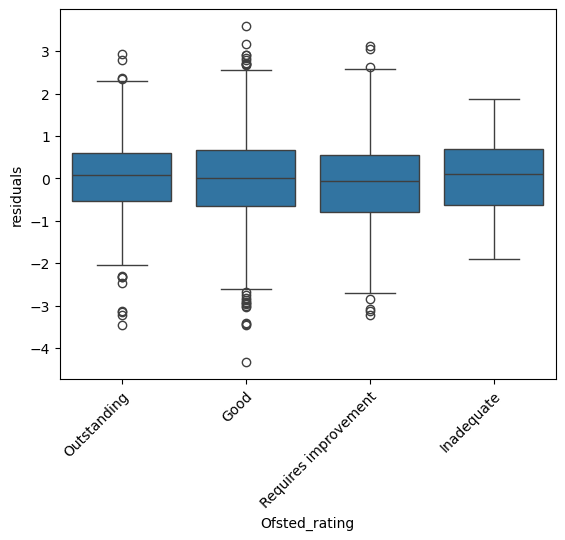

In [323]:
sns.boxplot(data=data, x='Ofsted_rating', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

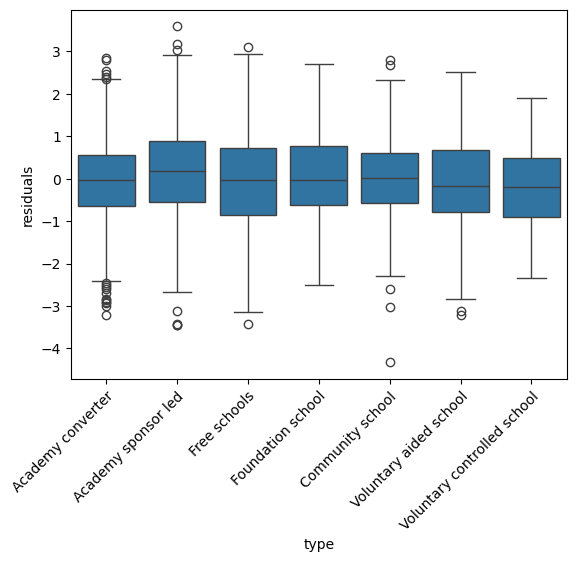

In [324]:
sns.boxplot(data=data, x='type', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

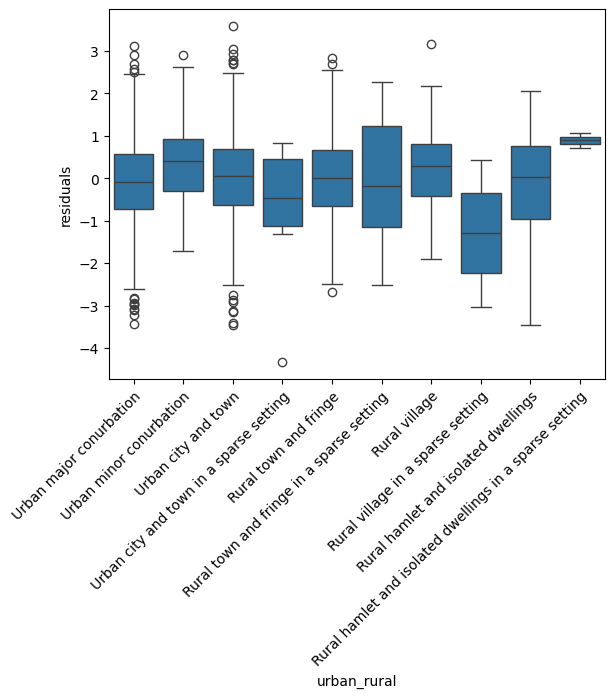

In [325]:
sns.boxplot(data=data, x='urban_rural', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

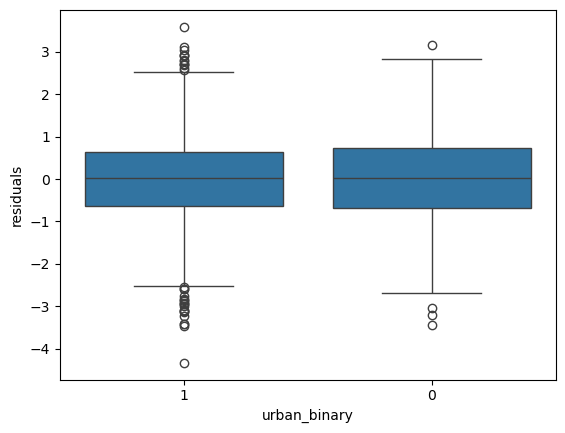

In [326]:
sns.boxplot(data=data, x='urban_binary', y='residuals');

### read in coordinates and map residuals

In [327]:
import geopandas as gpd
import contextily as ctx

In [328]:
coords = pd.read_csv('data_with_coordinates.csv', index_col=0)

In [329]:
coords = coords[['URN', 'Easting', 'Northing']].copy()

In [330]:
coords

URN   Easting  Northing
0     137181  526867.0  184105.0
1     100049  528159.0  184498.0
2     100050  528369.0  186019.0
3     100051  529555.0  183356.0
4     100052  524402.0  185633.0
...      ...       ...       ...
3141  137251  368104.0  521037.0
3142  137338  338127.0  478474.0
3143  136357  360707.0  478609.0
3144  141106  321416.0  471354.0
3145  135940  320952.0  469650.0

[3146 rows x 3 columns]

In [331]:
data_with_coords = data.merge(coords, how='left', on='URN')

In [332]:
data_with_coords['residuals'].describe()

count    2844.000000
mean        0.000103
std         0.998240
min        -4.327680
25%        -0.643360
50%         0.014115
75%         0.651233
max         3.584581
Name: residuals, dtype: float64

In [333]:
data_with_coords['residuals_banding'] = data_with_coords['residuals']

In [334]:
data_with_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   URN                      2844 non-null   int64   
 1   not_sustained_rate       2844 non-null   float64 
 2   total_absence            2844 non-null   float64 
 3   persistent_absence       2844 non-null   float64 
 4   urban_rural              2844 non-null   category
 5   denomination             2844 non-null   object  
 6   FSM                      2844 non-null   float64 
 7   White_British            2844 non-null   float64 
 8   EAL                      2844 non-null   float64 
 9   perc_boys                2844 non-null   float64 
 10  region_name              2844 non-null   object  
 11  school_name              2844 non-null   object  
 12  headcount                2844 non-null   float64 
 13  perm_excl_rate           2844 non-null   float64 
 14  susp_rat

In [335]:
print(data_with_coords['residuals_banding'].dtype)

float64


In [336]:
data_with_coords.loc[data_with_coords['residuals'] < -1, 'residuals_banding'] = -1
data_with_coords.loc[(data_with_coords['residuals'] >= -1) & (data_with_coords['residuals_banding'] <= 1), 'residuals_banding'] = 0
data_with_coords.loc[data_with_coords['residuals'] > 1, 'residuals_banding'] = 1

In [337]:
data_with_coords.loc[data_with_coords['residuals'] < -1]

URN  not_sustained_rate  total_absence  persistent_absence  \
0     138116            4.065041           15.4                47.3   
1     137899            1.739130            7.7                23.3   
18    138355            2.197802           10.8                34.7   
21    137130            3.311258           13.1                40.7   
23    136780            0.000000            6.7                18.3   
...      ...                 ...            ...                 ...   
2810  123574            2.463054            9.4                32.4   
2811  139536            6.250000           12.3                39.8   
2820  138459            0.000000            6.7                18.5   
2826  137299            0.000000            6.5                19.0   
2839  135531            2.259887            6.7                20.5   

                  urban_rural denomination   FSM  White_British   EAL  \
0       Rural town and fringe     No faith  29.0           94.0   2.3   
1     Urban minor conurbation     No faith  13.2           89.7   3.8   
18    Urban major conurbation     No faith  20.8           95.1   0.9   
21    Urban major conurbation     No faith  36.8           85.8   9.4   
23    Urban major conurbation    Christian   8.7           83.1   7.7   
...                       ...          ...   ...            ...   ...   
2810      Urban city and town     No faith  14.8           87.9   3.1   
2811      Urban city and town     No faith  44.1           78.6  13.0   
2820  Urban major conurbation    Christian   9.7           42.2  28.9   
2826  Urban major conurbation    Christian   8.1           49.4  23.3   
2839  Urban major conurbation    Christian  39.0           11.2  31.6   

       perc_boys               region_name                    school_name  \
0      47.969543  Yorkshire and The Humber             Campsmount Academy   
1      49.004975  Yorkshire and The Humber              Hungerhill School   
18     57.216495                North West             Hilbre High School   
21      0.000000                North West  Prenton High School for Girls   
23    100.000000                North West            St Anselm's College   
...          ...                       ...                            ...   
2810   49.653380             West Midlands      The Burton Borough School   
2811   50.402576             West Midlands        The Telford Park School   
2820    0.000000              Outer London          The Holy Cross School   
2826   96.728972              Outer London       Richard Challoner School   
2839   53.677092              Inner London                Chelsea Academy   

      headcount  perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  \
0         788.0         0.25381   41.62437            14.21320          143.0   
1        1206.0         0.33167   14.51078             7.21393          249.0   
18       1164.0         0.17182   12.28522             7.38832          199.0   
21        779.0         0.77022   20.41078             9.88447          154.0   
23        977.0         0.00000    1.74002             1.53531          140.0   
...         ...             ...        ...                 ...            ...   
2810     1154.0         0.08666   17.67764             7.45234          222.0   
2811      621.0         0.00000   88.24477            14.65378          114.0   
2820      982.0         0.00000    2.44399             1.93483          150.0   
2826     1070.0         0.00000    2.99065             2.05607          156.0   
2839     1183.0         0.00000    6.42434             4.39560          176.0   

      KS2_history  Attainment_8  Progress_8  selective  KS4_pass_rate  \
0           102.1          37.5       -0.90          0            5.0   
1           103.0          51.1        0.33          0           38.0   
18          100.7          44.5        0.13          0            8.0   
21          102.5          48.2        0.13          0           31.0   
23          108.

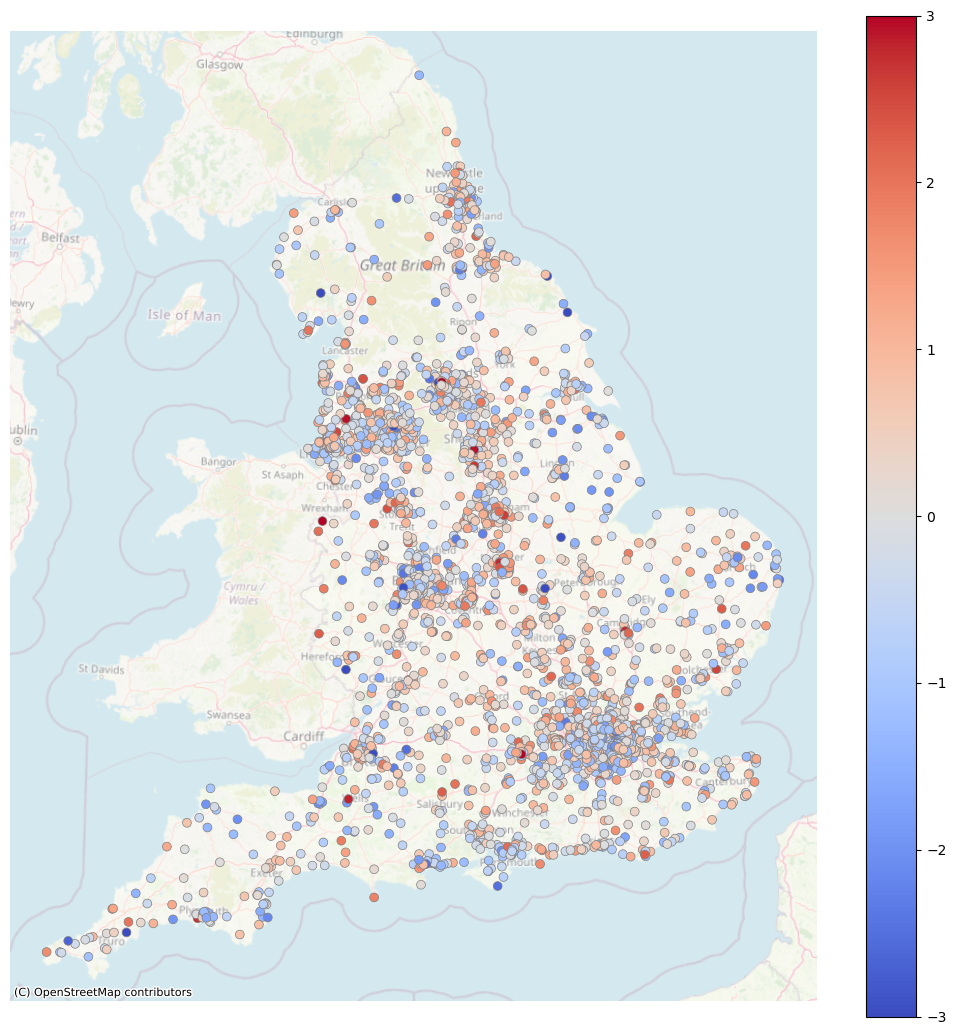

In [338]:
gdf = gpd.GeoDataFrame(
    data_with_coords,
    geometry = gpd.points_from_xy(data_with_coords['Easting'], data_with_coords['Northing']),
    crs = 'EPSG:27700'
)

fig, ax = plt.subplots(figsize=(13, 13))
gdf.plot(ax=ax, 
         column='residuals', 
         markersize=40, 
         cmap="coolwarm",
         edgecolor='grey',
         linewidth = 0.5,
         vmin=-3,
         vmax=3,
        legend=True)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

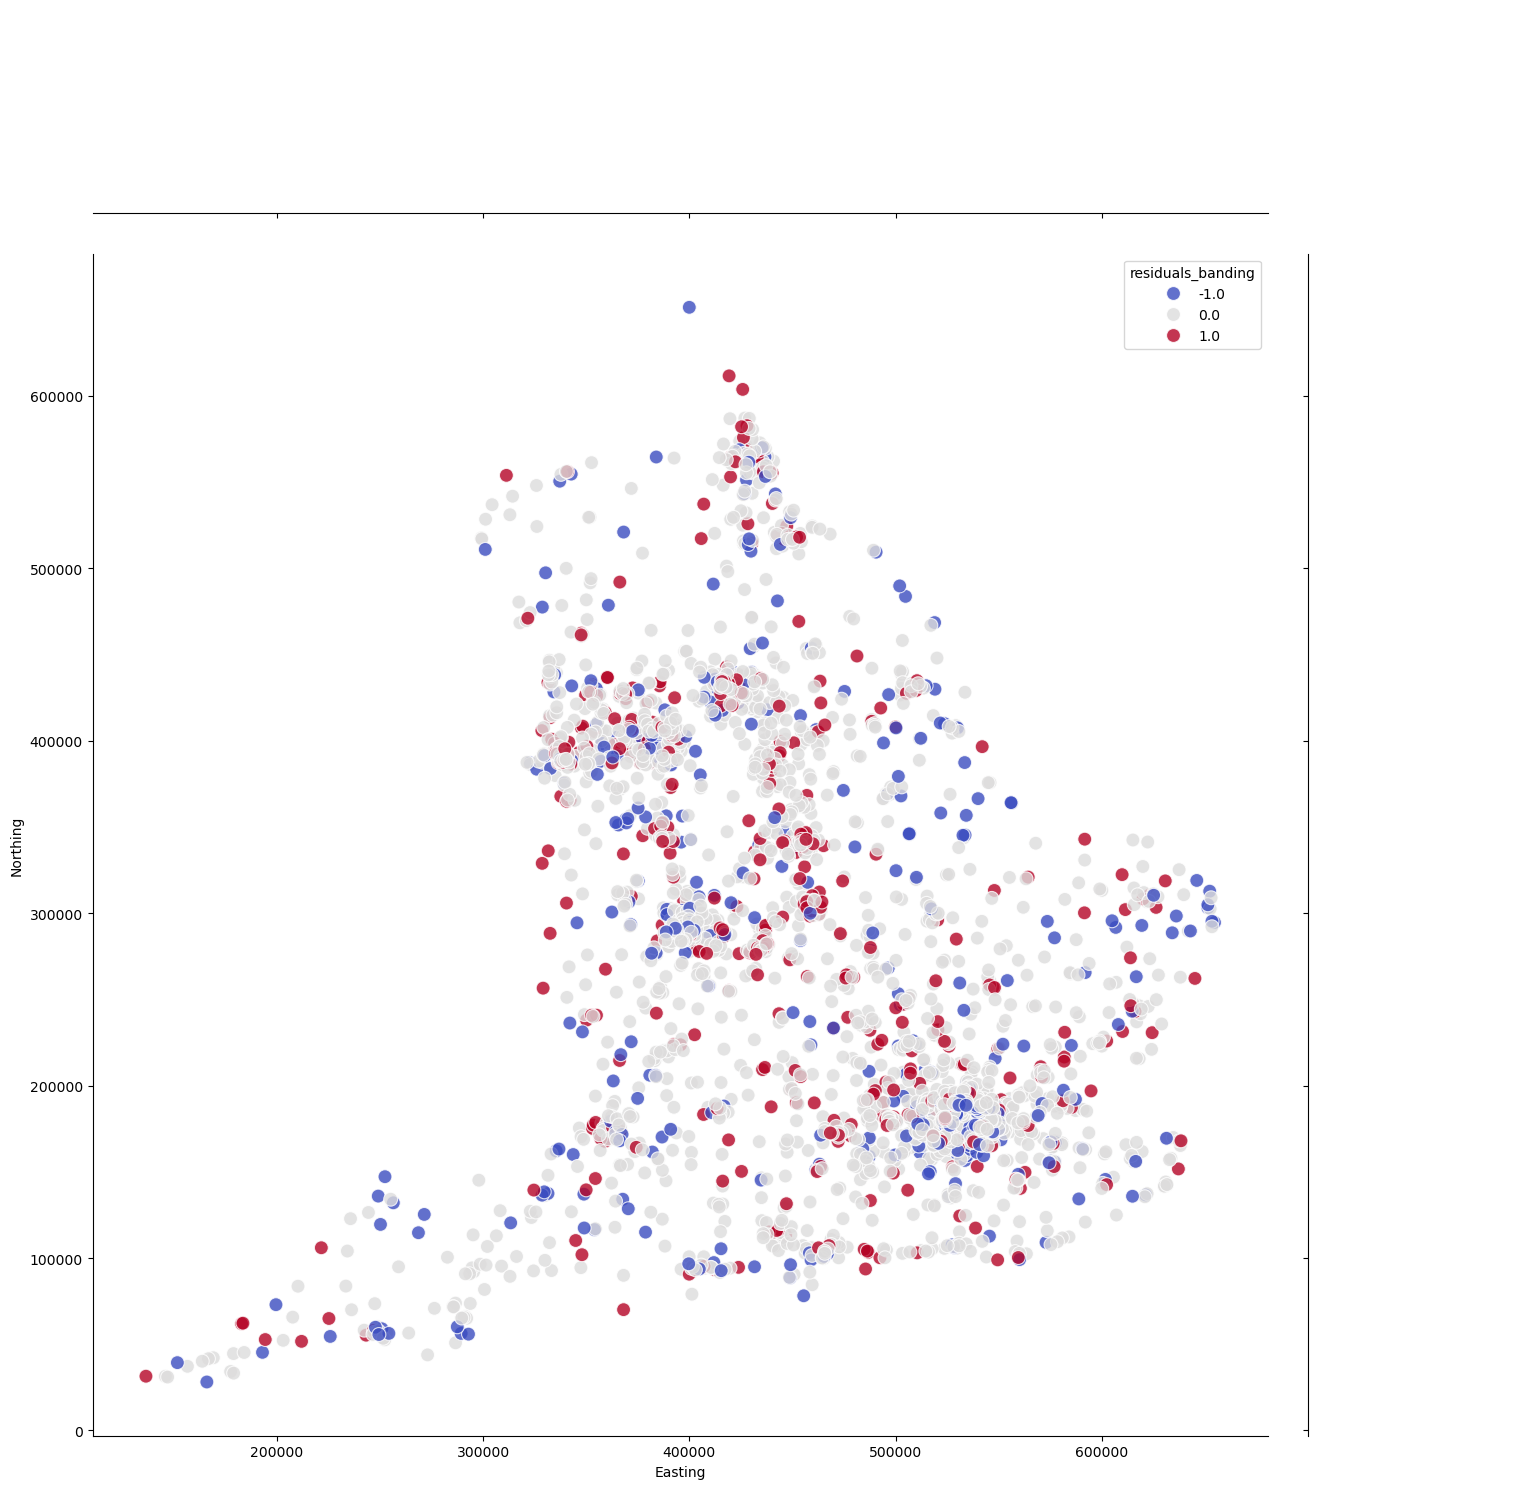

In [339]:
g = sns.JointGrid(data=data_with_coords, 
                  x='Easting', y='Northing', hue='residuals_banding', height=15, marginal_ticks=False)

g.plot_joint(sns.scatterplot, s=100, alpha=0.8,
            hue_norm=(-1, 1), palette="coolwarm");

## Groupby LSOA

In [315]:
LSOA_residuals = data.groupby('LSOA11')['residuals'].mean()

In [317]:
LSOA_residuals = pd.DataFrame(LSOA_residuals)
LSOA_residuals

residuals
LSOA11              
E01000031  -0.749526
E01000035   0.041182
E01000051  -0.248226
E01000061  -0.086691
E01000066   0.226985
...              ...
E01033693   5.193386
E01033701  -0.654812
E01033726   0.334445
E01033737  -1.221233
E01033745   0.517026

[2860 rows x 1 columns]

In [318]:
LSOA_residuals.to_csv('LSOA_residuals.csv', index=False)

Shape file source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-lower-layer-super-output-areas-and-data-zones/resource/bf174b2e-fc72-449d-bbbf-b12e9892c88d 

In [321]:
map = gpd.read_file('infuse_lsoa_lyr_2011.shp')

In [326]:
map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42619 entries, 0 to 42618
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    42619 non-null  object  
 1   geo_label   42619 non-null  object  
 2   geo_labelw  6976 non-null   object  
 3   label       42619 non-null  object  
 4   name        42619 non-null  object  
 5   geometry    42619 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 2.0+ MB


<Axes: >

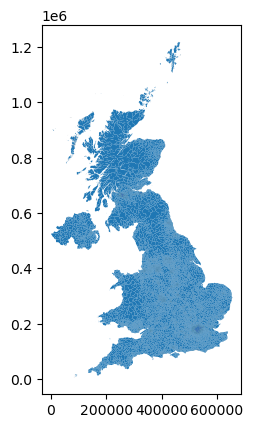

In [322]:
map.plot()

In [323]:
map.head()

geo_code       geo_label geo_labelw                        label  \
0  E01003513     Newham 035D       None  E92000001E09000025E01003513   
1  E01031647    Horsham 002D       None  E92000001E07000227E01031647   
2  E01022006   Tendring 002C       None  E92000001E07000076E01022006   
3  E01001159    Croydon 002C       None  E92000001E09000008E01001159   
4  E01008088  Sheffield 012B       None  E92000001E08000019E01008088   

             name                                           geometry  
0     Newham 035D  POLYGON ((541893.189 181249.621, 541900.568 18...  
1    Horsham 002D  POLYGON ((518376.682 132574.695, 518375.785 13...  
2   Tendring 002C  POLYGON ((623754.716 231042.037, 623759.75 231...  
3    Croydon 002C  POLYGON ((532233.977 170474.976, 532229.824 17...  
4  Sheffield 012B  POLYGON ((433539.233 392096.845, 433539.125 39...

In [324]:
england = map[map['geo_code'].str.startswith('E01')]

In [325]:
england.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 32844 entries, 0 to 42618
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    32844 non-null  object  
 1   geo_label   32844 non-null  object  
 2   geo_labelw  0 non-null      object  
 3   label       32844 non-null  object  
 4   name        32844 non-null  object  
 5   geometry    32844 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 1.8+ MB


<Axes: >

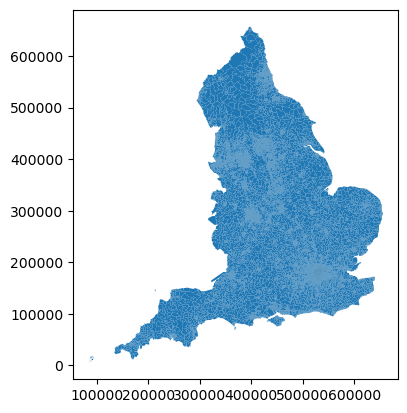

In [327]:
england.plot()

In [328]:
england_lsoa_residuals = pd.merge(england, LSOA_residuals, left_on='geo_code', right_on='LSOA11', how='left')

In [330]:
england_lsoa_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geo_code    32844 non-null  object  
 1   geo_label   32844 non-null  object  
 2   geo_labelw  0 non-null      object  
 3   label       32844 non-null  object  
 4   name        32844 non-null  object  
 5   geometry    32844 non-null  geometry
 6   residuals   2860 non-null   float64 
dtypes: float64(1), geometry(1), object(5)
memory usage: 1.8+ MB


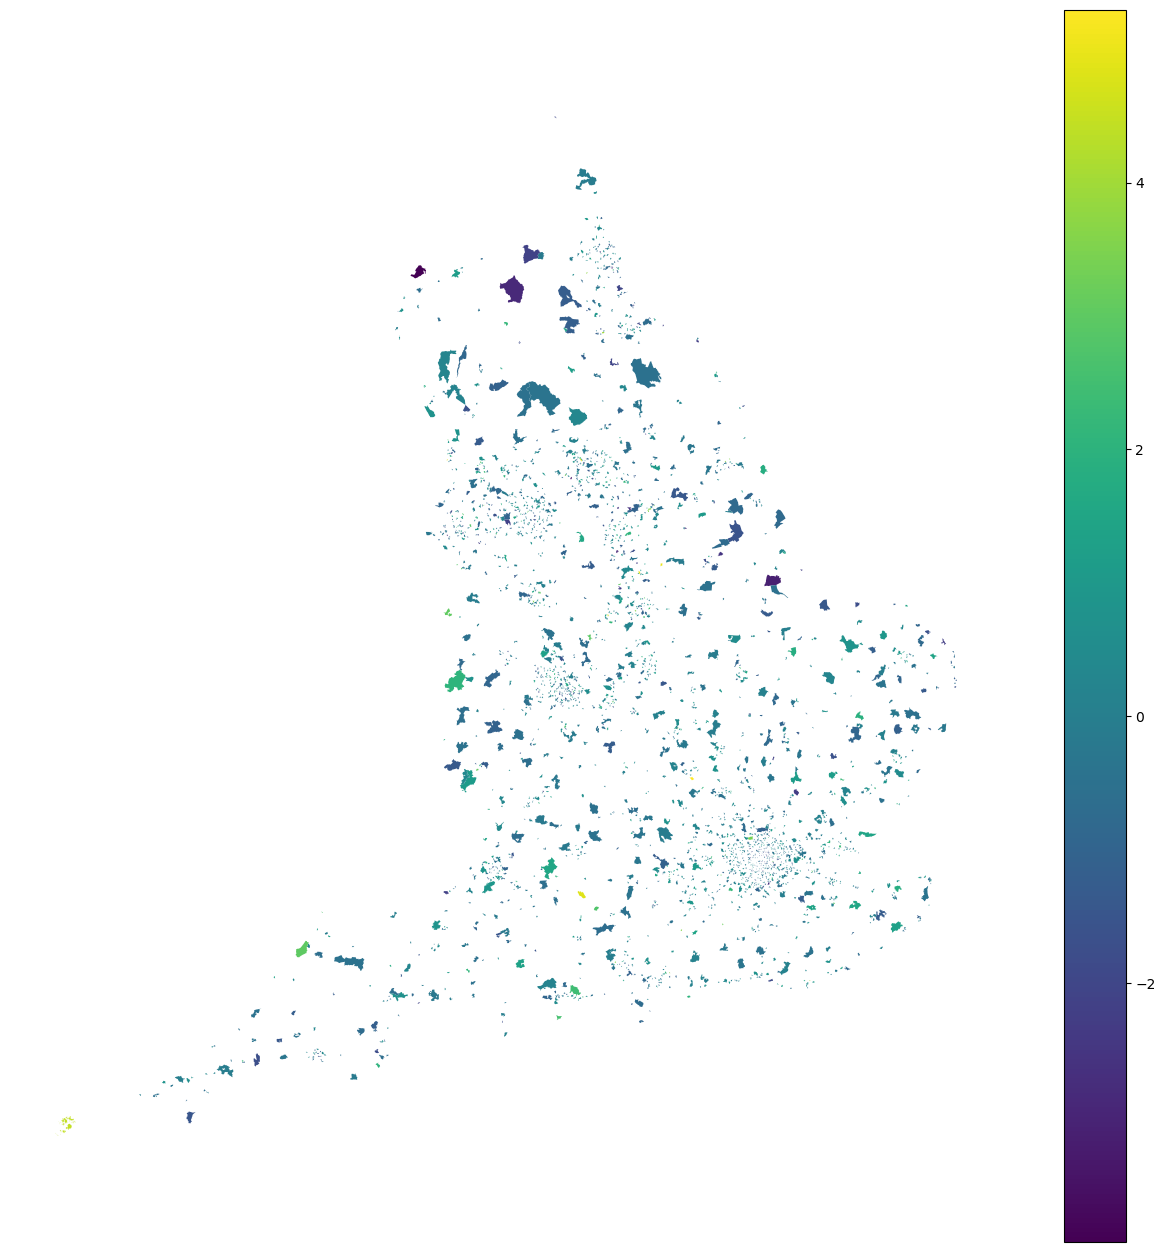

In [332]:
f,ax = plt.subplots(1, figsize=(16,16))
england_lsoa_residuals.plot(column='residuals', legend=True, ax=ax)

# remove axis
ax.set_axis_off()
plt.show();


## Groupby region

In [340]:
data_temp_london = data.copy()

In [341]:
data_temp_london['region_name'].replace('Inner London', 'London', inplace=True)
data_temp_london['region_name'].replace('Outer London', 'London', inplace=True)

In [342]:
region_residuals = data_temp_london.groupby('region_name')['residuals'].mean()

In [343]:
region_residuals = pd.DataFrame(region_residuals)
region_residuals

residuals
region_name                        
East Midlands              0.144873
East of England            0.071294
London                    -0.241448
North East                 0.170134
North West                 0.071352
South East                 0.073274
South West                -0.102821
West Midlands             -0.003014
Yorkshire and The Humber  -0.019275

region map source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-regions/resource/cf403e93-6bc8-4f63-b4f3-b9e7c47e769a 

In [344]:
map = gpd.read_file('infuse_rgn_2011.shp')

In [345]:
map

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....

In [346]:
england_map_residuals = pd.merge(map, region_residuals, left_on='name', right_on='region_name', how='left')

In [347]:
england_map_residuals

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  residuals  
0  POLYGON ((617106.688 343482.308, 617111.01 343...   0.071294  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  -0.019275  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....   0.073274  
3  POLYGON ((454996.828 276726.552, 454974.133 27...   0.144873  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  -0.241448  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  -0.102821  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  -0.003014  
7  POLYGON ((380424.183 522381.432, 380424.209 52...   0.071352  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....   0.170134

In [348]:
england_map_residuals['residuals'].describe()

count    9.000000
mean     0.018263
std      0.128318
min     -0.241448
25%     -0.019275
50%      0.071294
75%      0.073274
max      0.170134
Name: residuals, dtype: float64

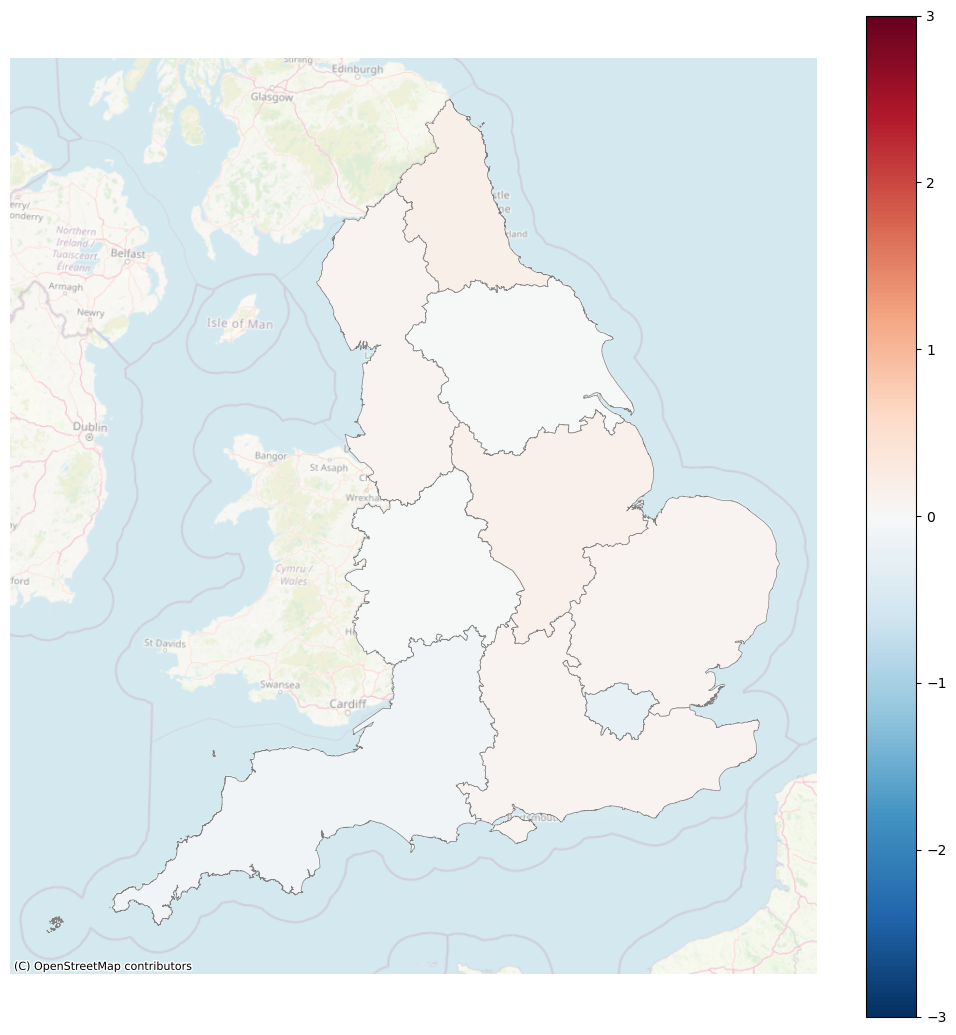

In [349]:
f,ax = plt.subplots(1, figsize=(13,13))
england_map_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           edgecolor='grey',
                           linewidth = 0.5,
                           vmin=-3,
                           vmax=3,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

## Groupby LA

In [350]:
la_code = pd.read_csv('model_data/la_code.csv', index_col=0)

In [351]:
la_code = la_code[['URN', 'la_name', 'district_administrative_name', 'district_administrative_code']]

In [352]:
la_code

URN                 la_name district_administrative_name  \
1      100000          City of London               City of London   
2      100001          City of London               City of London   
3      100002          City of London               City of London   
4      100003          City of London               City of London   
5      100005                  Camden                       Camden   
...       ...                     ...                          ...   
24438  149557               Wiltshire                    Wiltshire   
24439  149632  Kensington and Chelsea       Kensington and Chelsea   
24440  149633                Cornwall                     Cornwall   
24441  149635           Wolverhampton                Wolverhampton   
24442  149636                 Norfolk                    Breckland   

      district_administrative_code  
1                        E09000001  
2                        E09000001  
3                        E09000001  
4                        E09000001  
5                        E09000007  
...                            ...  
24438                    E06000054  
24439                    E09000020  
24440                    E06000052  
24441                    E08000031  
24442                    E07000143  

[24442 rows x 4 columns]

In [353]:
data_residuals = data[['URN', 'residuals']]

In [354]:
data_residuals

URN  residuals
1     138116  -1.245761
2     137899  -1.713915
3     146639   0.768898
4     137603  -0.966875
5     140865  -0.135508
...      ...        ...
3134  135531  -1.068640
3135  141931   0.446432
3136  100502  -0.774650
3138  140212   1.281077
3139  100503  -0.697030

[2844 rows x 2 columns]

In [355]:
data_la = data_residuals.merge(la_code, how='left', on='URN')

In [356]:
data_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URN                           2844 non-null   int64  
 1   residuals                     2844 non-null   float64
 2   la_name                       2844 non-null   object 
 3   district_administrative_name  2844 non-null   object 
 4   district_administrative_code  2844 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 111.2+ KB


In [357]:
la_residuals = data_la.groupby('district_administrative_code')['residuals'].mean()

In [358]:
la_residuals = pd.DataFrame(la_residuals)
la_residuals = la_residuals.reset_index()

In [359]:
la_residuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   district_administrative_code  307 non-null    object 
 1   residuals                     307 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


la map source: 

In [360]:
map = gpd.read_file('infuse_dist_lyr_2011.shp')

<Axes: >

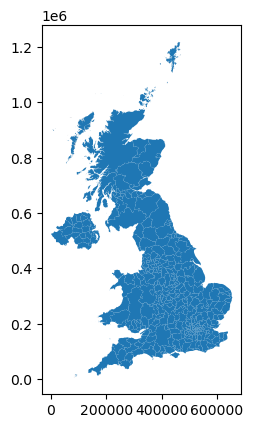

In [361]:
map.plot()

In [362]:

map[map['name'].str.contains('Cornwall')]

geo_code                 geo_label geo_labelw               label  \
51  E41000052  Cornwall,Isles of Scilly       None  E92000001E41000052   

                        name  \
51  Cornwall,Isles of Scilly   

                                             geometry  
51  MULTIPOLYGON (((185900.5 33613.7, 185894.609 3...

In [363]:
england = map[map['geo_code'].str.startswith('E')]

In [364]:
england

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E07000049       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

### update geo codes in 'england' to match current codes

In [365]:
update_codes = pd.read_csv('geo_code_replacements.csv')

In [366]:
update_codes.head()

geo_code                       name district_administrative_code
0  E07000097         East Hertfordshire                    E07000242
1  E08000020                  Gateshead                    E08000037
2  E41000052  Cornwall, Isles of Scilly                    E06000052
3  E07000050               North Dorset                    E06000059
4  E07000101                  Stevenage                    E07000243

In [367]:
code_dict = dict(zip(update_codes['geo_code'], update_codes['district_administrative_code']))
code_dict

{'E07000097': 'E07000242',
 'E08000020': 'E08000037',
 'E41000052': 'E06000052',
 'E07000050': 'E06000059',
 'E07000101': 'E07000243',
 'E07000048': 'E06000058',
 'E07000190': 'E07000246',
 'E07000052': 'E06000059',
 'E07000201': 'E07000245',
 'E07000153': 'E06000061',
 'E06000048': 'E06000057',
 'E41000324': 'E09000033',
 'E07000205': 'E07000244',
 'E07000104': 'E07000241',
 'E07000156': 'E06000061',
 'E07000191': 'E07000246',
 'E07000151': 'E06000062',
 'E06000029': 'E06000058',
 'E07000004': 'E06000060',
 'E07000150': 'E06000061',
 'E07000053': 'E06000059',
 'E07000152': 'E06000061',
 'E07000204': 'E07000245',
 'E07000051': 'E06000059',
 'E07000005': 'E06000060',
 'E07000155': 'E06000062',
 'E07000006': 'E06000060',
 'E07000007': 'E06000060',
 'E07000206': 'E07000244',
 'E07000100': 'E07000240',
 'E06000028': 'E06000058',
 'E07000154': 'E06000062',
 'E07000049': 'E06000059'}

In [368]:
england_updated = england.copy()

In [369]:
england_updated['geo_code'] = england_updated['geo_code'].map(code_dict).fillna(england_updated['geo_code'])

In [370]:
england_updated

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E06000059       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

In [371]:
england_la_residuals = pd.merge(england_updated, la_residuals, left_on='geo_code', right_on='district_administrative_code', how='left')

In [372]:
england_la_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geo_code                      324 non-null    object  
 1   geo_label                     324 non-null    object  
 2   geo_labelw                    0 non-null      object  
 3   label                         324 non-null    object  
 4   name                          324 non-null    object  
 5   geometry                      324 non-null    geometry
 6   district_administrative_code  324 non-null    object  
 7   residuals                     324 non-null    float64 
dtypes: float64(1), geometry(1), object(6)
memory usage: 20.4+ KB


In [373]:
unmatched_rows = england_la_residuals[england_la_residuals['residuals'].isnull()]
print(unmatched_rows[['geo_code', 'geo_label']])

Empty DataFrame
Columns: [geo_code, geo_label]
Index: []


In [374]:
data['residuals'].describe()

count    2844.000000
mean        0.000103
std         0.998240
min        -4.327680
25%        -0.643360
50%         0.014115
75%         0.651233
max         3.584581
Name: residuals, dtype: float64

In [375]:
england_la_residuals['residuals'].describe()

count    324.000000
mean      -0.009021
std        0.474330
min       -2.258108
25%       -0.269758
50%        0.019608
75%        0.277093
max        1.094956
Name: residuals, dtype: float64

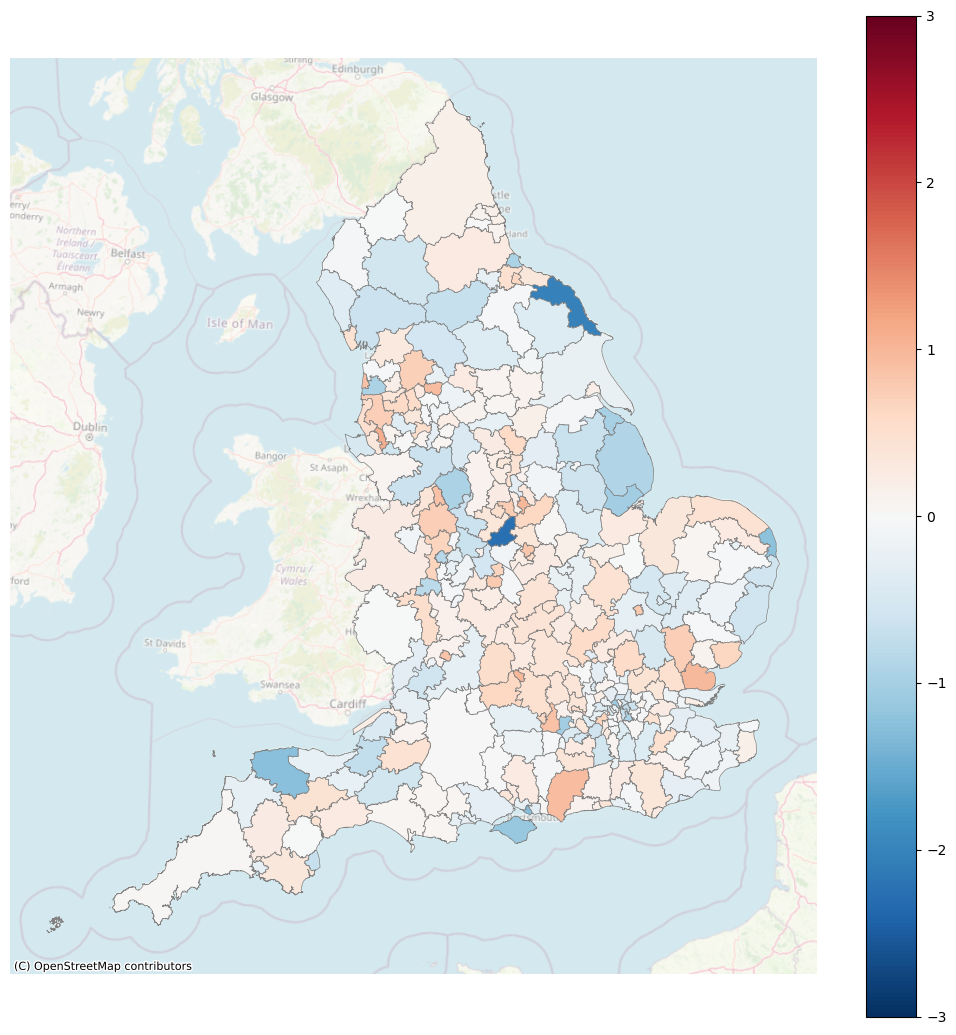

In [376]:
f,ax = plt.subplots(1, figsize=(13,13))
england_la_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           vmin=-3,
                           vmax=3,
                           edgecolor='grey',
                           linewidth = 0.5,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)


# remove axis
ax.set_axis_off()
plt.show();


# Plot means

In [377]:
data.describe()

URN  not_sustained_rate  total_absence  persistent_absence  \
count    2844.000000         2844.000000    2844.000000         2844.000000   
mean   133385.890647            4.948119       9.073101           27.990436   
std     12031.150864            3.396624       2.222155            8.600415   
min    100049.000000            0.000000       2.100000            1.500000   
25%    135594.500000            2.515284       7.600000           22.500000   
50%    137239.500000            4.306220       9.000000           28.100000   
75%    139792.250000            6.630539      10.300000           33.500000   
max    148702.000000           24.675325      20.300000           61.300000   

               FSM  White_British          EAL    perc_boys    headcount  \
count  2844.000000    2844.000000  2844.000000  2844.000000  2844.000000   
mean     22.802180      65.034529    17.134459    50.393302  1100.951828   
std      12.524634      29.219730    18.854479    16.588844   386.888170   
min       0.600000       0.000000     0.000000     0.000000    86.000000   
25%      13.100000      46.300000     3.700000    49.084560   835.000000   
50%      20.700000      76.800000     8.900000    50.930263  1067.000000   
75%      30.400000      88.425000    24.025000    52.989243  1347.250000   
max      74.700000      98.800000    93.300000   100.000000  2795.000000   

       perm_excl_rate    susp_rate  one_plus_susp_rate  KS4_headcount  \
count     2844.000000  2844.000000         2844.000000    2844.000000   
mean         0.179476    15.248957            6.477211     180.996132   
std          0.256673    18.057175            4.508471      61.640713   
min          0.000000     0.000000            0.000000      14.000000   
25%          0.000000     5.330600            3.425613     139.000000   
50%          0.091660     9.993600            5.408115     177.000000   
75%          0.258483    18.575187            8.560778     220.250000   
max          2.222220   255.033560           33.154360     450.000000   

       KS2_history  Attainment_8   Progress_8    selective  KS4_pass_rate  \
count  2844.000000   2844.000000  2844.000000  2844.000000    2844.000000   
mean    103.779993     49.623453    -0.002057     0.051688      27.080520   
std       2.930594      9.044674     0.490100     0.221435      19.421248   
min      93.100000      9.000000    -4.090000     0.000000       0.000000   
25%     102.000000     43.800000    -0.310000     0.000000      12.000000   
50%     103.500000     48.600000    -0.010000     0.000000      23.000000   
75%     105.000000     54.100000     0.330000     0.000000      37.000000   
max     117.400000     88.200000     2.270000     1.000000      99.000000   

            post16  sen_support         ehcp          IMD  \
count  2844.000000  2844.000000  2844.000000  2844.000000   
mean      0.629395    12.408393     2.294037     5.651195   
std       0.483052     5.423849     1.570291     2.821454   
min       0.000000     0.167084     0.000000     1.000000   
25%       0.000000     8.811344     1.269372     3.000000   
50%       1.000000    12.122955     2.000000     6.000000   
75%       1.000000    15.680605     2.953790     8.000000   
max       1.000000    40.191388    17.114094    10.000000   

       pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
count          2844.000000              2844.000000            2844.000000   
mean             16.770499                 0.229219               8.869487   
std               2.232390                 0.117366               2.123392   
min               5.200000                 0.000000               2.058017   
25%              15.600000                 0.200000               7.521318   
50%              16.700000                 0.200000               8.796445   
75%              17.900000                 0.300000              10.093273   
max              40.300000                 0.900000              19.744106   

       single_s

In [378]:
ns_mean = data['not_sustained_rate'].mean()
ns_mean

4.948118613347514

#### Headcount

In [379]:
headcount = data[['headcount', 'not_sustained_rate']]

In [380]:
headcount['Rank'] = 'Middle'
headcount

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/3364303623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headcount['Rank'] = 'Middle'


headcount  not_sustained_rate    Rank
1         788.0            4.065041  Middle
2        1206.0            1.739130  Middle
3         644.0           11.864407  Middle
4        1396.0            2.586207  Middle
5        1477.0            3.717472  Middle
...         ...                 ...     ...
3134     1183.0            2.259887  Middle
3135     1027.0            1.626016  Middle
3136      647.0            2.586207  Middle
3138     1253.0            8.588957  Middle
3139      691.0            3.488372  Middle

[2844 rows x 3 columns]

In [381]:
q25 = data['headcount'].quantile(0.25)
q75 = data['headcount'].quantile(0.75)

In [382]:
headcount.loc[headcount['headcount'] > q75, 'Rank'] = 'High'
headcount.loc[headcount['headcount'] < q25, 'Rank'] = 'Low'

In [383]:
mean_neet_headcount = headcount.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_headcount

Rank
High      3.745029
Low       6.245774
Middle    4.902724
Name: not_sustained_rate, dtype: float64

In [384]:
# convert series to df
mean_neet_headcount = mean_neet_headcount.reset_index()

# rename columns
mean_neet_headcount.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_headcount['Level'] = pd.Categorical(mean_neet_headcount['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_headcount = mean_neet_headcount.sort_values('Level')

# replace values in Level col
mean_neet_headcount['Level'].replace('High', 'Top 25% Headcount', inplace=True)
mean_neet_headcount['Level'].replace('Middle', 'Center 50% Headcount', inplace=True)
mean_neet_headcount['Level'].replace('Low', 'Bottom 25% Headcount', inplace=True)

# new column for characteristic label
mean_neet_headcount['Characteristic'] = 'Headcount'

# reorder cols
mean_neet_headcount = mean_neet_headcount[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_headcount

Characteristic                 Level  Mean Not Sustained Rate
1      Headcount  Bottom 25% Headcount                 6.245774
2      Headcount  Center 50% Headcount                 4.902724
0      Headcount     Top 25% Headcount                 3.745029

#### Pupil:teacher

In [385]:
pup_teach = data[['pupil_teacher_ratio', 'not_sustained_rate']]

In [386]:
pup_teach['Rank'] = 'Middle'
pup_teach

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/1181414789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pup_teach['Rank'] = 'Middle'


pupil_teacher_ratio  not_sustained_rate    Rank
1                    13.7            4.065041  Middle
2                    17.3            1.739130  Middle
3                    19.9           11.864407  Middle
4                    16.3            2.586207  Middle
5                    15.7            3.717472  Middle
...                   ...                 ...     ...
3134                 14.4            2.259887  Middle
3135                 13.8            1.626016  Middle
3136                 16.2            2.586207  Middle
3138                 11.9            8.588957  Middle
3139                 13.8            3.488372  Middle

[2844 rows x 3 columns]

In [387]:
q25 = data['pupil_teacher_ratio'].quantile(0.25)
q75 = data['pupil_teacher_ratio'].quantile(0.75)

In [388]:
pup_teach.loc[pup_teach['pupil_teacher_ratio'] > q75, 'Rank'] = 'High'
pup_teach.loc[pup_teach['pupil_teacher_ratio'] < q25, 'Rank'] = 'Low'

In [389]:
mean_neet_pup_teach = pup_teach.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_pup_teach

Rank
High      4.484319
Low       5.727348
Middle    4.793088
Name: not_sustained_rate, dtype: float64

In [390]:
# convert series to df
mean_neet_pup_teach = mean_neet_pup_teach.reset_index()

# rename columns
mean_neet_pup_teach.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_pup_teach['Level'] = pd.Categorical(mean_neet_pup_teach['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_pup_teach = mean_neet_pup_teach.sort_values('Level')

# replace values in Level col
mean_neet_pup_teach['Level'].replace('High', 'Top 25% Pupil:Teacher Ratio', inplace=True)
mean_neet_pup_teach['Level'].replace('Middle', 'Center 50% Pupil:Teacher Ratio', inplace=True)
mean_neet_pup_teach['Level'].replace('Low', 'Bottom 25% Pupil:Teacher Ratio', inplace=True)

# new column for characteristic label
mean_neet_pup_teach['Characteristic'] = 'Pupil:Teacher Ratio'

# reorder cols
mean_neet_pup_teach = mean_neet_pup_teach[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_pup_teach

Characteristic                           Level  \
1  Pupil:Teacher Ratio  Bottom 25% Pupil:Teacher Ratio   
2  Pupil:Teacher Ratio  Center 50% Pupil:Teacher Ratio   
0  Pupil:Teacher Ratio     Top 25% Pupil:Teacher Ratio   

   Mean Not Sustained Rate  
1                 5.727348  
2                 4.793088  
0                 4.484319

#### Assistant:teacher

In [391]:
ass_teach = data[['assistant_teacher_ratio', 'not_sustained_rate']]

In [392]:
ass_teach['Rank'] = 'Middle'
ass_teach

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/828784514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_teach['Rank'] = 'Middle'


assistant_teacher_ratio  not_sustained_rate    Rank
1                         0.4            4.065041  Middle
2                         0.2            1.739130  Middle
3                         0.3           11.864407  Middle
4                         0.2            2.586207  Middle
5                         0.1            3.717472  Middle
...                       ...                 ...     ...
3134                      0.2            2.259887  Middle
3135                      0.1            1.626016  Middle
3136                      0.1            2.586207  Middle
3138                      0.3            8.588957  Middle
3139                      0.2            3.488372  Middle

[2844 rows x 3 columns]

In [393]:
q25 = data['assistant_teacher_ratio'].quantile(0.25)
q75 = data['assistant_teacher_ratio'].quantile(0.75)

In [394]:
ass_teach.loc[ass_teach['assistant_teacher_ratio'] > q75, 'Rank'] = 'High'
ass_teach.loc[ass_teach['assistant_teacher_ratio'] < q25, 'Rank'] = 'Low'

In [395]:
mean_neet_ass_teach = ass_teach.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_ass_teach

Rank
High      6.623690
Low       3.570070
Middle    5.133762
Name: not_sustained_rate, dtype: float64

In [396]:
# convert series to df
mean_neet_ass_teach = mean_neet_ass_teach.reset_index()

# rename columns
mean_neet_ass_teach.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_ass_teach['Level'] = pd.Categorical(mean_neet_ass_teach['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_ass_teach = mean_neet_ass_teach.sort_values('Level')

# replace values in Level col
mean_neet_ass_teach['Level'].replace('High', 'Top 25% Assistant:Teacher Ratio', inplace=True)
mean_neet_ass_teach['Level'].replace('Middle', 'Center 50% Assistant:Teacher Ratio', inplace=True)
mean_neet_ass_teach['Level'].replace('Low', 'Bottom 25% Assistant:Teacher Ratio', inplace=True)

# new column for characteristic label
mean_neet_ass_teach['Characteristic'] = 'Assistant:Teacher Ratio'

# reorder cols
mean_neet_ass_teach = mean_neet_ass_teach[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_ass_teach

Characteristic                               Level  \
1  Assistant:Teacher Ratio  Bottom 25% Assistant:Teacher Ratio   
2  Assistant:Teacher Ratio  Center 50% Assistant:Teacher Ratio   
0  Assistant:Teacher Ratio     Top 25% Assistant:Teacher Ratio   

   Mean Not Sustained Rate  
1                 3.570070  
2                 5.133762  
0                 6.623690

#### Suspension rate

In [397]:
susp = data[['susp_rate', 'not_sustained_rate']]

In [398]:
susp['Rank'] = 'Middle'
susp

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/4005748282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  susp['Rank'] = 'Middle'


susp_rate  not_sustained_rate    Rank
1      41.62437            4.065041  Middle
2      14.51078            1.739130  Middle
3      44.56522           11.864407  Middle
4      12.32092            2.586207  Middle
5      12.11916            3.717472  Middle
...         ...                 ...     ...
3134    6.42434            2.259887  Middle
3135    2.23953            1.626016  Middle
3136    9.73725            2.586207  Middle
3138   15.24342            8.588957  Middle
3139   23.58900            3.488372  Middle

[2844 rows x 3 columns]

In [399]:
q25 = data['susp_rate'].quantile(0.25)
q75 = data['susp_rate'].quantile(0.75)

In [400]:
susp.loc[susp['susp_rate'] > q75, 'Rank'] = 'High'
susp.loc[susp['susp_rate'] < q25, 'Rank'] = 'Low'

In [401]:
mean_neet_susp = susp.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_susp

Rank
High      7.307291
Low       2.970502
Middle    4.757341
Name: not_sustained_rate, dtype: float64

In [402]:
# convert series to df
mean_neet_susp = mean_neet_susp.reset_index()

# rename columns
mean_neet_susp.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_susp['Level'] = pd.Categorical(mean_neet_susp['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_susp = mean_neet_susp.sort_values('Level')

# replace values in Level col
mean_neet_susp['Level'].replace('High', 'Top 25% Suspension Rate', inplace=True)
mean_neet_susp['Level'].replace('Middle', 'Center 50% Suspension Rate', inplace=True)
mean_neet_susp['Level'].replace('Low', 'Bottom 25% Suspension Rate', inplace=True)

# new column for characteristic label
mean_neet_susp['Characteristic'] = 'Suspension Rate'

# reorder cols
mean_neet_susp = mean_neet_susp[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_susp

Characteristic                       Level  Mean Not Sustained Rate
1  Suspension Rate  Bottom 25% Suspension Rate                 2.970502
2  Suspension Rate  Center 50% Suspension Rate                 4.757341
0  Suspension Rate     Top 25% Suspension Rate                 7.307291

#### Progress 8

In [403]:
P8 = data[['Progress_8', 'not_sustained_rate']]

In [404]:
P8['Rank'] = 'Middle'
P8

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/3514377501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P8['Rank'] = 'Middle'


Progress_8  not_sustained_rate    Rank
1          -0.90            4.065041  Middle
2           0.33            1.739130  Middle
3           0.16           11.864407  Middle
4          -0.27            2.586207  Middle
5          -0.18            3.717472  Middle
...          ...                 ...     ...
3134       -0.01            2.259887  Middle
3135        0.56            1.626016  Middle
3136        0.19            2.586207  Middle
3138        0.38            8.588957  Middle
3139        0.69            3.488372  Middle

[2844 rows x 3 columns]

In [405]:
q25 = data['Progress_8'].quantile(0.25)
q75 = data['Progress_8'].quantile(0.75)

In [406]:
P8.loc[P8['Progress_8'] > q75, 'Rank'] = 'High'
P8.loc[P8['Progress_8'] < q25, 'Rank'] = 'Low'

In [407]:
mean_neet_P8 = P8.groupby('Rank')['not_sustained_rate'].mean()
mean_neet_P8

Rank
High      2.911336
Low       7.284564
Middle    4.795539
Name: not_sustained_rate, dtype: float64

In [408]:
# convert series to df
mean_neet_P8 = mean_neet_P8.reset_index()

# rename columns
mean_neet_P8.columns = ['Level', 'Mean Not Sustained Rate']

# reorder rows
mean_neet_P8['Level'] = pd.Categorical(mean_neet_P8['Level'], categories=['Low', 'Middle', 'High'], ordered=True)
mean_neet_P8 = mean_neet_P8.sort_values('Level')

# replace values in Level col
mean_neet_P8['Level'].replace('High', 'Top 25% Progress 8 Score', inplace=True)
mean_neet_P8['Level'].replace('Middle', 'Center 50% Progress 8 Score', inplace=True)
mean_neet_P8['Level'].replace('Low', 'Bottom 25% Progress 8 Score', inplace=True)

# new column for characteristic label
mean_neet_P8['Characteristic'] = 'Progress 8 Score'

# reorder cols
mean_neet_P8 = mean_neet_P8[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_P8

Characteristic                        Level  Mean Not Sustained Rate
1  Progress 8 Score  Bottom 25% Progress 8 Score                 7.284564
2  Progress 8 Score  Center 50% Progress 8 Score                 4.795539
0  Progress 8 Score     Top 25% Progress 8 Score                 2.911336

#### Post 16

In [409]:
mean_neet_post16 = data.groupby('post16')['not_sustained_rate'].mean()
print(mean_neet_post16)

post16
0    6.360826
1    4.116278
Name: not_sustained_rate, dtype: float64


In [410]:
# convert series to df
mean_neet_post16 = mean_neet_post16.reset_index()

# rename columns
mean_neet_post16.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_post16['Level'].replace(0, 'No Post-16', inplace=True)
mean_neet_post16['Level'].replace(1, 'Post-16', inplace=True)

# new column for characteristic label
mean_neet_post16['Characteristic'] = 'Post-16'

# reorder cols
mean_neet_post16 = mean_neet_post16[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_post16

Characteristic       Level  Mean Not Sustained Rate
0        Post-16  No Post-16                 6.360826
1        Post-16     Post-16                 4.116278

#### Faith

In [411]:
mean_neet_faith = data.groupby('faith_binary')['not_sustained_rate'].mean()
print(mean_neet_faith)

faith_binary
0    5.147832
1    4.049217
Name: not_sustained_rate, dtype: float64


In [412]:
# convert series to df
mean_neet_faith = mean_neet_faith.reset_index()

# rename columns
mean_neet_faith.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_faith['Level'].replace(0, 'Non Faith School', inplace=True)
mean_neet_faith['Level'].replace(1, 'Faith School', inplace=True)

# new column for characteristic label
mean_neet_faith['Characteristic'] = 'Faith'

# reorder cols
mean_neet_faith = mean_neet_faith[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_faith

Characteristic             Level  Mean Not Sustained Rate
0          Faith  Non Faith School                 5.147832
1          Faith      Faith School                 4.049217

#### Single sex

In [413]:
mean_neet_sex = data.groupby('single_sex_binary')['not_sustained_rate'].mean()
print(mean_neet_sex)

single_sex_binary
0    5.302864
1    2.130232
Name: not_sustained_rate, dtype: float64


In [414]:
# convert series to df
mean_neet_sex = mean_neet_sex.reset_index()

# rename columns
mean_neet_sex.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_sex['Level'].replace(0, 'Mixed', inplace=True)
mean_neet_sex['Level'].replace(1, 'Single-sex', inplace=True)

# new column for characteristic label
mean_neet_sex['Characteristic'] = 'Single-sex'

# reorder cols
mean_neet_sex = mean_neet_sex[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_sex

Characteristic       Level  Mean Not Sustained Rate
0     Single-sex       Mixed                 5.302864
1     Single-sex  Single-sex                 2.130232

#### Ofsted

In [415]:
mean_neet_ofsted = data.groupby('Ofsted_num')['not_sustained_rate'].mean()
print(mean_neet_ofsted)

Ofsted_num
4    2.726903
3    5.049931
2    6.515632
1    6.783126
Name: not_sustained_rate, dtype: float64


/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_4845/78526203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_neet_ofsted = data.groupby('Ofsted_num')['not_sustained_rate'].mean()


In [416]:
# convert series to df
mean_neet_ofsted = mean_neet_ofsted.reset_index()

# rename columns
mean_neet_ofsted.columns = ['Level', 'Mean Not Sustained Rate']

# replace values in Level col
mean_neet_ofsted['Level'].replace(4, 'Outstanding', inplace=True)
mean_neet_ofsted['Level'].replace(3, 'Good', inplace=True)
mean_neet_ofsted['Level'].replace(2, 'Requires Improvement', inplace=True)
mean_neet_ofsted['Level'].replace(1, 'Inadequate', inplace=True)

# reorder rows
#mean_neet_ofsted['Level'] = pd.Categorical(mean_neet_ofsted['Level'], categories=['Inadequate', 'Requires Improvement', 'Good', 'Outstanding'], ordered=True)

#mean_neet_ofsted = mean_neet_ofsted.sort_values('Level')

# new column for characteristic label
mean_neet_ofsted['Characteristic'] = 'Ofsted Rating'

# reorder cols
mean_neet_ofsted = mean_neet_ofsted[['Characteristic', 'Level', 'Mean Not Sustained Rate']]

mean_neet_ofsted

Characteristic                 Level  Mean Not Sustained Rate
0  Ofsted Rating           Outstanding                 2.726903
1  Ofsted Rating                  Good                 5.049931
2  Ofsted Rating  Requires Improvement                 6.515632
3  Ofsted Rating            Inadequate                 6.783126

#### Plotting mean NEET rates

In [417]:
# join data frames
mean_df = pd.concat([mean_neet_headcount,
                     mean_neet_pup_teach,
                     mean_neet_ass_teach,
                     mean_neet_susp,
                     mean_neet_P8,
                     mean_neet_post16,
                     mean_neet_faith,
                     mean_neet_sex,
                     mean_neet_ofsted
                  ], 
                    axis=0, ignore_index=True)

mean_df

Characteristic                               Level  \
0                 Headcount                Bottom 25% Headcount   
1                 Headcount                Center 50% Headcount   
2                 Headcount                   Top 25% Headcount   
3       Pupil:Teacher Ratio      Bottom 25% Pupil:Teacher Ratio   
4       Pupil:Teacher Ratio      Center 50% Pupil:Teacher Ratio   
5       Pupil:Teacher Ratio         Top 25% Pupil:Teacher Ratio   
6   Assistant:Teacher Ratio  Bottom 25% Assistant:Teacher Ratio   
7   Assistant:Teacher Ratio  Center 50% Assistant:Teacher Ratio   
8   Assistant:Teacher Ratio     Top 25% Assistant:Teacher Ratio   
9           Suspension Rate          Bottom 25% Suspension Rate   
10          Suspension Rate          Center 50% Suspension Rate   
11          Suspension Rate             Top 25% Suspension Rate   
12         Progress 8 Score         Bottom 25% Progress 8 Score   
13         Progress 8 Score         Center 50% Progress 8 Score   
14         Progress 8 Score            Top 25% Progress 8 Score   
15                  Post-16                          No Post-16   
16                  Post-16                             Post-16   
17                    Faith                    Non Faith School   
18                    Faith                        Faith School   
19               Single-sex                               Mixed   
20               Single-sex                          Single-sex   
21            Ofsted Rating                         Outstanding   
22            Ofsted Rating                                Good   
23            Ofsted Rating                Requires Improvement   
24            Ofsted Rating                          Inadequate   

    Mean Not Sustained Rate  
0                  6.245774  
1                  4.902724  
2                  3.745029  
3                  5.727348  
4                  4.793088  
5                  4.484319  
6                  3.570070  
7                  5.133762  
8                  6.623690  
9                  2.970502  
10                 4.757341  
11                 7.307291  
12                 7.284564  
13                 4.795539  
14                 2.911336  
15                 6.360826  
16                 4.116278  
17                 5.147832  
18                 4.049217  
19                 5.302864  
20                 2.130232  
21                 2.726903  
22                 5.049931  
23                 6.515632  
24                 6.783126

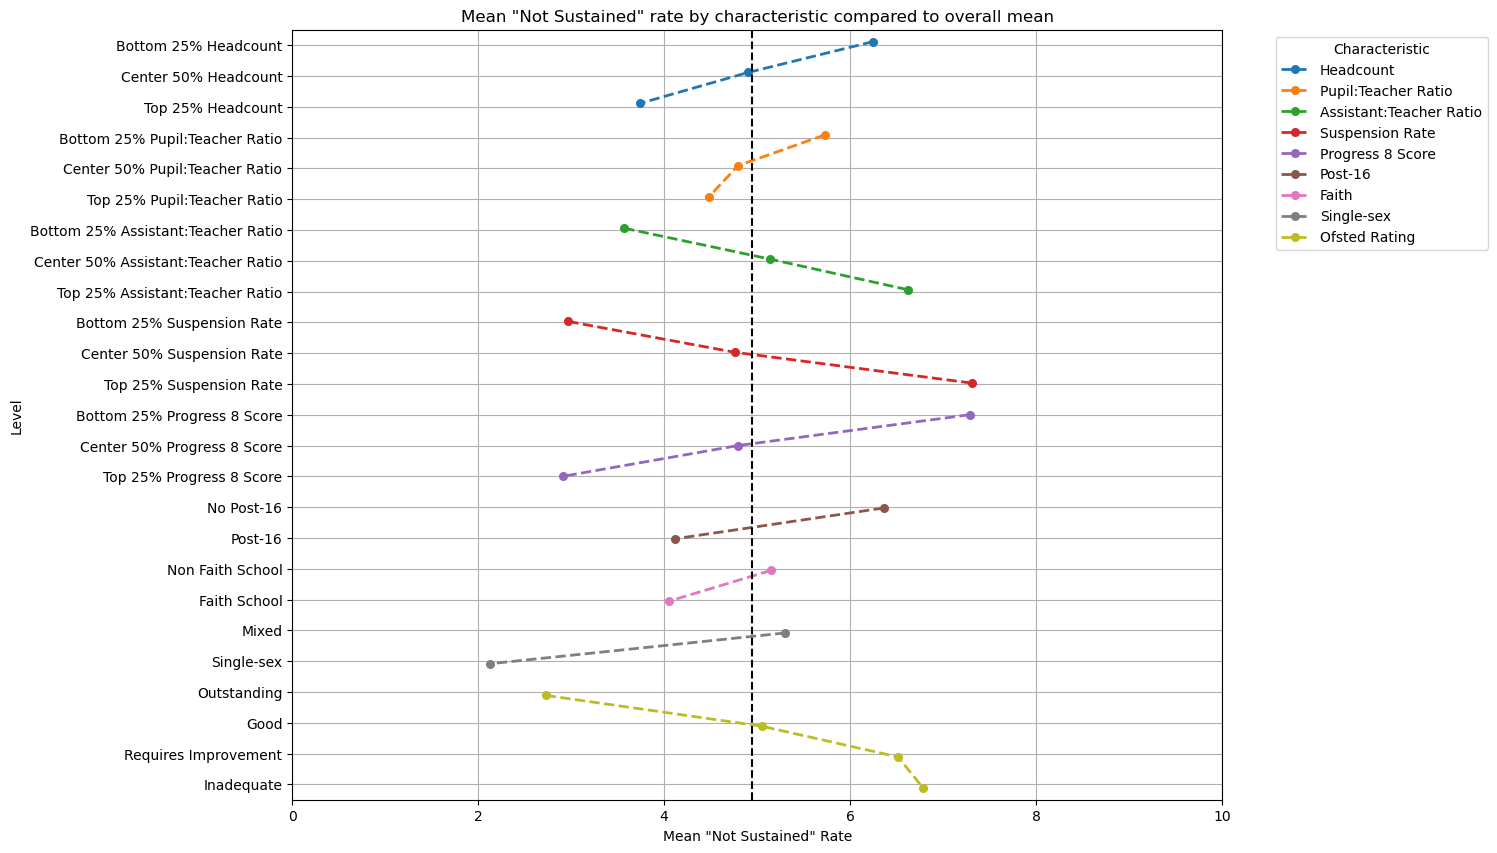

In [418]:
plt.figure(figsize=(12, 10))
sns.pointplot(data=mean_df, x='Mean Not Sustained Rate', y='Level', hue='Characteristic', 
              dodge=True, markers='o', linestyle='--', linewidth=2)

plt.axvline(x=ns_mean, color='black', linestyle='--') 

plt.xlim(0, 10)

plt.title('Mean "Not Sustained" rate by characteristic compared to overall mean')
plt.xlabel('Mean "Not Sustained" Rate')
plt.ylabel('Level')
plt.legend(title='Characteristic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
